In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Hydro - Exploratory Data Analysis (EDA)

In [4]:
# Step 1 : Loading previously processed hydro energy generation and climate factors
hydro_energy = pd.read_csv('hydro_data.csv')
daily_all_nsp_evland = pd.read_csv('Hydro_Factor_Daily_EVLAND.csv')
daily_all_nsp_gwetprof = pd.read_csv('Hydro_Factor_Daily_GWETPROF.csv')
daily_all_nsp_prectotcorr = pd.read_csv('Hydro_Factor_Daily_PRECTOTCORR.csv')
daily_all_nsp_rh2m = pd.read_csv('Hydro_Factor_Daily_RH2M.csv')
daily_all_nsp_t2m = pd.read_csv('Hydro_Factor_Daily_T2M.csv')

In [6]:
hydro_energy.tail()

Fuel_Code POC_Code        DATE   Total_TP Island   Latitude   Longitude
132197     Hydro  WTK0111  2025-01-27  1427007.0     SI -44.692099  170.429029
132198     Hydro  WTK0111  2025-01-28  1990551.0     SI -44.692099  170.429029
132199     Hydro  WTK0111  2025-01-29  1720931.0     SI -44.692099  170.429029
132200     Hydro  WTK0111  2025-01-30  1407865.0     SI -44.692099  170.429029
132201     Hydro  WTK0111  2025-01-31  1610301.0     SI -44.692099  170.429029

In [8]:
daily_all_nsp_evland.head()

DATE POC_Code  EVLAND
0  2015-01-01  ARA2201    4.03
1  2015-01-02  ARA2201    1.94
2  2015-01-03  ARA2201    2.24
3  2015-01-04  ARA2201    1.54
4  2015-01-05  ARA2201    1.95

In [10]:
print("------------hydro_energy----------------------")
print(hydro_energy.head())
print("----------------------------------------------")
print(hydro_energy.dtypes)
print("----------------------------------------------")
print("------------daily_all_nsp_evland--------------")
print(daily_all_nsp_evland.head())
print("----------------------------------------------")
print(daily_all_nsp_evland.dtypes)
print("----------------------------------------------")
print("-------------daily_all_nsp_gwetprof-----------")
print(daily_all_nsp_gwetprof.head())
print("----------------------------------------------")
print(daily_all_nsp_gwetprof.dtypes)
print("----------------------------------------------")
print("-------------daily_all_nsp_prectotcorr--------")
print(daily_all_nsp_prectotcorr.head())
print("----------------------------------------------")
print(daily_all_nsp_prectotcorr.dtypes)
print("----------------------------------------------")
print("-------------daily_all_nsp_rh2m---------------")
print(daily_all_nsp_rh2m.head())
print("----------------------------------------------")
print(daily_all_nsp_rh2m.dtypes)
print("----------------------------------------------")
print("-------------daily_all_nsp_t2m----------------")
print(daily_all_nsp_t2m.head())
print("----------------------------------------------")
print(daily_all_nsp_t2m.dtypes)
print("----------------------------------------------")

------------hydro_energy----------------------
  Fuel_Code POC_Code        DATE  Total_TP Island   Latitude   Longitude
0     Hydro  ARA2201  2015-03-01  484010.0     NI -38.615891  176.143036
1     Hydro  ARA2201  2015-03-02  598280.0     NI -38.615891  176.143036
2     Hydro  ARA2201  2015-03-03  626290.0     NI -38.615891  176.143036
3     Hydro  ARA2201  2015-03-04  826700.0     NI -38.615891  176.143036
4     Hydro  ARA2201  2015-03-05  891070.0     NI -38.615891  176.143036
----------------------------------------------
Fuel_Code     object
POC_Code      object
DATE          object
Total_TP     float64
Island        object
Latitude     float64
Longitude    float64
dtype: object
----------------------------------------------
------------daily_all_nsp_evland--------------
         DATE POC_Code  EVLAND
0  2015-01-01  ARA2201    4.03
1  2015-01-02  ARA2201    1.94
2  2015-01-03  ARA2201    2.24
3  2015-01-04  ARA2201    1.54
4  2015-01-05  ARA2201    1.95
---------------------------

In [12]:
# As per above output dated field need to convert to date format.

In [14]:
# Date coversion
#daily_all_nsp_evland['DATE'] = pd.to_datetime(daily_all_nsp_evland['DATE'], format='%Y-%m-%d')

hydro_energy['DATE'] = pd.to_datetime(hydro_energy['DATE'], format='%Y-%m-%d')
daily_all_nsp_evland['DATE'] = pd.to_datetime(daily_all_nsp_evland['DATE'], format='%Y-%m-%d')
daily_all_nsp_gwetprof['DATE'] = pd.to_datetime(daily_all_nsp_gwetprof['DATE'], format='%Y-%m-%d')
daily_all_nsp_prectotcorr['DATE'] = pd.to_datetime(daily_all_nsp_prectotcorr['DATE'],  format='%Y-%m-%d')
daily_all_nsp_rh2m['DATE'] = pd.to_datetime(daily_all_nsp_rh2m['DATE'],  format='%Y-%m-%d')
daily_all_nsp_t2m['DATE'] = pd.to_datetime(daily_all_nsp_t2m['DATE'], format='%Y-%m-%d')

In [16]:
# verify the conversion

In [18]:
print("------------hydro_energy----------------------")
print(hydro_energy.head())
print("----------------------------------------------")
print(hydro_energy.dtypes)
print("----------------------------------------------")
print("------------daily_all_nsp_evland--------------")
print(daily_all_nsp_evland.head())
print("----------------------------------------------")
print(daily_all_nsp_evland.dtypes)
print("----------------------------------------------")
print("-------------daily_all_nsp_gwetprof-----------")
print(daily_all_nsp_gwetprof.head())
print("----------------------------------------------")
print(daily_all_nsp_gwetprof.dtypes)
print("----------------------------------------------")
print("-------------daily_all_nsp_prectotcorr--------")
print(daily_all_nsp_prectotcorr.head())
print("----------------------------------------------")
print(daily_all_nsp_prectotcorr.dtypes)
print("----------------------------------------------")
print("-------------daily_all_nsp_rh2m---------------")
print(daily_all_nsp_rh2m.head())
print("----------------------------------------------")
print(daily_all_nsp_rh2m.dtypes)
print("----------------------------------------------")
print("-------------daily_all_nsp_t2m----------------")
print(daily_all_nsp_t2m.head())
print("----------------------------------------------")
print(daily_all_nsp_t2m.dtypes)
print("----------------------------------------------")

------------hydro_energy----------------------
  Fuel_Code POC_Code       DATE  Total_TP Island   Latitude   Longitude
0     Hydro  ARA2201 2015-03-01  484010.0     NI -38.615891  176.143036
1     Hydro  ARA2201 2015-03-02  598280.0     NI -38.615891  176.143036
2     Hydro  ARA2201 2015-03-03  626290.0     NI -38.615891  176.143036
3     Hydro  ARA2201 2015-03-04  826700.0     NI -38.615891  176.143036
4     Hydro  ARA2201 2015-03-05  891070.0     NI -38.615891  176.143036
----------------------------------------------
Fuel_Code            object
POC_Code             object
DATE         datetime64[ns]
Total_TP            float64
Island               object
Latitude            float64
Longitude           float64
dtype: object
----------------------------------------------
------------daily_all_nsp_evland--------------
        DATE POC_Code  EVLAND
0 2015-01-01  ARA2201    4.03
1 2015-01-02  ARA2201    1.94
2 2015-01-03  ARA2201    2.24
3 2015-01-04  ARA2201    1.54
4 2015-01-05  ARA220

In [20]:
# Get list of POC codes to load
unique_pocs_hydro = hydro_energy['POC_Code'].unique()
# unique_pocs_hydro = hydro_energy['POC_Code'].unique()

In [22]:
print(unique_pocs_hydro)
print(len(unique_pocs_hydro))
print(len(hydro_energy))
print("Min DATE:", hydro_energy['DATE'].min())
print("Max DATE:", hydro_energy['DATE'].max())

['ARA2201' 'ARG1101' 'ARI1101' 'ARI1102' 'ASB0661' 'ATI2201' 'AVI2201'
 'BEN2202' 'BWK1101' 'COL0661' 'CYD0331' 'CYD2201' 'HWA1101' 'HWB0331'
 'KPO1101' 'MAN2201' 'MAT1101' 'MHO0331' 'MTI2201' 'NSY0331' 'OHA2201'
 'OHB2201' 'OHC2201' 'OHK2201' 'ROT1101' 'ROX1101' 'ROX2201' 'RPO2201'
 'STK0661' 'TGA0331' 'TKA0111' 'TKB2201' 'TKU2201' 'TUI1101' 'WKM2201'
 'WPA2201' 'WPG0331' 'WTK0111']
38
132202
Min DATE: 2015-03-01 00:00:00
Max DATE: 2025-01-31 00:00:00


In [ ]:
# hydro_energy.tail()

In [24]:
# Get list of POC codes to evland and it's records counts. 
unique_pocs_evland = daily_all_nsp_evland['POC_Code'].unique()
print(unique_pocs_evland)
print(len(unique_pocs_evland))
print(len(daily_all_nsp_evland))
print("Min DATE:", daily_all_nsp_evland['DATE'].min())
print("Max DATE:", daily_all_nsp_evland['DATE'].max())

['ARA2201' 'ARG1101' 'ARI1101' 'ARI1102' 'ASB0661' 'ATI2201' 'AVI2201'
 'BEN2202' 'BWK1101' 'COL0661' 'CYD0331' 'CYD2201' 'HWA1101' 'HWB0331'
 'KPO1101' 'MAN2201' 'MAT1101' 'MHO0331' 'MTI2201' 'NSY0331' 'OHA2201'
 'OHB2201' 'OHC2201' 'OHK2201' 'ROT1101' 'ROX1101' 'ROX2201' 'RPO2201'
 'STK0661' 'TGA0331' 'TKA0111' 'TKB2201' 'TKU2201' 'TUI1101' 'WKM2201'
 'WPA2201' 'WPG0331' 'WTK0111']
38
141056
Min DATE: 2015-01-01 00:00:00
Max DATE: 2025-02-28 00:00:00


In [26]:
# Get list of POC codes to gwetprof
unique_pocs_gwetprof = daily_all_nsp_gwetprof['POC_Code'].unique()
print(unique_pocs_gwetprof)
print(len(unique_pocs_gwetprof))
print(len(daily_all_nsp_gwetprof))
print("Min DATE:", daily_all_nsp_gwetprof['DATE'].min())
print("Max DATE:", daily_all_nsp_gwetprof['DATE'].max())

['ARA2201' 'ARG1101' 'ARI1101' 'ARI1102' 'ASB0661' 'ATI2201' 'AVI2201'
 'BEN2202' 'BWK1101' 'COL0661' 'CYD0331' 'CYD2201' 'HWA1101' 'HWB0331'
 'KPO1101' 'MAN2201' 'MAT1101' 'MHO0331' 'MTI2201' 'NSY0331' 'OHA2201'
 'OHB2201' 'OHC2201' 'OHK2201' 'ROT1101' 'ROX1101' 'ROX2201' 'RPO2201'
 'STK0661' 'TGA0331' 'TKA0111' 'TKB2201' 'TKU2201' 'TUI1101' 'WKM2201'
 'WPA2201' 'WPG0331' 'WTK0111']
38
141056
Min DATE: 2015-01-01 00:00:00
Max DATE: 2025-02-28 00:00:00


In [28]:
# Get list of POC codes to prectotcorr
unique_pocs_prectotcorr = daily_all_nsp_prectotcorr['POC_Code'].unique()
print(unique_pocs_prectotcorr)
print(len(unique_pocs_prectotcorr))
print(len(daily_all_nsp_prectotcorr))
print("Min DATE:", daily_all_nsp_prectotcorr['DATE'].min())
print("Max DATE:", daily_all_nsp_prectotcorr['DATE'].max())

['ARA2201' 'ARG1101' 'ARI1101' 'ARI1102' 'ASB0661' 'ATI2201' 'AVI2201'
 'BEN2202' 'BWK1101' 'COL0661' 'CYD0331' 'CYD2201' 'HWA1101' 'HWB0331'
 'KPO1101' 'MAN2201' 'MAT1101' 'MHO0331' 'MTI2201' 'NSY0331' 'OHA2201'
 'OHB2201' 'OHC2201' 'OHK2201' 'ROT1101' 'ROX1101' 'ROX2201' 'RPO2201'
 'STK0661' 'TGA0331' 'TKA0111' 'TKB2201' 'TKU2201' 'TUI1101' 'WKM2201'
 'WPA2201' 'WPG0331' 'WTK0111']
38
141056
Min DATE: 2015-01-01 00:00:00
Max DATE: 2025-02-28 00:00:00


In [30]:
# Get list of POC codes to rh2m
unique_pocs_rh2m = daily_all_nsp_rh2m['POC_Code'].unique()
print(unique_pocs_rh2m)
print(len(unique_pocs_rh2m))
print(len(daily_all_nsp_rh2m))
print("Min DATE:", daily_all_nsp_rh2m['DATE'].min())
print("Max DATE:", daily_all_nsp_rh2m['DATE'].max())

# print(daily_all_nsp_rh2m.dtypes)
# print("----------------------------------------------")
# print("-------------daily_all_nsp_t2m----------------")
# print(daily_all_nsp_t2m.head())

['ARA2201' 'ARG1101' 'ARI1101' 'ARI1102' 'ASB0661' 'ATI2201' 'AVI2201'
 'BEN2202' 'BWK1101' 'COL0661' 'CYD0331' 'CYD2201' 'HWA1101' 'HWB0331'
 'KPO1101' 'MAN2201' 'MAT1101' 'MHO0331' 'MTI2201' 'NSY0331' 'OHA2201'
 'OHB2201' 'OHC2201' 'OHK2201' 'ROT1101' 'ROX1101' 'ROX2201' 'RPO2201'
 'STK0661' 'TGA0331' 'TKA0111' 'TKB2201' 'TKU2201' 'TUI1101' 'WKM2201'
 'WPA2201' 'WPG0331' 'WTK0111']
38
141056
Min DATE: 2015-01-01 00:00:00
Max DATE: 2025-02-28 00:00:00


In [32]:
# Get list of POC codes to t2m
unique_pocs_t2m = daily_all_nsp_t2m['POC_Code'].unique()
print(unique_pocs_t2m)
print(len(unique_pocs_t2m))
print(len(daily_all_nsp_t2m))
print("Min DATE:", daily_all_nsp_t2m['DATE'].min())
print("Max DATE:", daily_all_nsp_t2m['DATE'].max())

# print(daily_all_nsp_rh2m.dtypes)
# print("----------------------------------------------")
# print("-------------daily_all_nsp_t2m----------------")
# print(daily_all_nsp_t2m.head())

['ARA2201' 'ARG1101' 'ARI1101' 'ARI1102' 'ASB0661' 'ATI2201' 'AVI2201'
 'BEN2202' 'BWK1101' 'COL0661' 'CYD0331' 'CYD2201' 'HWA1101' 'HWB0331'
 'KPO1101' 'MAN2201' 'MAT1101' 'MHO0331' 'MTI2201' 'NSY0331' 'OHA2201'
 'OHB2201' 'OHC2201' 'OHK2201' 'ROT1101' 'ROX1101' 'ROX2201' 'RPO2201'
 'STK0661' 'TGA0331' 'TKA0111' 'TKB2201' 'TKU2201' 'TUI1101' 'WKM2201'
 'WPA2201' 'WPG0331' 'WTK0111']
38
141056
Min DATE: 2015-01-01 00:00:00
Max DATE: 2025-02-28 00:00:00


In [34]:
# Filter data between 2015-01-01 and 2024-12-31
filtered_daily_all_nsp_t2m = daily_all_nsp_t2m[(daily_all_nsp_t2m['DATE'] >= '2015-03-01') & (daily_all_nsp_t2m['DATE'] < '2025-02-01')]
filtered_daily_all_nsp_evland = daily_all_nsp_evland[(daily_all_nsp_evland['DATE'] >= '2015-03-01') & (daily_all_nsp_evland['DATE'] < '2025-02-01')]
filtered_daily_all_nsp_gwetprof = daily_all_nsp_gwetprof[(daily_all_nsp_gwetprof['DATE'] >= '2015-03-01') & (daily_all_nsp_gwetprof['DATE'] < '2025-02-01')]
filtered_daily_all_nsp_prectotcorr = daily_all_nsp_prectotcorr[(daily_all_nsp_prectotcorr['DATE'] >= '2015-03-01') & (daily_all_nsp_prectotcorr['DATE'] < '2025-02-01')]
filtered_daily_all_nsp_rh2m = daily_all_nsp_rh2m[(daily_all_nsp_rh2m['DATE'] >= '2015-03-01') & (daily_all_nsp_rh2m['DATE'] < '2025-02-01')]


# daily_all_nsp_evland['DATE'] = pd.to_datetime(daily_all_nsp_evland['DATE'], format='%Y-%m-%d')
# daily_all_nsp_gwetprof['DATE'] = pd.to_datetime(daily_all_nsp_gwetprof['DATE'], format='%Y-%m-%d')
# daily_all_nsp_prectotcorr['DATE'] = pd.to_datetime(daily_all_nsp_prectotcorr['DATE'],  format='%Y-%m-%d')
# daily_all_nsp_rh2m['DATE'] = pd.to_datetime(daily_all_nsp_rh2m['DATE'],  format='%Y-%m-%d')
# daily_all_nsp_t2m['DATE'] = pd.to_datetime(daily_all_nsp_t2m['DATE'], format='%Y-%m-%d')

In [36]:
print(len(filtered_daily_all_nsp_t2m))
print("Min DATE:", filtered_daily_all_nsp_t2m['DATE'].min())
print("Max DATE:", filtered_daily_all_nsp_t2m['DATE'].max())
print(len(filtered_daily_all_nsp_prectotcorr))
print("Min DATE:", filtered_daily_all_nsp_prectotcorr['DATE'].min())
print("Max DATE:", filtered_daily_all_nsp_prectotcorr['DATE'].max())

137750
Min DATE: 2015-03-01 00:00:00
Max DATE: 2025-01-31 00:00:00
137750
Min DATE: 2015-03-01 00:00:00
Max DATE: 2025-01-31 00:00:00


In [38]:
filtered_daily_all_nsp_prectotcorr.head()

DATE POC_Code  PRECTOTCORR
59 2015-03-01  ARA2201         0.00
60 2015-03-02  ARA2201         0.00
61 2015-03-03  ARA2201         0.14
62 2015-03-04  ARA2201         1.09
63 2015-03-05  ARA2201         0.01

In [40]:
record_counts_precep = filtered_daily_all_nsp_prectotcorr.groupby('POC_Code').size()
print(record_counts_precep)

POC_Code
ARA2201    3625
ARG1101    3625
ARI1101    3625
ARI1102    3625
ASB0661    3625
ATI2201    3625
AVI2201    3625
BEN2202    3625
BWK1101    3625
COL0661    3625
CYD0331    3625
CYD2201    3625
HWA1101    3625
HWB0331    3625
KPO1101    3625
MAN2201    3625
MAT1101    3625
MHO0331    3625
MTI2201    3625
NSY0331    3625
OHA2201    3625
OHB2201    3625
OHC2201    3625
OHK2201    3625
ROT1101    3625
ROX1101    3625
ROX2201    3625
RPO2201    3625
STK0661    3625
TGA0331    3625
TKA0111    3625
TKB2201    3625
TKU2201    3625
TUI1101    3625
WKM2201    3625
WPA2201    3625
WPG0331    3625
WTK0111    3625
dtype: int64


In [42]:
record_counts_hydro = hydro_energy.groupby('POC_Code').size()
print(record_counts_hydro)

POC_Code
ARA2201    3625
ARG1101    3625
ARI1101    3625
ARI1102    3625
ASB0661    3614
ATI2201    3625
AVI2201    3625
BEN2202    3625
BWK1101    3625
COL0661    3625
CYD0331    1858
CYD2201    3625
HWA1101    3625
HWB0331    1858
KPO1101    3625
MAN2201    3625
MAT1101    3612
MHO0331    3625
MTI2201    3625
NSY0331    3625
OHA2201    3625
OHB2201    3625
OHC2201    3625
OHK2201    3625
ROT1101    3625
ROX1101    3625
ROX2201    3625
RPO2201    3625
STK0661    1858
TGA0331    3412
TKA0111    3625
TKB2201    3625
TKU2201    3625
TUI1101    3625
WKM2201    3625
WPA2201    3625
WPG0331    3615
WTK0111    3625
dtype: int64


In [44]:
#### Following code does not require 
#### Above statements confirmed there are records count mismatches for perticular POC due center's opening and closing

# # # 3. Function to extract unique (POC_Code, YearMonth) combinations as a set of tuples
# def get_poc_yearmonth(df):
#     return set(df[['POC_Code', 'DATE']].apply(lambda row: (row['POC_Code'], row['DATE']), axis=1))

# # # Extract unique combinations from each DataFrame
# hydro_energy_combos = get_poc_yearmonth(hydro_energy)
# evland_combos = get_poc_yearmonth(daily_all_nsp_evland)
# # t2m_combos = get_poc_yearmonth(daily_all_nsp_t2m)
# # wd50m_combos = get_poc_yearmonth(daily_all_nsp_wd50m)
# # ws50m_combos = get_poc_yearmonth(daily_all_nsp_ws50m)

# # # 4. Find the common combinations across all five DataFrames
# common_combos = hydro_energy_combos & evland_combos #& t2m_combos & wd50m_combos & ws50m_combos

# print("Number of common (POC_Code, YearMonth) combinations:", len(common_combos))
# print("Sample common combinations:", list(common_combos)[:10])  # print a sample

# # # 5. Check for extra combinations in each DataFrame that are not in the common set
# print("Extra in hydro_energy:", hydro_energy_combos - common_combos)
# print("Extra in daily_all_nsp_evland:", evland_combos - common_combos)
# # print("Extra in Daily NSP T2M:", t2m_combos - common_combos)
# # print("Extra in Daily NSP WD50M:", wd50m_combos - common_combos)
# # print("Extra in Daily NSP WS50M:", ws50m_combos - common_combos)

In [48]:
# Merge rh2m with prectotcorr
merge1 = pd.merge(filtered_daily_all_nsp_rh2m, filtered_daily_all_nsp_prectotcorr, on=['POC_Code', 'DATE'], how='inner')
print("Merge 1 : rh2m with prectotcorr ", merge1.shape)

Merge 1 : rh2m with prectotcorr  (137750, 4)


In [50]:
merge1.head()

DATE POC_Code   RH2M  PRECTOTCORR
0 2015-03-01  ARA2201  57.62         0.00
1 2015-03-02  ARA2201  68.36         0.00
2 2015-03-03  ARA2201  68.50         0.14
3 2015-03-04  ARA2201  79.20         1.09
4 2015-03-05  ARA2201  69.77         0.01

In [52]:
# Merge merge1 with gwetprof
merge2 = pd.merge(merge1, filtered_daily_all_nsp_gwetprof, on=['POC_Code', 'DATE'], how='inner')
print("Merge 2 : Merge 1 with gwetprof):", merge2.shape)

Merge 2 : Merge 1 with gwetprof): (137750, 5)


In [54]:
merge2.head()

DATE POC_Code   RH2M  PRECTOTCORR  GWETPROF
0 2015-03-01  ARA2201  57.62         0.00      0.19
1 2015-03-02  ARA2201  68.36         0.00      0.19
2 2015-03-03  ARA2201  68.50         0.14      0.19
3 2015-03-04  ARA2201  79.20         1.09      0.19
4 2015-03-05  ARA2201  69.77         0.01      0.19

In [62]:
# Merge merge2 with evland
merge3 = pd.merge(merge2, filtered_daily_all_nsp_evland, on=['POC_Code', 'DATE'], how='inner')
print("Merge 3 : Merge 2 with evland ", merge3.shape)

Merge 3 : Merge 2 with evland  (137750, 6)


In [58]:
#del merge3

In [64]:
merge3.head()

DATE POC_Code   RH2M  PRECTOTCORR  GWETPROF  EVLAND
0 2015-03-01  ARA2201  57.62         0.00      0.19    1.01
1 2015-03-02  ARA2201  68.36         0.00      0.19    0.84
2 2015-03-03  ARA2201  68.50         0.14      0.19    0.45
3 2015-03-04  ARA2201  79.20         1.09      0.19    0.95
4 2015-03-05  ARA2201  69.77         0.01      0.19    0.70

In [66]:
# Merge merge3 with t2m
merge4 = pd.merge(merge3, filtered_daily_all_nsp_t2m, on=['POC_Code', 'DATE'], how='inner',)
print("Merge4 : Merge 3 with t2m :", merge4.shape)

Merge4 : Merge 3 with t2m : (137750, 7)


In [68]:
merge4.head()

DATE POC_Code   RH2M  PRECTOTCORR  GWETPROF  EVLAND    T2M
0 2015-03-01  ARA2201  57.62         0.00      0.19    1.01  19.11
1 2015-03-02  ARA2201  68.36         0.00      0.19    0.84  19.03
2 2015-03-03  ARA2201  68.50         0.14      0.19    0.45  18.00
3 2015-03-04  ARA2201  79.20         1.09      0.19    0.95  16.43
4 2015-03-05  ARA2201  69.77         0.01      0.19    0.70  18.74

In [70]:
merge4.tail()

DATE POC_Code   RH2M  PRECTOTCORR  GWETPROF  EVLAND    T2M
137745 2025-01-27  WTK0111  64.93         1.73      0.44    2.48  10.90
137746 2025-01-28  WTK0111  56.24         0.08      0.43    3.01  14.74
137747 2025-01-29  WTK0111  57.06         0.84      0.43    3.68  17.65
137748 2025-01-30  WTK0111  73.86         0.48      0.43    2.13  14.05
137749 2025-01-31  WTK0111  72.17         0.19      0.42    2.05  15.41

In [72]:
# Merge merge4 with hydro
final_merge = pd.merge(hydro_energy, merge4, on=['POC_Code', 'DATE'], how='left',)
print("final merge : Merge 4 with Hydro Energy ", final_merge.shape)

final merge : Merge 4 with Hydro Energy  (132202, 12)


In [74]:
print("hydro_energy:", hydro_energy.shape) 

hydro_energy: (132202, 7)


In [76]:
final_merge.head()

Fuel_Code POC_Code       DATE  Total_TP Island   Latitude   Longitude  \
0     Hydro  ARA2201 2015-03-01  484010.0     NI -38.615891  176.143036   
1     Hydro  ARA2201 2015-03-02  598280.0     NI -38.615891  176.143036   
2     Hydro  ARA2201 2015-03-03  626290.0     NI -38.615891  176.143036   
3     Hydro  ARA2201 2015-03-04  826700.0     NI -38.615891  176.143036   
4     Hydro  ARA2201 2015-03-05  891070.0     NI -38.615891  176.143036   

    RH2M  PRECTOTCORR  GWETPROF  EVLAND    T2M  
0  57.62         0.00      0.19    1.01  19.11  
1  68.36         0.00      0.19    0.84  19.03  
2  68.50         0.14      0.19    0.45  18.00  
3  79.20         1.09      0.19    0.95  16.43  
4  69.77         0.01      0.19    0.70  18.74

In [78]:
final_merge.tail()

Fuel_Code POC_Code       DATE   Total_TP Island   Latitude   Longitude  \
132197     Hydro  WTK0111 2025-01-27  1427007.0     SI -44.692099  170.429029   
132198     Hydro  WTK0111 2025-01-28  1990551.0     SI -44.692099  170.429029   
132199     Hydro  WTK0111 2025-01-29  1720931.0     SI -44.692099  170.429029   
132200     Hydro  WTK0111 2025-01-30  1407865.0     SI -44.692099  170.429029   
132201     Hydro  WTK0111 2025-01-31  1610301.0     SI -44.692099  170.429029   

         RH2M  PRECTOTCORR  GWETPROF  EVLAND    T2M  
132197  64.93         1.73      0.44    2.48  10.90  
132198  56.24         0.08      0.43    3.01  14.74  
132199  57.06         0.84      0.43    3.68  17.65  
132200  73.86         0.48      0.43    2.13  14.05  
132201  72.17         0.19      0.42    2.05  15.41

In [80]:
all_poc_data = final_merge.copy()

In [82]:
# Write the final merged DataFrame to a CSV file
all_poc_data.to_csv('Out_Hydro_final_merged_all_POC_20150301_20250131.csv', index=False)

print("Final merge saved to final_merged.csv")

Final merge saved to final_merged.csv


In [86]:
# Check for missing values in each column
missing_values = all_poc_data.isnull().sum()
print(missing_values)

# check if there are any missing values at all
if all_poc_data.isnull().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("No missing values found in the DataFrame.")

Fuel_Code      0
POC_Code       0
DATE           0
Total_TP       0
Island         0
Latitude       0
Longitude      0
RH2M           0
PRECTOTCORR    0
GWETPROF       0
EVLAND         0
T2M            0
dtype: int64
No missing values found in the DataFrame.


In [88]:
# List all column names 
print(all_poc_data.columns)

# list the column names as a list
print(all_poc_data.columns.tolist())

Index(['Fuel_Code', 'POC_Code', 'DATE', 'Total_TP', 'Island', 'Latitude',
       'Longitude', 'RH2M', 'PRECTOTCORR', 'GWETPROF', 'EVLAND', 'T2M'],
      dtype='object')
['Fuel_Code', 'POC_Code', 'DATE', 'Total_TP', 'Island', 'Latitude', 'Longitude', 'RH2M', 'PRECTOTCORR', 'GWETPROF', 'EVLAND', 'T2M']


In [90]:
# selected_columns_POC = ['Fuel_Code','POC_Code', 'DATE','Total_TP', 'PS','T2M','WD50M','WD50M_rad','u','v','WS50M']  # Replace with desired column names


In [92]:
selected_columns_for_hydro = ['DATE','Island','Total_TP', 'RH2M','PRECTOTCORR','GWETPROF','EVLAND','T2M']  # Replace with your desired column names


In [ ]:
# df_wind_daily_final_all_POC = final_merge[selected_columns_POC].copy()

In [94]:
df_hydro_daily_all = all_poc_data[selected_columns_for_hydro].copy()

In [96]:
df_hydro_daily_all.head()

DATE Island  Total_TP   RH2M  PRECTOTCORR  GWETPROF  EVLAND    T2M
0 2015-03-01     NI  484010.0  57.62         0.00      0.19    1.01  19.11
1 2015-03-02     NI  598280.0  68.36         0.00      0.19    0.84  19.03
2 2015-03-03     NI  626290.0  68.50         0.14      0.19    0.45  18.00
3 2015-03-04     NI  826700.0  79.20         1.09      0.19    0.95  16.43
4 2015-03-05     NI  891070.0  69.77         0.01      0.19    0.70  18.74

In [98]:
df_hydro_daily_all.set_index('DATE', inplace=True)

In [100]:
df_hydro_daily_all.head()

Island  Total_TP   RH2M  PRECTOTCORR  GWETPROF  EVLAND    T2M
DATE                                                                    
2015-03-01     NI  484010.0  57.62         0.00      0.19    1.01  19.11
2015-03-02     NI  598280.0  68.36         0.00      0.19    0.84  19.03
2015-03-03     NI  626290.0  68.50         0.14      0.19    0.45  18.00
2015-03-04     NI  826700.0  79.20         1.09      0.19    0.95  16.43
2015-03-05     NI  891070.0  69.77         0.01      0.19    0.70  18.74

In [ ]:
print(df_hydro_daily_final_all_Island_POC.dtypes)

In [102]:
record_counts = df_hydro_daily_all.groupby('Island').size()
print(record_counts)

Island
NI    61399
SI    70803
dtype: int64


In [108]:
# count the rows on a given date
count = df_hydro_daily_all.loc['2015-03-02'].shape[0]
print(f"Number of records on 2015‑03‑02: {count}")

Number of records on 2015‑03‑02: 35


In [110]:
# 1. Define your custom agg: sum for some columns, mean for the rest
agg_dict = {
    'Total_TP':    'sum',
    'PRECTOTCORR': 'sum',
    'EVLAND':      'sum',
    'RH2M':        'mean',
    'GWETPROF':    'mean',
    'T2M':         'mean'
   }

In [112]:
df_tmp = df_hydro_daily_all.reset_index()

In [114]:
df_tmp.head()

DATE Island  Total_TP   RH2M  PRECTOTCORR  GWETPROF  EVLAND    T2M
0 2015-03-01     NI  484010.0  57.62         0.00      0.19    1.01  19.11
1 2015-03-02     NI  598280.0  68.36         0.00      0.19    0.84  19.03
2 2015-03-03     NI  626290.0  68.50         0.14      0.19    0.45  18.00
3 2015-03-04     NI  826700.0  79.20         1.09      0.19    0.95  16.43
4 2015-03-05     NI  891070.0  69.77         0.01      0.19    0.70  18.74

In [132]:
# 2. Group by Island & DATE, apply the custom agg, then reset the index
df_island_daily = (
    df_tmp
    .groupby(['Island','DATE'])
    .agg(agg_dict)
    .reset_index()
)

In [138]:
# del df_island_daily
df_island_daily

Island     Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                       
2015-03-01     NI   7825804.44         0.21   27.84  66.255294  0.334706   
2015-03-02     NI  11974699.35         0.18   26.52  69.953529  0.332353   
2015-03-03     NI  11208818.65         2.54   15.11  73.095882  0.331176   
2015-03-04     NI  11743847.34        18.78   16.79  79.583529  0.330000   
2015-03-05     NI  12040484.41         1.36   24.10  72.791765  0.329412   
...           ...          ...          ...     ...        ...       ...   
2025-01-27     SI  42567372.00        41.39   58.85  69.201905  0.496190   
2025-01-28     SI  47770391.00        19.50   68.21  63.686190  0.490952   
2025-01-29     SI  40313890.00        50.44   80.71  64.899524  0.488571   
2025-01-30     SI  47941053.00         9.09   53.96  72.480000  0.486667   
2025-01-31     SI  47036470.00         2.92   56.09  69.778095  0.480476   

                  T2M  
DATE                   
2015-03-01  19.008235  
2015-03-02  19.220588  
2015-03-03  18.333529  
2015-03-04  17.398235  
2015-03-05  19.171765  
...               ...  
2025-01-27  10.336667  
2025-01-28  13.301905  
2025-01-29  15.252857  
2025-01-30  13.720000  
2025-01-31  14.915714  

[7250 rows x 7 columns]

In [136]:
df_island_daily = df_island_daily.set_index('DATE')

In [140]:
# Group by Island and Date, and compute mean of numeric columns
#df_island_daily = df_hydro_daily_final_all_Island_POC.groupby(['Island', 'DATE']).mean().reset_index()

# Optional: sort by Island and Date
df_island_daily = df_island_daily.sort_values(by=['Island', 'DATE'])

In [142]:
df_island_daily

Island     Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                       
2015-03-01     NI   7825804.44         0.21   27.84  66.255294  0.334706   
2015-03-02     NI  11974699.35         0.18   26.52  69.953529  0.332353   
2015-03-03     NI  11208818.65         2.54   15.11  73.095882  0.331176   
2015-03-04     NI  11743847.34        18.78   16.79  79.583529  0.330000   
2015-03-05     NI  12040484.41         1.36   24.10  72.791765  0.329412   
...           ...          ...          ...     ...        ...       ...   
2025-01-27     SI  42567372.00        41.39   58.85  69.201905  0.496190   
2025-01-28     SI  47770391.00        19.50   68.21  63.686190  0.490952   
2025-01-29     SI  40313890.00        50.44   80.71  64.899524  0.488571   
2025-01-30     SI  47941053.00         9.09   53.96  72.480000  0.486667   
2025-01-31     SI  47036470.00         2.92   56.09  69.778095  0.480476   

                  T2M  
DATE                   
2015-03-01  19.008235  
2015-03-02  19.220588  
2015-03-03  18.333529  
2015-03-04  17.398235  
2015-03-05  19.171765  
...               ...  
2025-01-27  10.336667  
2025-01-28  13.301905  
2025-01-29  15.252857  
2025-01-30  13.720000  
2025-01-31  14.915714  

[7250 rows x 7 columns]

In [144]:
# Check for rows Total_TP equals 0.0
zero_records = df_island_daily[df_island_daily['Total_TP'] == 0]
print("Number of daily records with Total_TP equal to 0:", len(zero_records))
print(zero_records)

Number of daily records with Total_TP equal to 0: 0
Empty DataFrame
Columns: [Island, Total_TP, PRECTOTCORR, EVLAND, RH2M, GWETPROF, T2M]
Index: []


In [146]:
# df_island_daily.set_index('DATE', inplace=True)

In [148]:
# df_island_daily

In [150]:
df_tmp2 = df_island_daily.copy()

In [152]:
df_tmp2

Island     Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                       
2015-03-01     NI   7825804.44         0.21   27.84  66.255294  0.334706   
2015-03-02     NI  11974699.35         0.18   26.52  69.953529  0.332353   
2015-03-03     NI  11208818.65         2.54   15.11  73.095882  0.331176   
2015-03-04     NI  11743847.34        18.78   16.79  79.583529  0.330000   
2015-03-05     NI  12040484.41         1.36   24.10  72.791765  0.329412   
...           ...          ...          ...     ...        ...       ...   
2025-01-27     SI  42567372.00        41.39   58.85  69.201905  0.496190   
2025-01-28     SI  47770391.00        19.50   68.21  63.686190  0.490952   
2025-01-29     SI  40313890.00        50.44   80.71  64.899524  0.488571   
2025-01-30     SI  47941053.00         9.09   53.96  72.480000  0.486667   
2025-01-31     SI  47036470.00         2.92   56.09  69.778095  0.480476   

                  T2M  
DATE                   
2015-03-01  19.008235  
2015-03-02  19.220588  
2015-03-03  18.333529  
2015-03-04  17.398235  
2015-03-05  19.171765  
...               ...  
2025-01-27  10.336667  
2025-01-28  13.301905  
2025-01-29  15.252857  
2025-01-30  13.720000  
2025-01-31  14.915714  

[7250 rows x 7 columns]

In [154]:
# Write the final merged DataFrame to a CSV file
df_tmp2.reset_index().to_csv('Out_df_hydro_island_grouped_daily_20150301_20250131.csv', index=False)

print("final_df_hydro_island_daily.csv")

final_df_hydro_island_daily.csv


In [156]:
del df_tmp2

In [158]:
# df_island_daily.to_csv('df_island_daily_hydro_beforezerointerpolate.csv', index=False)

In [160]:
###################### following lines exe. does not require since no nan records

In [162]:
# # Ensure DATE column is in datetime format
# #df_island_daily['DATE'] = pd.to_datetime(df_island_daily['DATE'])

# # Set DATE as the index
# #df_island_daily.set_index('DATE', inplace=True)
# df_island_daily.index = pd.to_datetime(df_island_daily.index)

# # Now apply time-based interpolation
# cols_to_interpolate = ['Total_TP', 'PS', 'T2M', 'WD50M', 'WS50M']
# df_island_daily[cols_to_interpolate] = df_island_daily[cols_to_interpolate].interpolate(method='time')


In [164]:
# Check for missing values before handling
nan_count = df_island_daily['Total_TP'].isna().sum()
print("Number of NaN values before cleaning:", nan_count)

Number of NaN values before cleaning: 0


In [166]:
# # # Check for missing values before handling
# # nan_count = df_island_daily['Total_TP'].isna().sum()
# # print("Number of NaN values before cleaning:", nan_count)

# # # Apply time-based interpolation
# # df_island_daily['Total_TP'] = df_island_daily['Total_TP'].interpolate(method='time')

# # Verify that there are no more missing values
# nan_count_after = df_island_daily['Total_TP'].isna().sum()
# print("Number of NaN values after interpolation:", nan_count_after)

# # Optionally, inspect the imputed records
# imputed_records = df_island_daily[df_island_daily['Total_TP'].isna()]
# print("Imputed Records (should be empty):")
# print(imputed_records)

In [168]:
# # Apply time interpolation to the target variable and exogenous variables
# cols_to_interpolate = ['PS','T2M','WD50M','WD50M_rad','u','v','WS50M']
# df_WWD1102_weekly[cols_to_interpolate] = df_WWD1102_weekly[cols_to_interpolate].interpolate(method='time')

# # Verify that missing values have been filled
# print("Missing values after time interpolation:")
# print(df_WWD1102_weekly[cols_to_interpolate].isna().sum())

In [170]:
# # Verify that there are no more missing values
# nan_count_after = df_WWD1102_weekly['Total_TP'].isna().sum()
# print("Number of NaN values after interpolation:", nan_count_after)

In [172]:
#df_wind_daily_final_all['DATE'] = pd.to_datetime(df_wind_daily_final_all['DATE'])

In [174]:
# df_island_daily.reset_index().to_csv('df_island_daily_beforezerointerpolate_reuse.csv', index=False)

In [176]:
# df_island_daily

In [178]:
# 2. Remove rows with zero energy generation (Total_TP)
# df_hydro_daily_final_all_POC_clean = df_island_daily[df_island_daily['Total_TP'] > 0].copy()

In [180]:
# record_counts_new = all_poc_data.groupby('POC_Code').size()
# # print(record_counts_new)

In [182]:
# # Write the final merged DataFrame to a CSV file
# df_island_daily.reset_index().to_csv('final_df_wind_island_daily_20250425.csv', index=False)

# print("final_df_wind_island_daily.csv")

In [184]:
print(df_island_daily.dtypes)

Island          object
Total_TP       float64
PRECTOTCORR    float64
EVLAND         float64
RH2M           float64
GWETPROF       float64
T2M            float64
dtype: object


In [188]:
df_island_daily.head()

Island     Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                       
2015-03-01     NI   7825804.44         0.21   27.84  66.255294  0.334706   
2015-03-02     NI  11974699.35         0.18   26.52  69.953529  0.332353   
2015-03-03     NI  11208818.65         2.54   15.11  73.095882  0.331176   
2015-03-04     NI  11743847.34        18.78   16.79  79.583529  0.330000   
2015-03-05     NI  12040484.41         1.36   24.10  72.791765  0.329412   

                  T2M  
DATE                   
2015-03-01  19.008235  
2015-03-02  19.220588  
2015-03-03  18.333529  
2015-03-04  17.398235  
2015-03-05  19.171765

In [270]:
records = df_island_daily.loc[['2015-03-01']]
print(records)
print("Count:", records.shape[0])

           Island     Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                       
2015-03-01     NI   7825804.44         0.21   27.84  66.255294  0.334706   
2015-03-01     SI  42060660.82        52.53   42.14  77.983889  0.450000   

                  T2M  
DATE                   
2015-03-01  19.008235  
2015-03-01  15.757778  
Count: 2


In [ ]:
# Final data frame for daily basis/ aggrigation required ?
#df_island_daily

In [234]:
df_north_island_daily = df_island_daily[df_island_daily['Island'] == 'NI'].copy()
df_south_island_daily = df_island_daily[df_island_daily['Island'] == 'SI'].copy()

In [236]:
# Hydro - North Island Data Frame 
df_north_island_daily

Island     Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                       
2015-03-01     NI   7825804.44         0.21   27.84  66.255294  0.334706   
2015-03-02     NI  11974699.35         0.18   26.52  69.953529  0.332353   
2015-03-03     NI  11208818.65         2.54   15.11  73.095882  0.331176   
2015-03-04     NI  11743847.34        18.78   16.79  79.583529  0.330000   
2015-03-05     NI  12040484.41         1.36   24.10  72.791765  0.329412   
...           ...          ...          ...     ...        ...       ...   
2025-01-27     NI  10482929.00        10.16   62.43  66.797059  0.393529   
2025-01-28     NI  12782323.00         0.46   40.85  59.794118  0.389412   
2025-01-29     NI  10128458.00         1.89   37.71  71.850000  0.385882   
2025-01-30     NI  14534998.00        40.56   28.93  71.900000  0.383529   
2025-01-31     NI  13735041.00        29.04   53.58  70.754118  0.384118   

                  T2M  
DATE                   
2015-03-01  19.008235  
2015-03-02  19.220588  
2015-03-03  18.333529  
2015-03-04  17.398235  
2015-03-05  19.171765  
...               ...  
2025-01-27  17.559412  
2025-01-28  16.558235  
2025-01-29  17.765882  
2025-01-30  17.997059  
2025-01-31  19.537647  

[3625 rows x 7 columns]

In [244]:
df_north_daily = df_north_island_daily.drop(columns=['Island'])

In [246]:
df_north_daily.head(5)

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2015-03-01   7825804.44         0.21   27.84  66.255294  0.334706  19.008235
2015-03-02  11974699.35         0.18   26.52  69.953529  0.332353  19.220588
2015-03-03  11208818.65         2.54   15.11  73.095882  0.331176  18.333529
2015-03-04  11743847.34        18.78   16.79  79.583529  0.330000  17.398235
2015-03-05  12040484.41         1.36   24.10  72.791765  0.329412  19.171765

In [272]:
# Hydro - South Island Data Frame 
df_south_island_daily

Island      Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                        
2015-03-01     SI  4.206066e+07        52.53   42.14  77.983889  0.450000   
2015-03-02     SI  4.750278e+07       172.84   31.46  79.060000  0.450000   
2015-03-03     SI  4.994261e+07        50.39   21.49  84.080556  0.460556   
2015-03-04     SI  4.794869e+07        15.15   41.87  71.283333  0.460556   
2015-03-05     SI  4.896324e+07        12.68   39.52  66.626111  0.457778   
...           ...           ...          ...     ...        ...       ...   
2025-01-27     SI  4.256737e+07        41.39   58.85  69.201905  0.496190   
2025-01-28     SI  4.777039e+07        19.50   68.21  63.686190  0.490952   
2025-01-29     SI  4.031389e+07        50.44   80.71  64.899524  0.488571   
2025-01-30     SI  4.794105e+07         9.09   53.96  72.480000  0.486667   
2025-01-31     SI  4.703647e+07         2.92   56.09  69.778095  0.480476   

                  T2M  
DATE                   
2015-03-01  15.757778  
2015-03-02  15.192778  
2015-03-03  12.866667  
2015-03-04  14.206667  
2015-03-05  13.797222  
...               ...  
2025-01-27  10.336667  
2025-01-28  13.301905  
2025-01-29  15.252857  
2025-01-30  13.720000  
2025-01-31  14.915714  

[3625 rows x 7 columns]

In [248]:
df_south_daily = df_south_island_daily.drop(columns=['Island'])

In [254]:
df_south_daily.head(5)

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                         
2015-03-01  4.206066e+07        52.53   42.14  77.983889  0.450000  15.757778
2015-03-02  4.750278e+07       172.84   31.46  79.060000  0.450000  15.192778
2015-03-03  4.994261e+07        50.39   21.49  84.080556  0.460556  12.866667
2015-03-04  4.794869e+07        15.15   41.87  71.283333  0.460556  14.206667
2015-03-05  4.896324e+07        12.68   39.52  66.626111  0.457778  13.797222

In [268]:
records = df_south_daily.loc[['2015-03-01']]
print(records)
print("Count:", records.shape[0])

               Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2015-03-01  42060660.82        52.53   42.14  77.983889      0.45  15.757778
Count: 1


In [ ]:
# df_tmp_wk = df_island_weekly.drop(columns=['Island'])

In [190]:
# Group by Island, then resample each group by week, applying the aggregations
df_island_weekly = (
    df_island_daily
      .groupby('Island')
      .resample('W')       # default: week ending on Sunday
      .agg(agg_dict)
      .reset_index()       # bring Island and DATE back as columns
)

In [274]:
df_island_weekly.tail()

Island     Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                       
2025-01-05     SI  305921993.0       373.74  497.24  76.979041  0.555728   
2025-01-12     SI  339978037.0       269.11  498.12  72.961769  0.535102   
2025-01-19     SI  341049714.0        56.50  426.76  73.288844  0.504014   
2025-01-26     SI  322740680.0       517.57  375.03  74.280680  0.480680   
2025-02-02     SI  225629176.0       123.34  317.82  68.009143  0.488571   

                  T2M  
DATE                   
2025-01-05  11.260983  
2025-01-12  12.327211  
2025-01-19  14.151905  
2025-01-26  14.696395  
2025-02-02  13.505429

In [194]:
df_island_weekly = df_island_weekly.set_index('DATE')

In [278]:
df_island_weekly.tail(5)

Island     Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                       
2025-01-05     SI  305921993.0       373.74  497.24  76.979041  0.555728   
2025-01-12     SI  339978037.0       269.11  498.12  72.961769  0.535102   
2025-01-19     SI  341049714.0        56.50  426.76  73.288844  0.504014   
2025-01-26     SI  322740680.0       517.57  375.03  74.280680  0.480680   
2025-02-02     SI  225629176.0       123.34  317.82  68.009143  0.488571   

                  T2M  
DATE                   
2025-01-05  11.260983  
2025-01-12  12.327211  
2025-01-19  14.151905  
2025-01-26  14.696395  
2025-02-02  13.505429

In [200]:
df_tmp_daily = df_island_daily.drop(columns=['Island'])

In [310]:
df_tmp_daily.head()

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2015-03-01   7825804.44         0.21   27.84  66.255294  0.334706  19.008235
2015-03-02  11974699.35         0.18   26.52  69.953529  0.332353  19.220588
2015-03-03  11208818.65         2.54   15.11  73.095882  0.331176  18.333529
2015-03-04  11743847.34        18.78   16.79  79.583529  0.330000  17.398235
2015-03-05  12040484.41         1.36   24.10  72.791765  0.329412  19.171765

In [312]:
# print(f"Number of records on 2015‑03‑08: {count}")
records = df_tmp_daily.loc[['2015-03-01']]
print(records)
print("Count:", records.shape[0])

               Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2015-03-01   7825804.44         0.21   27.84  66.255294  0.334706  19.008235
2015-03-01  42060660.82        52.53   42.14  77.983889  0.450000  15.757778
Count: 2


In [314]:
# Group by the date‐index (level=0) and apply --- Daily
df_hydro_daily = df_tmp_daily.groupby(level=0).agg(agg_dict)

print(df_hydro_daily.head())

                Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                         
2015-03-01  4.988647e+07        52.74   69.98  72.119592  0.392353  17.383007
2015-03-02  5.947748e+07       173.02   57.98  74.506765  0.391176  17.206683
2015-03-03  6.115143e+07        52.93   36.60  78.588219  0.395866  15.600098
2015-03-04  5.969254e+07        33.93   58.66  75.433431  0.395278  15.802451
2015-03-05  6.100373e+07        14.04   63.62  69.708938  0.393595  16.484493


In [316]:
# print(f"Number of records on 2015‑03‑08: {count}")
records = df_hydro_daily.loc[['2015-03-01']]
print(records)
print("Count:", records.shape[0])

               Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2015-03-01  49886465.26        52.74   69.98  72.119592  0.392353  17.383007
Count: 1


In [318]:
print(df_hydro_daily.count())

Total_TP       3625
PRECTOTCORR    3625
EVLAND         3625
RH2M           3625
GWETPROF       3625
T2M            3625
dtype: int64


In [204]:
df_tmp_wk = df_island_weekly.drop(columns=['Island'])

In [220]:
print(df_tmp_wk.shape[0])

1036


In [306]:
print(df_tmp_wk.count())

Total_TP       1034
PRECTOTCORR    1034
EVLAND         1034
RH2M           1034
GWETPROF       1034
T2M            1034
dtype: int64


In [282]:
# Drop the 2015‑03‑01 and 2025-02-02	 rows , looks incomplete
df_tmp_wk = df_tmp_wk.drop(index=pd.to_datetime('2015-03-01'))
df_tmp_wk = df_tmp_wk.drop(index=pd.to_datetime('2025-02-02'))

In [288]:
df_tmp_wk.tail()

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2024-12-29  313467483.0       431.76  524.58  78.089796  0.568231  14.621837
2025-01-05  305921993.0       373.74  497.24  76.979041  0.555728  11.260983
2025-01-12  339978037.0       269.11  498.12  72.961769  0.535102  12.327211
2025-01-19  341049714.0        56.50  426.76  73.288844  0.504014  14.151905
2025-01-26  322740680.0       517.57  375.03  74.280680  0.480680  14.696395

In [292]:
# count = df_tmp_wk.loc['2025-01-19'].shape[0]
# print(f"Number of records on 2015‑03‑08: {count}")
records = df_tmp_wk.loc[['2025-01-19']]
print(records)
print("Count:", records.shape[0])

               Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2025-01-19   96991450.0        46.67  317.29  67.007143  0.402353  17.000084
2025-01-19  341049714.0        56.50  426.76  73.288844  0.504014  14.151905
Count: 2


In [296]:
# Group by the date‐index (level=0) and apply -- Weekly
df_hydro_weekly = df_tmp_wk.groupby(level=0).agg(agg_dict)

print(df_hydro_weekly.head())

                Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                         
2015-03-08  3.974376e+08       971.38  453.99  76.426636  0.399437  15.413957
2015-03-15  3.955904e+08       529.00  432.03  76.846076  0.409244  14.965175
2015-03-22  3.662094e+08       663.87  403.97  75.378081  0.421662  10.907292
2015-03-29  3.579528e+08       693.64  370.90  82.111349  0.421032  13.933543
2015-04-05  3.299789e+08       233.77  352.36  78.754241  0.426779  13.300586


In [298]:
# print(f"Number of records on 2015‑03‑08: {count}")
records = df_hydro_weekly.loc[['2025-01-19']]
print(records)
print("Count:", records.shape[0])

               Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2025-01-19  438041164.0       103.17  744.05  70.147993  0.453183  15.575994
Count: 1


In [308]:
print(df_hydro_weekly.count())

Total_TP       517
PRECTOTCORR    517
EVLAND         517
RH2M           517
GWETPROF       517
T2M            517
dtype: int64


In [324]:
# del df_north_island_weekly
# del df_south_island_weekly

In [326]:
df_tmp_wk2 = df_island_weekly.copy()

In [328]:
df_tmp_wk2

Island      Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF  \
DATE                                                                        
2015-03-01     NI  7.825804e+06         0.21   27.84  66.255294  0.334706   
2015-03-08     NI  7.710830e+07       204.03  195.33  76.440336  0.331176   
2015-03-15     NI  7.124508e+07       372.58  203.25  76.564454  0.338487   
2015-03-22     NI  7.120258e+07       399.07  238.96  70.463782  0.368403   
2015-03-29     NI  7.092097e+07       326.24  216.04  80.650000  0.360000   
...           ...           ...          ...     ...        ...       ...   
2025-01-05     SI  3.059220e+08       373.74  497.24  76.979041  0.555728   
2025-01-12     SI  3.399780e+08       269.11  498.12  72.961769  0.535102   
2025-01-19     SI  3.410497e+08        56.50  426.76  73.288844  0.504014   
2025-01-26     SI  3.227407e+08       517.57  375.03  74.280680  0.480680   
2025-02-02     SI  2.256292e+08       123.34  317.82  68.009143  0.488571   

                  T2M  
DATE                   
2015-03-01  19.008235  
2015-03-08  17.886723  
2015-03-15  17.326303  
2015-03-22  13.776807  
2015-03-29  16.227563  
...               ...  
2025-01-05  11.260983  
2025-01-12  12.327211  
2025-01-19  14.151905  
2025-01-26  14.696395  
2025-02-02  13.505429  

[1038 rows x 7 columns]

In [330]:
# Drop the 2015‑03‑01 and 2025-02-02	 rows , looks incomplete
df_tmp_wk2 = df_tmp_wk2.drop(index=pd.to_datetime('2015-03-01'))
df_tmp_wk2 = df_tmp_wk2.drop(index=pd.to_datetime('2025-02-02'))

In [332]:
df_north_island_weekly = df_tmp_wk2[df_tmp_wk2['Island'] == 'NI'].copy()
df_south_island_weekly = df_tmp_wk2[df_tmp_wk2['Island'] == 'SI'].copy()

In [346]:
df_north_island_weekly.head()

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2015-03-08  77108297.22       204.03  195.33  76.440336  0.331176  17.886723
2015-03-15  71245084.70       372.58  203.25  76.564454  0.338487  17.326303
2015-03-22  71202576.46       399.07  238.96  70.463782  0.368403  13.776807
2015-03-29  70920967.42       326.24  216.04  80.650000  0.360000  16.227563
2015-04-05  70933314.09        44.53  174.38  77.631261  0.362605  15.508235

In [340]:
df_north_island_weekly = df_north_island_weekly.drop(columns=['Island'])

In [344]:
df_south_island_weekly.tail()

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2024-12-29  313467483.0       431.76  524.58  78.089796  0.568231  14.621837
2025-01-05  305921993.0       373.74  497.24  76.979041  0.555728  11.260983
2025-01-12  339978037.0       269.11  498.12  72.961769  0.535102  12.327211
2025-01-19  341049714.0        56.50  426.76  73.288844  0.504014  14.151905
2025-01-26  322740680.0       517.57  375.03  74.280680  0.480680  14.696395

In [342]:
df_south_island_weekly = df_south_island_weekly.drop(columns=['Island'])

In [348]:
# print(f"Number of records on 2015‑03‑08: {count}")
records = df_south_island_weekly.loc[['2025-01-19']]
print(records)
print("Count:", records.shape[0])

               Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                        
2025-01-19  341049714.0         56.5  426.76  73.288844  0.504014  14.151905
Count: 1


In [ ]:
# ##### Final data frames to feed ML models

# # ---------Weekly------------------ 
# df_hydro_weekly
# df_south_island_weekly
# df_north_island_weekly

# # ---------Daily-------------------

# df_hydro_daily
# df_south_daily
# df_north_daily


In [438]:
# All Island daily
df_hydro_daily['PRECIP_7d'] = df_hydro_daily['PRECTOTCORR'].rolling(7, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
df_hydro_daily['PRECIP_14d'] = df_hydro_daily['PRECTOTCORR'].rolling(14, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
df_hydro_daily['PRECIP_lag1'] = df_hydro_daily['PRECTOTCORR'].shift(1) # Lagged values yesterday’s rain
df_hydro_daily['PRECIP_lag7'] = df_hydro_daily['PRECTOTCORR'].shift(7) # Lagged values last week’s rain


In [402]:
# South Island daily
df_south_daily['PRECIP_7d'] = df_south_daily['PRECTOTCORR'].rolling(7, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
df_south_daily['PRECIP_14d'] = df_south_daily['PRECTOTCORR'].rolling(14, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
df_south_daily['PRECIP_lag1'] = df_south_daily['PRECTOTCORR'].shift(1) # Lagged values yesterday’s rain
df_south_daily['PRECIP_lag7'] = df_south_daily['PRECTOTCORR'].shift(7) # Lagged values last week’s rain


In [404]:
# North Island daily
df_north_daily['PRECIP_7d'] = df_north_daily['PRECTOTCORR'].rolling(7, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
df_north_daily['PRECIP_14d'] = df_north_daily['PRECTOTCORR'].rolling(14, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
df_north_daily['PRECIP_lag1'] = df_north_daily['PRECTOTCORR'].shift(1) # Lagged values yesterday’s rain
df_north_daily['PRECIP_lag7'] = df_north_daily['PRECTOTCORR'].shift(7) # Lagged values last week’s rain


In [392]:
# All Island Weekly
# df_hydro_weekly['PRECIP_7d'] = df_hydro_weekly['PRECTOTCORR'].rolling(7, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
# df_hydro_weekly['PRECIP_14d'] = df_hydro_weekly['PRECTOTCORR'].rolling(14, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
# df_hydro_weekly['PRECIP_lag1'] = df_hydro_weekly['PRECTOTCORR'].shift(1) # Lagged values yesterday’s rain
# df_hydro_weekly['PRECIP_lag7'] = df_hydro_weekly['PRECTOTCORR'].shift(7) # Lagged values last week’s rain
df_hydro_weekly['PRECIP_lag1w'] = df_hydro_weekly['PRECTOTCORR'].shift(1)
df_hydro_weekly['PRECIP_lag2w'] = df_hydro_weekly['PRECTOTCORR'].shift(2)
df_hydro_weekly['API_weekly'] = df_hydro_weekly['PRECTOTCORR'].ewm(alpha=0.3, adjust=False).mean()

In [406]:
# South Island Weekly
# df_hydro_weekly['PRECIP_7d'] = df_hydro_weekly['PRECTOTCORR'].rolling(7, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
# df_hydro_weekly['PRECIP_14d'] = df_hydro_weekly['PRECTOTCORR'].rolling(14, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
# df_hydro_weekly['PRECIP_lag1'] = df_hydro_weekly['PRECTOTCORR'].shift(1) # Lagged values yesterday’s rain
# df_hydro_weekly['PRECIP_lag7'] = df_hydro_weekly['PRECTOTCORR'].shift(7) # Lagged values last week’s rain
df_south_island_weekly['PRECIP_lag1w'] = df_south_island_weekly['PRECTOTCORR'].shift(1)
df_south_island_weekly['PRECIP_lag2w'] = df_south_island_weekly['PRECTOTCORR'].shift(2)
df_south_island_weekly['API_weekly'] = df_south_island_weekly['PRECTOTCORR'].ewm(alpha=0.3, adjust=False).mean()

In [408]:
# North Island Weekly
# df_hydro_weekly['PRECIP_7d'] = df_hydro_weekly['PRECTOTCORR'].rolling(7, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
# df_hydro_weekly['PRECIP_14d'] = df_hydro_weekly['PRECTOTCORR'].rolling(14, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
# df_hydro_weekly['PRECIP_lag1'] = df_hydro_weekly['PRECTOTCORR'].shift(1) # Lagged values yesterday’s rain
# df_hydro_weekly['PRECIP_lag7'] = df_hydro_weekly['PRECTOTCORR'].shift(7) # Lagged values last week’s rain
df_north_island_weekly['PRECIP_lag1w'] = df_north_island_weekly['PRECTOTCORR'].shift(1)
df_north_island_weekly['PRECIP_lag2w'] = df_north_island_weekly['PRECTOTCORR'].shift(2)
df_north_island_weekly['API_weekly'] = df_north_island_weekly['PRECTOTCORR'].ewm(alpha=0.3, adjust=False).mean()

In [434]:
df_hydro_daily.drop(['PRECIP_7d', 'PRECIP_lag1', 'PRECIP_lag7', 'PRECIP_14d'], axis=1, inplace=True)

In [436]:
df_hydro_daily.head(30)

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M
DATE                                                                         
2015-03-01  4.988647e+07        52.74   69.98  72.119592  0.392353  17.383007
2015-03-02  5.947748e+07       173.02   57.98  74.506765  0.391176  17.206683
2015-03-03  6.115143e+07        52.93   36.60  78.588219  0.395866  15.600098
2015-03-04  5.969254e+07        33.93   58.66  75.433431  0.395278  15.802451
2015-03-05  6.100373e+07        14.04   63.62  69.708938  0.393595  16.484493
2015-03-06  5.699738e+07       358.46   77.60  79.896520  0.401111  15.299575
2015-03-07  4.928194e+07       309.16   83.66  82.293431  0.408382  13.770801
2015-03-08  4.983312e+07        29.84   75.87  74.559150  0.410654  13.733595
2015-03-09  5.917801e+07         6.86   55.59  73.314984  0.408971  14.516062
2015-03-10  5.951784e+07        31.58   57.04  71.949330  0.406748  15.891160
2015-03-11  5.934205e+07        63.90   52.15  79.830033  0.406127  15.019967
2015-03-12  6.098345e+07       196.91   72.07  83.761585  0.409134  15.030425
2015-03-13  5.732117e+07        67.17   70.72  78.348987  0.412418  14.959902
2015-03-14  5.075894e+07        43.81   62.53  74.577435  0.411209  14.754232
2015-03-15  4.848896e+07       118.77   61.93  76.140180  0.410098  14.584477
2015-03-16  5.577915e+07       361.02   84.28  84.312304  0.423333  12.028333
2015-03-17  5.204051e+07        36.64   67.58  75.992402  0.424510  10.024510
2015-03-18  5.354455e+07        19.80   55.63  71.155196  0.421944   9.250033
2015-03-19  5.283045e+07         6.77   51.70  67.568480  0.421373   9.514918
2015-03-20  5.650925e+07         9.73   50.15  69.568186  0.420245  11.055948
2015-03-21  4.758311e+07       133.66   50.19  77.796846  0.417614  12.765163
2015-03-22  4.792233e+07        96.25   44.44  81.253154  0.422614  11.712141
2015-03-23  5.453047e+07        28.80   51.43  79.811373  0.420882  12.758023
2015-03-24  5.206328e+07        53.13   50.40  79.149363  0.420605  13.558301
2015-03-25  5.211185e+07        67.07   40.62  81.826716  0.420261  13.765474
2015-03-26  5.179259e+07        41.68   43.06  82.377794  0.419363  14.408840
2015-03-27  5.344688e+07        16.97   51.95  79.526062  0.419379  14.990310
2015-03-28  4.989442e+07       166.71   59.10  86.811879  0.418791  14.772239
2015-03-29  4.411328e+07       319.28   74.34  85.276258  0.427941  13.281618
2015-03-30  5.317894e+07        36.52   64.64  78.928105  0.429592  13.044575

In [440]:
#del df_hydro_daily_tmp

In [442]:
df_hydro_daily_tmp = df_hydro_daily.copy()
# Drop any row that has at least one NaN in any column
df_hydro_daily_tmp = df_hydro_daily_tmp.dropna()

In [444]:
df_hydro_daily_tmp

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M  \
DATE                                                                            
2015-03-08  4.983312e+07        29.84   75.87  74.559150  0.410654  13.733595   
2015-03-09  5.917801e+07         6.86   55.59  73.314984  0.408971  14.516062   
2015-03-10  5.951784e+07        31.58   57.04  71.949330  0.406748  15.891160   
2015-03-11  5.934205e+07        63.90   52.15  79.830033  0.406127  15.019967   
2015-03-12  6.098345e+07       196.91   72.07  83.761585  0.409134  15.030425   
...                  ...          ...     ...        ...       ...        ...   
2025-01-27  5.305030e+07        51.55  121.28  67.999482  0.444860  13.948039   
2025-01-28  6.055271e+07        19.96  109.06  61.740154  0.440182  14.930070   
2025-01-29  5.044235e+07        52.33  118.42  68.374762  0.437227  16.509370   
2025-01-30  6.247605e+07        49.65   82.89  72.190000  0.435098  15.858529   
2025-01-31  6.077151e+07        31.96  109.67  70.266106  0.432297  17.226681   

            PRECIP_7d  PRECIP_14d  PRECIP_lag1  PRECIP_lag7  
DATE                                                         
2015-03-08     971.38     1024.12       309.16        52.74  
2015-03-09     805.22     1030.98        29.84       173.02  
2015-03-10     783.87     1062.56         6.86        52.93  
2015-03-11     813.84     1126.46        31.58        33.93  
2015-03-12     996.71     1323.37        63.90        14.04  
...               ...         ...          ...          ...  
2025-01-27     992.65     1097.24       515.78         3.06  
2025-01-28     875.62     1115.25        51.55       136.99  
2025-01-29     889.32     1156.15        19.96        38.63  
2025-01-30     793.02     1172.72        52.33       145.95  
2025-01-31     808.86     1199.48        49.65        16.12  

[3618 rows x 10 columns]

In [394]:
del df_hydro_weekly_tmp

In [396]:
df_hydro_weekly_tmp = df_hydro_weekly.copy()
# Drop any row that has at least one NaN in any column
df_hydro_weekly_tmp = df_hydro_weekly_tmp.dropna()

In [410]:
df_south_island_weekly_tmp = df_south_island_weekly.copy()
# Drop any row that has at least one NaN in any column
df_south_island_weekly_tmp = df_south_island_weekly_tmp.dropna()

df_north_island_weekly_tmp = df_north_island_weekly.copy()
# Drop any row that has at least one NaN in any column
df_north_island_weekly_tmp = df_north_island_weekly_tmp.dropna()

df_south_daily_tmp = df_south_daily.copy()
# Drop any row that has at least one NaN in any column
df_south_daily_tmp = df_south_daily_tmp.dropna()

df_north_daily_tmp = df_north_daily.copy()
# Drop any row that has at least one NaN in any column
df_north_daily_tmp = df_north_daily_tmp.dropna()

# # ---------Weekly------------------ 
# df_hydro_weekly
# df_south_island_weekly
# df_north_island_weekly

# # ---------Daily-------------------

# df_hydro_daily
# df_south_daily
# df_north_daily

In [398]:
df_hydro_weekly_tmp

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M  \
DATE                                                                            
2015-03-22  3.662094e+08       663.87  403.97  75.378081  0.421662  10.907292   
2015-03-29  3.579528e+08       693.64  370.90  82.111349  0.421032  13.933543   
2015-04-05  3.299789e+08       233.77  352.36  78.754241  0.426779  13.300586   
2015-04-12  3.418926e+08      1188.17  352.14  84.487572  0.438959  13.012923   
2015-04-19  3.846722e+08       980.16  313.50  82.797304  0.467070   7.460507   
...                  ...          ...     ...        ...       ...        ...   
2024-12-29  3.907801e+08       823.26  976.61  76.047377  0.510628  15.951423   
2025-01-05  3.689020e+08       704.93  915.93  75.729184  0.499208  13.296458   
2025-01-12  4.248524e+08       378.05  880.55  70.399414  0.480366  13.963563   
2025-01-19  4.380412e+08       103.17  744.05  70.147993  0.453183  15.575994   
2025-01-26  4.094746e+08       944.16  696.17  74.652987  0.434458  16.633617   

            PRECIP_lag1w  PRECIP_lag2w  API_weekly  
DATE                                                
2015-03-22        529.00        971.38  786.227200  
2015-03-29        663.87        529.00  758.451040  
2015-04-05        693.64        663.87  601.046728  
2015-04-12        233.77        693.64  777.183710  
2015-04-19       1188.17        233.77  838.076597  
...                  ...           ...         ...  
2024-12-29       1036.63        735.48  768.352786  
2025-01-05        823.26       1036.63  749.325950  
2025-01-12        704.93        823.26  637.943165  
2025-01-19        378.05        704.93  477.511216  
2025-01-26        103.17        378.05  617.505851  

[515 rows x 9 columns]

<Axes: >

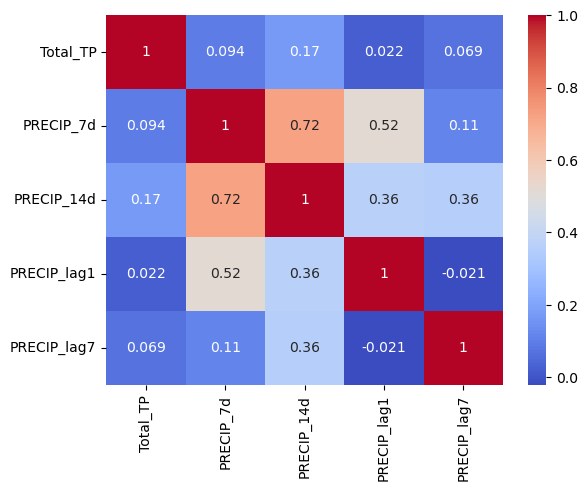

In [376]:
corr = df_hydro_daily_tmp[['Total_TP','PRECIP_7d','PRECIP_14d','PRECIP_lag1','PRECIP_lag7']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

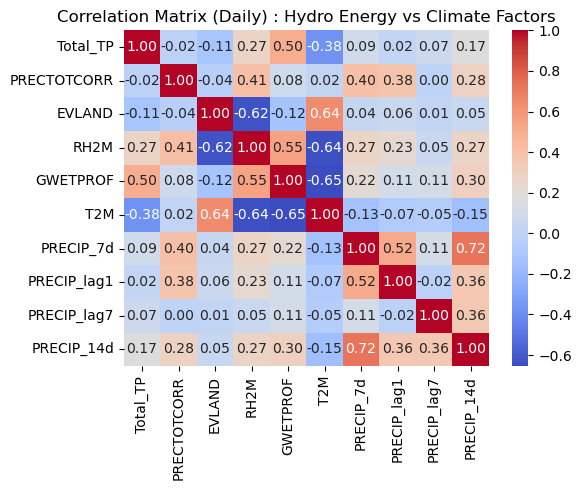

In [378]:
# Correlation Matrix: Hydro Energy vs Climate Factors : Daily
plt.figure(figsize=(6,5))
corr = df_hydro_daily_tmp.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Daily) : Hydro Energy vs Climate Factors')
plt.tight_layout()
plt.show()

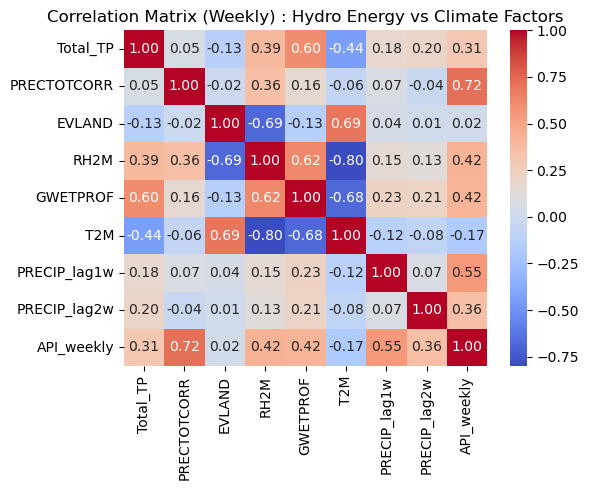

In [400]:
# Correlation Matrix: Hydro Energy vs Climate Factors : Weekly
plt.figure(figsize=(6, 5))
corr = df_hydro_weekly_tmp.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Weekly) : Hydro Energy vs Climate Factors')
plt.tight_layout()
plt.show()

In [446]:
# # ---------Weekly------------------ 
# df_hydro_weekly
# df_south_island_weekly
# df_north_island_weekly

# # ---------Daily-------------------

# df_hydro_daily
# df_south_daily
# df_north_daily

print(df_hydro_weekly_tmp.columns.tolist())
print(df_hydro_daily_tmp.columns.tolist())

['Total_TP', 'PRECTOTCORR', 'EVLAND', 'RH2M', 'GWETPROF', 'T2M', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']
['Total_TP', 'PRECTOTCORR', 'EVLAND', 'RH2M', 'GWETPROF', 'T2M', 'PRECIP_7d', 'PRECIP_14d', 'PRECIP_lag1', 'PRECIP_lag7']


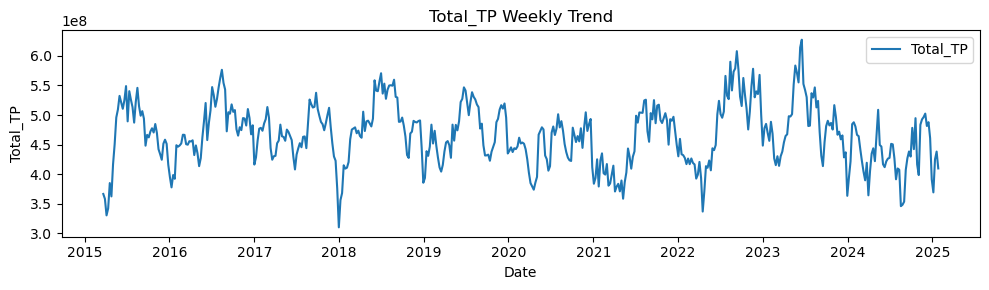

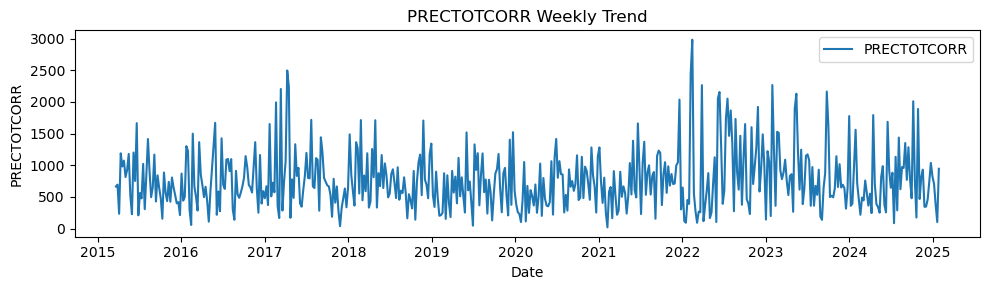

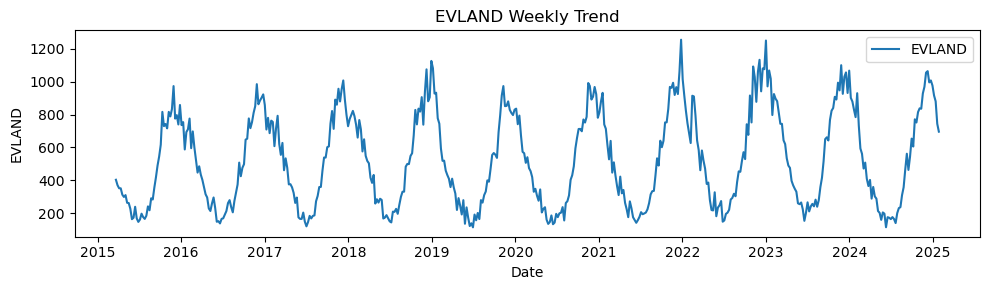

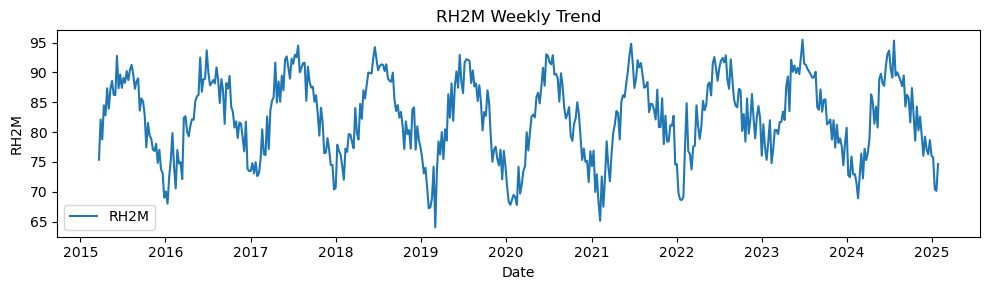

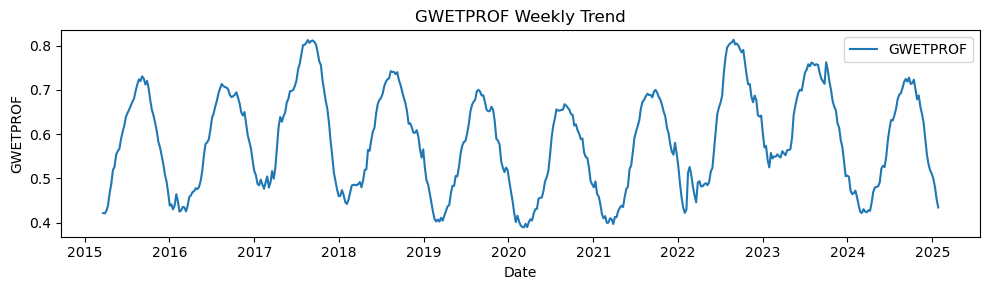

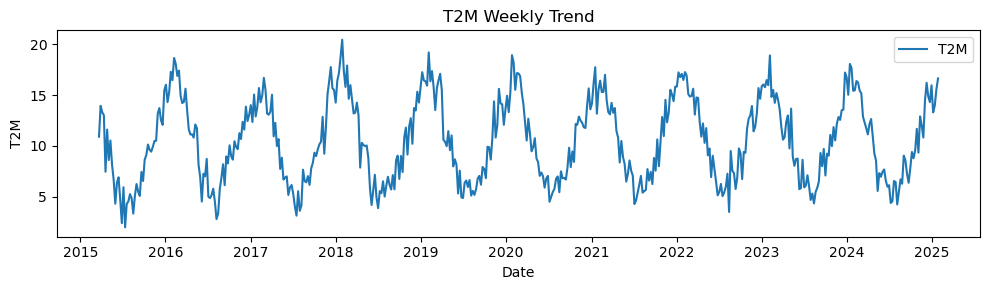

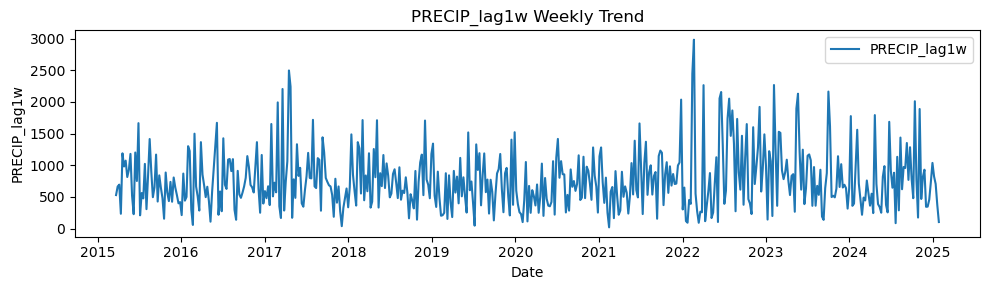

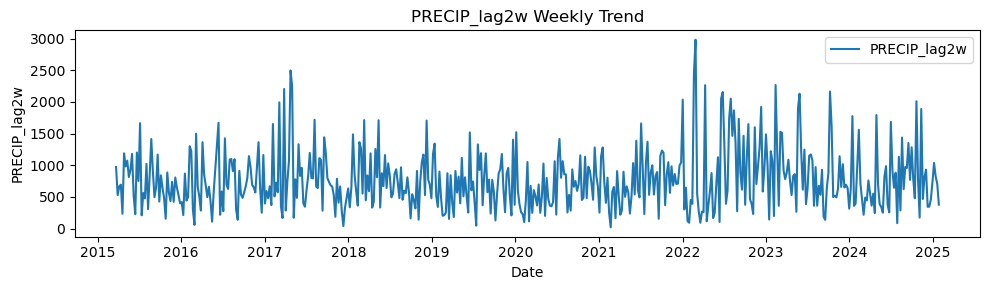

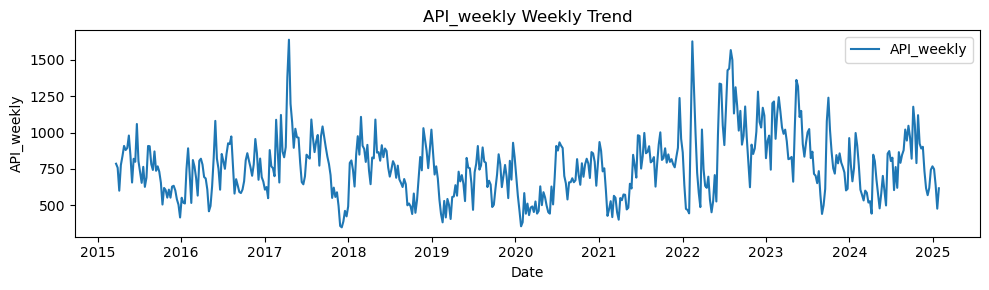

In [416]:
factors = ['Total_TP', 'PRECTOTCORR', 'EVLAND', 'RH2M', 'GWETPROF', 'T2M', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']

for f in factors:
    plt.figure(figsize=(10, 3))
    plt.plot(df_hydro_weekly_tmp[f], label=f)
    plt.title(f'{f} Weekly Trend')
    plt.xlabel('Date')
    plt.ylabel(f)
    plt.legend()
    plt.tight_layout()
    plt.show()

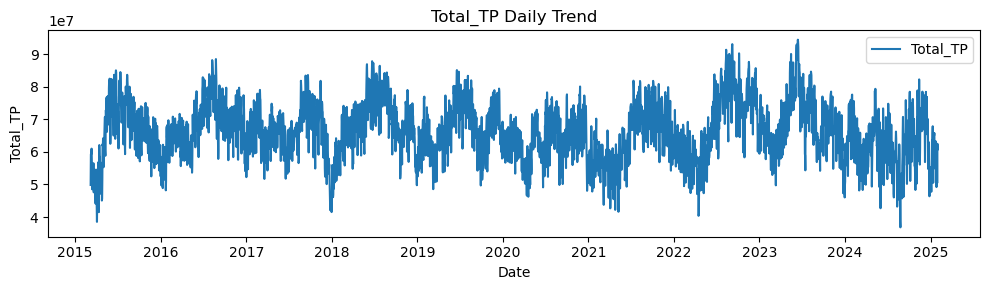

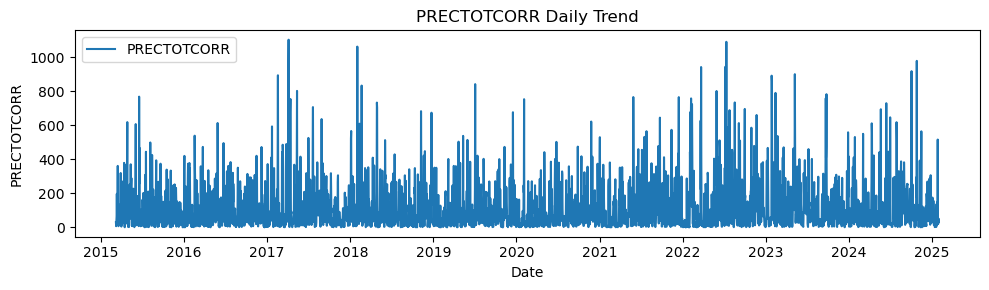

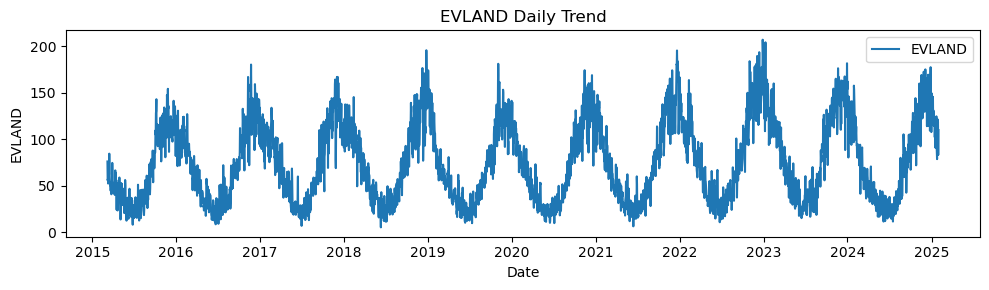

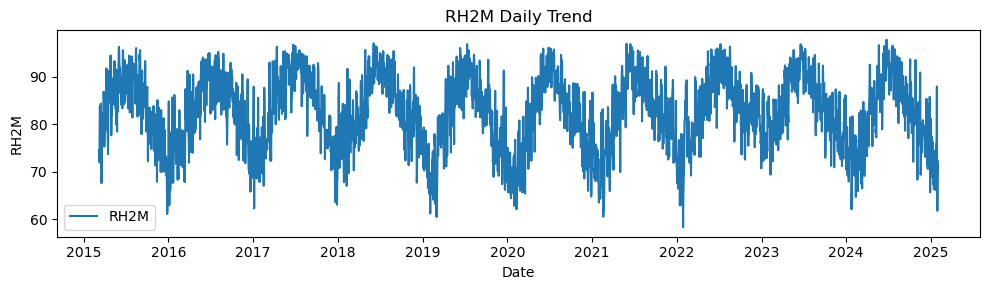

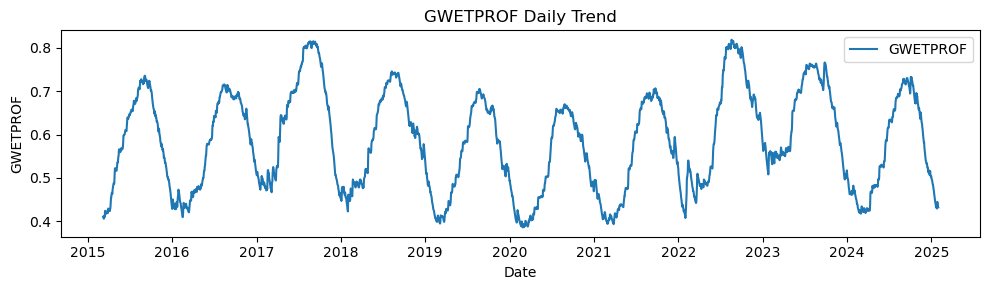

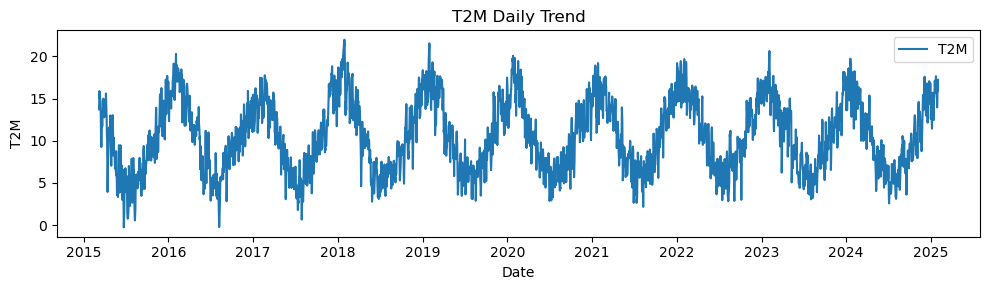

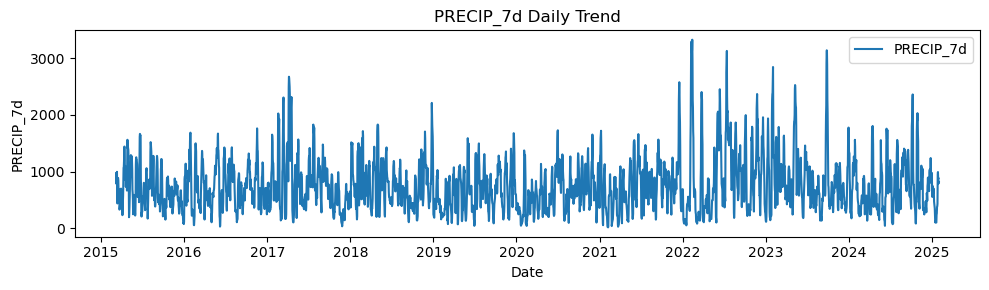

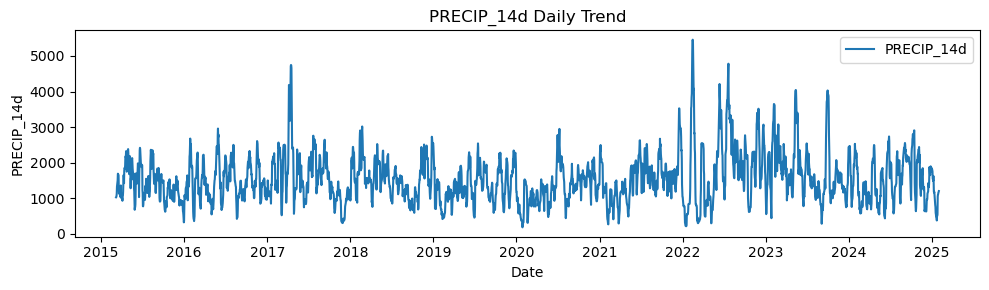

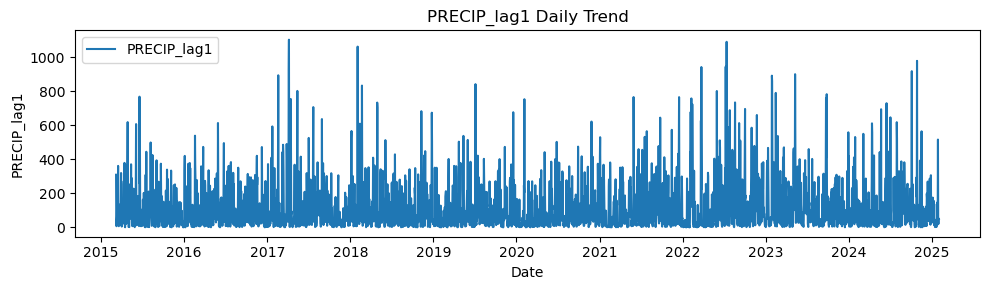

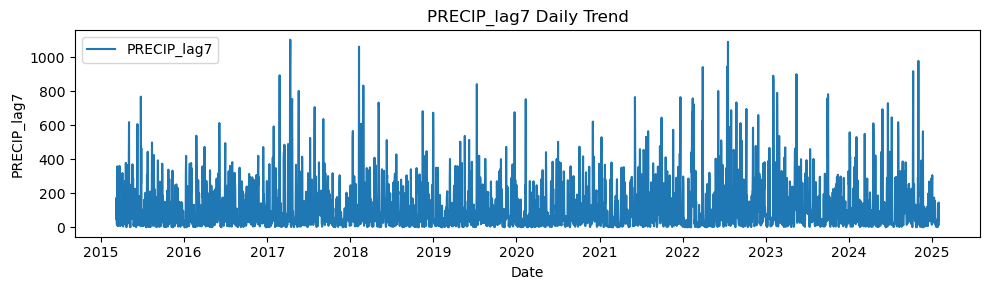

In [452]:
factors = ['Total_TP', 'PRECTOTCORR', 'EVLAND', 'RH2M', 'GWETPROF', 'T2M', 'PRECIP_7d', 'PRECIP_14d', 'PRECIP_lag1', 'PRECIP_lag7']

for f in factors:
    plt.figure(figsize=(10, 3))
    plt.plot(df_hydro_daily_tmp[f], label=f)
    plt.title(f'{f} Daily Trend')
    plt.xlabel('Date')
    plt.ylabel(f)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [450]:
df_hydro_daily_tmp.head()

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M  \
DATE                                                                            
2015-03-08  4.983312e+07        29.84   75.87  74.559150  0.410654  13.733595   
2015-03-09  5.917801e+07         6.86   55.59  73.314984  0.408971  14.516062   
2015-03-10  5.951784e+07        31.58   57.04  71.949330  0.406748  15.891160   
2015-03-11  5.934205e+07        63.90   52.15  79.830033  0.406127  15.019967   
2015-03-12  6.098345e+07       196.91   72.07  83.761585  0.409134  15.030425   

            PRECIP_7d  PRECIP_14d  PRECIP_lag1  PRECIP_lag7  
DATE                                                         
2015-03-08     971.38     1024.12       309.16        52.74  
2015-03-09     805.22     1030.98        29.84       173.02  
2015-03-10     783.87     1062.56         6.86        52.93  
2015-03-11     813.84     1126.46        31.58        33.93  
2015-03-12     996.71     1323.37        63.90        14.04

# Pre Checks - stationery

In [459]:
# stationery check for north island daily data
from statsmodels.tsa.stattools import adfuller

# Assume df_model_for_forecasting has a datetime index and a 'Total_TP' column.
result = adfuller(df_north_daily_tmp['Total_TP'])
print('stationery check for north island - daily ' )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

stationery check for north island - daily 
ADF Statistic: -4.183869
p-value: 0.000702
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [461]:
# stationery check for south island daily data
from statsmodels.tsa.stattools import adfuller

# Assume df_model_for_forecasting has a datetime index and a 'Total_TP' column.
result = adfuller(df_south_daily_tmp['Total_TP'])
print('stationery check for south island - daily ' )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

stationery check for south island - daily 
ADF Statistic: -6.252789
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [463]:
# stationery check for New Zealand daily data
from statsmodels.tsa.stattools import adfuller

# Assume df_model_for_forecasting has a datetime index and a 'Total_TP' column.
result = adfuller(df_hydro_daily_tmp['Total_TP'])
print('stationery check for New Zealand  - daily ' )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

stationery check for New Zealand  - daily 
ADF Statistic: -5.685467
p-value: 0.000001
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [467]:
# stationery check for north island Weekly data
from statsmodels.tsa.stattools import adfuller

# Assume df_model_for_forecasting has a datetime index and a 'Total_TP' column.
result = adfuller(df_north_island_weekly_tmp['Total_TP'])
print('stationery check for north island - Weekly ' )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

stationery check for north island - Weekly 
ADF Statistic: -4.839144
p-value: 0.000046
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [469]:
# stationery check for south island Weekly data
from statsmodels.tsa.stattools import adfuller

# Assume df_model_for_forecasting has a datetime index and a 'Total_TP' column.
result = adfuller(df_south_island_weekly_tmp['Total_TP'])
print('stationery check for south island - Weekly ' )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

stationery check for south island - Weekly 
ADF Statistic: -6.723656
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [471]:
# stationery check for New Zealand Weekly data
from statsmodels.tsa.stattools import adfuller

# Assume df_model_for_forecasting has a datetime index and a 'Total_TP' column.
result = adfuller(df_hydro_weekly_tmp['Total_TP'])
print('stationery check for New Zealand  - Weekly ' )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

stationery check for New Zealand  - Weekly 
ADF Statistic: -6.249243
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [457]:
# Check for rows where Total_TP equals 0.0
zero_records = df_north_daily_tmp[df_north_daily_tmp['Total_TP'] == 0.0]
print("Number of daily records with Total_TP equal to 0:", len(zero_records))
print(zero_records)

Number of daily records with Total_TP equal to 0: 0
Empty DataFrame
Columns: [Total_TP, PRECTOTCORR, EVLAND, RH2M, GWETPROF, T2M, PRECIP_7d, PRECIP_14d, PRECIP_lag1, PRECIP_lag7]
Index: []


# Model Development 

## Start North Island - Daily 

In [476]:
# df_hydro_daily_tmp
# df_south_daily_tmp
# df_north_daily_tmp

In [478]:
# Split the weekly data into 80% training and 20% testing sets
n = len(df_north_daily_tmp)
train_size = int(n * 0.8)
train_daily = df_north_daily_tmp.iloc[:train_size]
test_daily = df_north_daily_tmp.iloc[train_size:]

In [480]:
print("Daily Train set:", train_daily.index.min(), "to", train_daily.index.max())
print("Daily Test set:", test_daily.index.min(), "to", test_daily.index.max())

Daily Train set: 2015-03-08 00:00:00 to 2023-02-07 00:00:00
Daily Test set: 2023-02-08 00:00:00 to 2025-01-31 00:00:00


In [484]:
# Define the target variable (original Total_TP) and exogenous variables
# target_train_log = train_weekly['Total_TP_log']
# target_test_log = test_weekly['Total_TP_log']

target_train = train_daily['Total_TP']
target_test = test_daily['Total_TP']



In [ ]:
#['Total_TP', 'PRECTOTCORR', 'EVLAND', 'RH2M', 'GWETPROF', 'T2M', 'PRECIP_7d', 'PRECIP_14d', 'PRECIP_lag1', 'PRECIP_lag7']

In [526]:
exog_cols = ['RH2M', 'GWETPROF', 'PRECIP_14d' ]
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M','PRECTOTCORR_lag1']
#exog_cols = ['T2M','PRECTOTCORR_lag7','GWETPROF']
#exog_cols = ['EVLAND','T2M']
#exog_cols = ['GWETPROF','EVLAND','T2M']
#exog_cols = ['PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['RH2M','PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['WS50M']

In [528]:
exog_train = train_daily[exog_cols]
exog_test = test_daily[exog_cols]

In [548]:
# Fit SARIMAX on the original (non-log) target data
model = SARIMAX(target_train,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)
print(results.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Total_TP   No. Observations:                 2894
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -46060.471
Date:                Fri, 18 Apr 2025   AIC                          92132.942
Time:                        08:57:15   BIC                          92168.758
Sample:                    03-08-2015   HQIC                         92145.849
                         - 02-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RH2M       -6207.0499   8218.719     -0.755      0.450   -2.23e+04    9901.342
GWETPROF    2.803e+07      1.085   2.58e+07      0.000     2.8e+07     2.8e+07
PRECIP_14d   531.5767    231.361      2.298      0.0

In [550]:
# Forecast on the test set - non log
n_steps = len(test_daily)
forecast = results.get_forecast(steps=n_steps, exog=exog_test).predicted_mean

In [552]:
# Compute performance metrics - non log
rmse = np.sqrt(mean_squared_error(target_test, forecast))
mae = mean_absolute_error(target_test, forecast)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test - forecast) / (target_test + epsilon))) * 100

print("\nForecast Performance Metrics (Without Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (Without Log Transformation):
RMSE: 5425966.78
MAE: 4456852.83
Adjusted MAPE: 30.11%


In [554]:
""" 
### After reforming the data set
exog_cols = ['RH2M', 'GWETPROF', 'PRECIP_14d' ]

Forecast Performance Metrics (Without Log Transformation):
RMSE: 5425966.78
MAE: 4456852.83
Adjusted MAPE: 30.11%
"""

" \n### After reforming the data set\nexog_cols = ['RH2M', 'GWETPROF', 'PRECIP_14d' ]\n\nForecast Performance Metrics (Without Log Transformation):\nRMSE: 5425966.78\nMAE: 4456852.83\nAdjusted MAPE: 30.11%\n"

In [556]:

"""

### before , may be ignore this when analysis

exog_cols = ['RH2M','PRECTOTCORR','GWETPROF','EVLAND','T2M']
Forecast Performance Metrics (Without Log Transformation):
RMSE: 407435.15
MAE: 342181.88
Adjusted MAPE: 38.00%
__________________________________________________________________

exog_cols = ['PRECTOTCORR','GWETPROF','EVLAND','T2M']
Forecast Performance Metrics (Without Log Transformation):
RMSE: 409731.03
MAE: 345097.55
Adjusted MAPE: 38.33%

__________________________________________________________________

exog_cols = ['GWETPROF','EVLAND','T2M']
Forecast Performance Metrics (Without Log Transformation):
RMSE: 408753.43
MAE: 343269.66
Adjusted MAPE: 38.12%

------------------------------------------------------------------

exog_cols = ['EVLAND','T2M']
Forecast Performance Metrics (Without Log Transformation):
RMSE: 535976.88
MAE: 487898.83
Adjusted MAPE: 56.36%

__________________________________________________________________

exog_cols = ['T2M']
Forecast Performance Metrics (Without Log Transformation):
RMSE: 538725.65
MAE: 490849.65
Adjusted MAPE: 56.67%

"""


"\n\n### before , may be ignore this when analysis\n\nexog_cols = ['RH2M','PRECTOTCORR','GWETPROF','EVLAND','T2M']\nForecast Performance Metrics (Without Log Transformation):\nRMSE: 407435.15\nMAE: 342181.88\nAdjusted MAPE: 38.00%\n__________________________________________________________________\n\nexog_cols = ['PRECTOTCORR','GWETPROF','EVLAND','T2M']\nForecast Performance Metrics (Without Log Transformation):\nRMSE: 409731.03\nMAE: 345097.55\nAdjusted MAPE: 38.33%\n\n__________________________________________________________________\n\nexog_cols = ['GWETPROF','EVLAND','T2M']\nForecast Performance Metrics (Without Log Transformation):\nRMSE: 408753.43\nMAE: 343269.66\nAdjusted MAPE: 38.12%\n\n------------------------------------------------------------------\n\nexog_cols = ['EVLAND','T2M']\nForecast Performance Metrics (Without Log Transformation):\nRMSE: 535976.88\nMAE: 487898.83\nAdjusted MAPE: 56.36%\n\n__________________________________________________________________\n\nexog_col

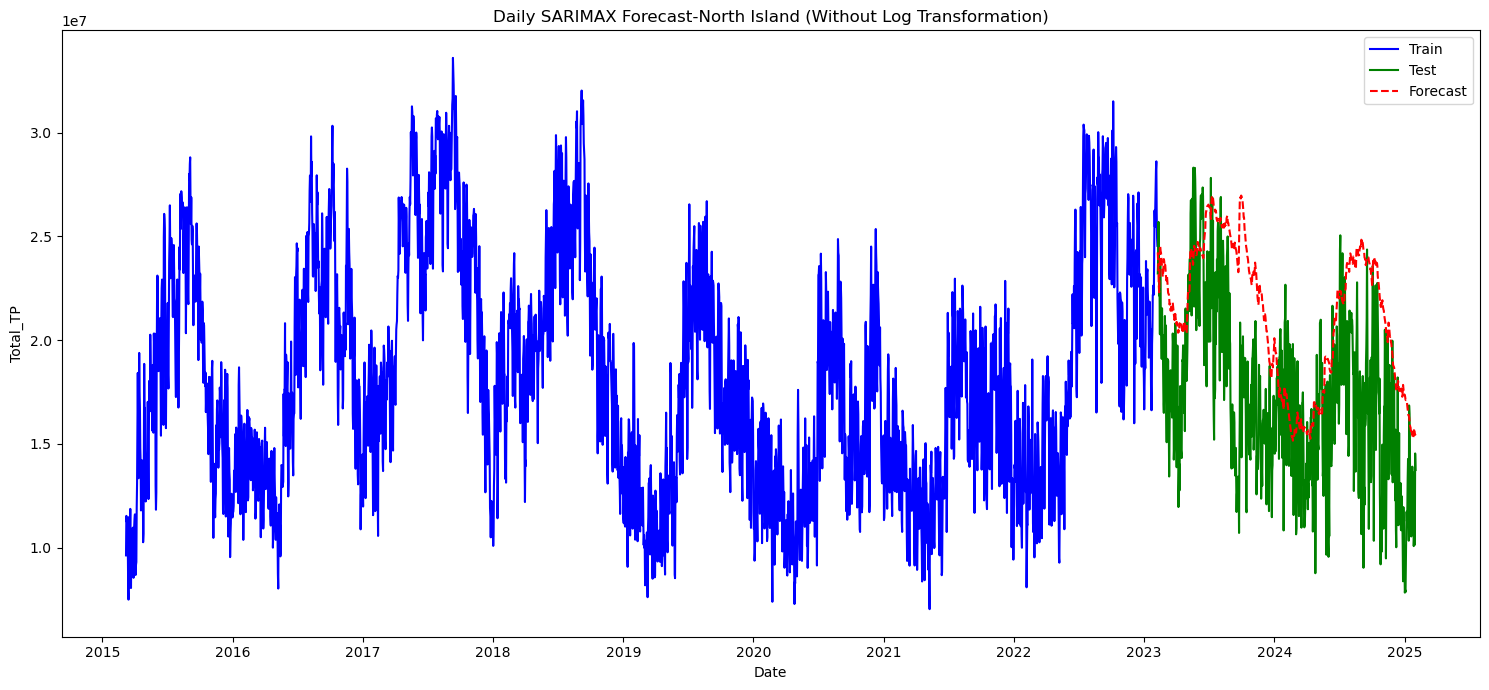

In [558]:
# Plot Actual vs. Forecast
plt.figure(figsize=(15, 7))
plt.plot(train_daily.index, target_train, label='Train', color='blue')
plt.plot(test_daily.index, target_test, label='Test', color='green')
plt.plot(test_daily.index, forecast, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Daily SARIMAX Forecast-North Island (Without Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

### Log transformation to see any perfromance improvemane

In [560]:
# # Create a log-transformed target. Adding 1 to avoid log(0) 
df_north_daily_tmp['Total_TP_log'] = np.log(df_north_daily_tmp['Total_TP'] + 1)

In [562]:
df_north_daily_tmp.head(5)

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M  \
DATE                                                                           
2015-03-08   9622106.54        18.98   37.05  71.919412  0.333529  16.289412   
2015-03-09  11526047.85         0.96   17.98  73.339412  0.332941  16.198235   
2015-03-10  11243912.43         0.16   23.29  67.215882  0.332941  18.081765   
2015-03-11  11379661.17        53.76   22.00  77.351176  0.330588  17.618824   
2015-03-12  11297731.57       177.90   40.37  88.537059  0.338824  16.345294   

            PRECIP_7d  PRECIP_14d  PRECIP_lag1  PRECIP_lag7  Total_TP_log  
DATE                                                                       
2015-03-08     204.03      204.24        99.18         0.21     16.079574  
2015-03-09     204.81      205.20        18.98         0.18     16.260120  
2015-03-10     202.43      205.36         0.96         2.54     16.235338  
2015-03-11     237.41      259.12         0.16        18.78     16.247338  
2015-03-12     413.95      437.02        53.76         1.36     16.240113

In [564]:
# Split the weekly data into 80% training and 20% testing sets
n = len(df_north_daily_tmp)
train_size = int(n * 0.8)
train_daily = df_north_daily_tmp.iloc[:train_size]
test_daily = df_north_daily_tmp.iloc[train_size:]

In [566]:
print("Daily Train set:", train_daily.index.min(), "to", train_daily.index.max())
print("Daily Test set:", test_daily.index.min(), "to", test_daily.index.max())

Daily Train set: 2015-03-08 00:00:00 to 2023-02-07 00:00:00
Daily Test set: 2023-02-08 00:00:00 to 2025-01-31 00:00:00


In [568]:
# Define the target variable (original Total_TP) and exogenous variables
target_train_log = train_daily['Total_TP_log']
target_test_log = test_daily['Total_TP_log']

# target_train = train_weekly['Total_TP']
# target_test = test_weekly['Total_TP']

In [ ]:
exog_cols = ['RH2M','GWETPROF','PRECTOTCORR_lag1']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M','PRECTOTCORR_lag1']
#exog_cols = ['T2M','PRECTOTCORR_lag7','GWETPROF']
#exog_cols = ['EVLAND','T2M']
#exog_cols = ['GWETPROF','EVLAND','T2M']
#exog_cols = ['PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['RH2M','PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['WS50M']


In [570]:
exog_train = train_daily[exog_cols]
exog_test = test_daily[exog_cols]

In [572]:
# Fit SARIMAX on the original (log) target data
model_log = SARIMAX(target_train_log,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results_log = model_log.fit(disp=False)
print(results_log.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Total_TP_log   No. Observations:                 2894
Model:               SARIMAX(1, 1, 1)   Log Likelihood                1759.477
Date:                Fri, 18 Apr 2025   AIC                          -3506.953
Time:                        09:25:56   BIC                          -3471.137
Sample:                    03-08-2015   HQIC                         -3494.046
                         - 02-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RH2M          -0.0002      0.000     -0.568      0.570      -0.001       0.001
GWETPROF       1.9326      0.439      4.401      0.000       1.072       2.793
PRECIP_14d  1.816e-05   2.24e-05      0.811      0.4

In [574]:
# Forecast on the test set
n_steps_log = len(test_daily)
forecast_log = results_log.get_forecast(steps=n_steps_log, exog=exog_test).predicted_mean

In [576]:
# Compute performance metrics
rmse = np.sqrt(mean_squared_error(target_test_log, forecast_log))
mae = mean_absolute_error(target_test_log, forecast_log)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test_log - forecast_log) / (target_test_log + epsilon))) * 100

print("\nForecast Performance Metrics (With Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (With Log Transformation):
RMSE: 0.32
MAE: 0.26
Adjusted MAPE: 1.55%


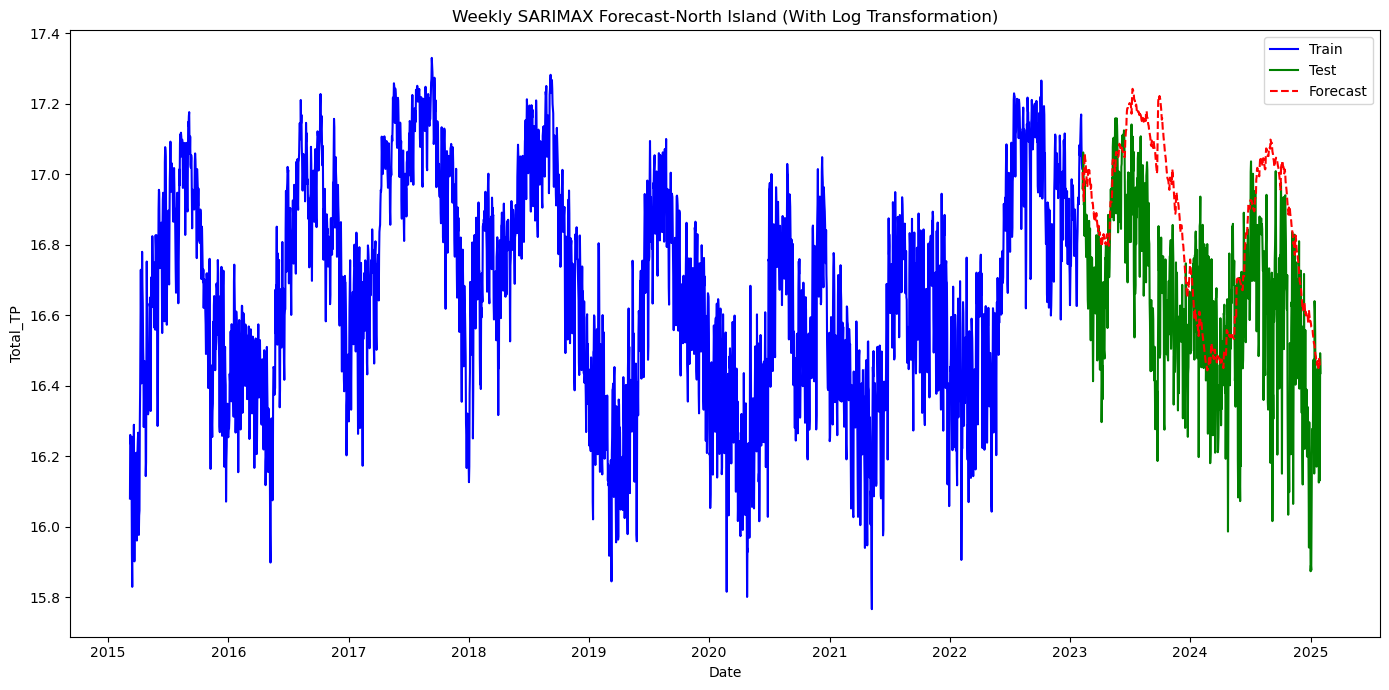

In [578]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_daily.index, target_train_log, label='Train', color='blue')
plt.plot(test_daily.index, target_test_log, label='Test', color='green')
plt.plot(test_daily.index, forecast_log, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Weekly SARIMAX Forecast-North Island (With Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

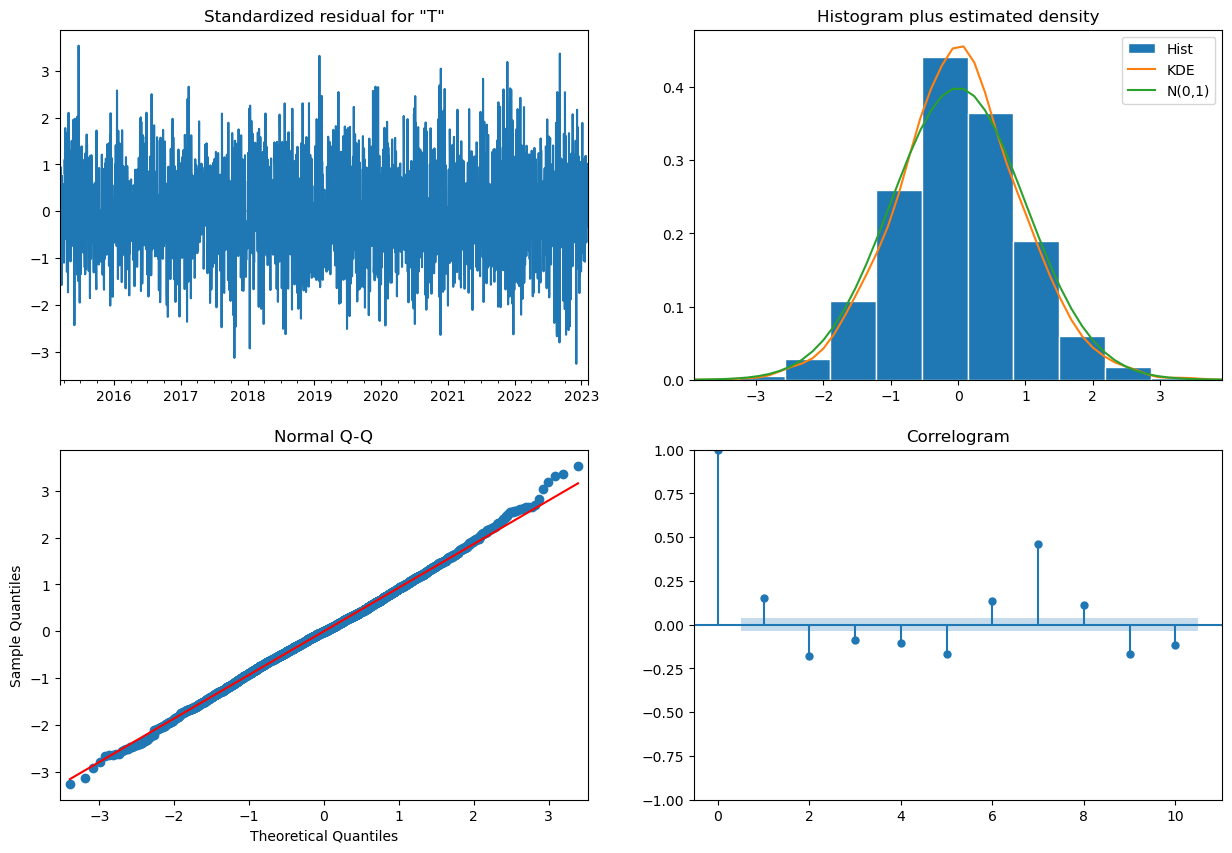

In [580]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

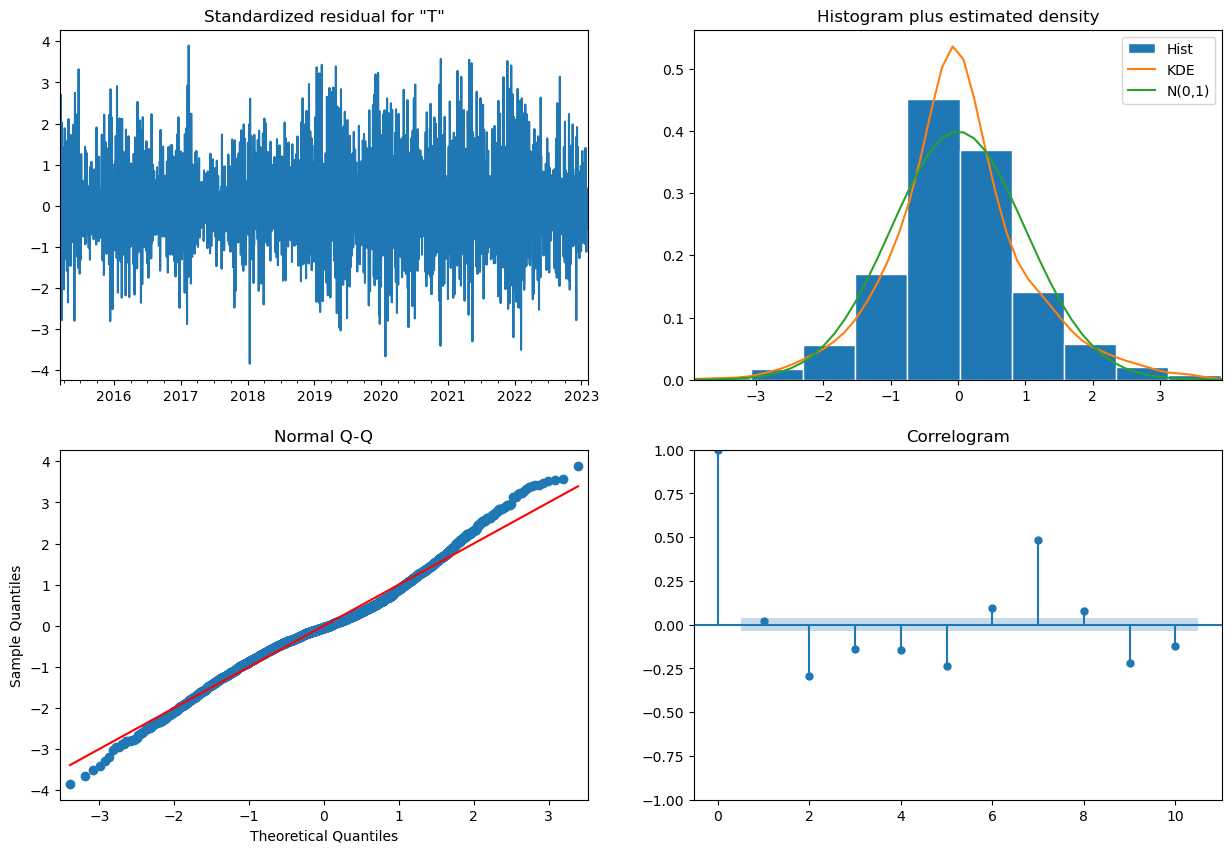

In [582]:
results_log.plot_diagnostics(figsize=(15, 10))
plt.show()

## North Island - Weekly 

In [692]:
# Find rows with zero Total_TP in South Island
zero_tp_south = df_north_island_weekly_tmp[df_north_island_weekly_tmp['Total_TP'] == 0]

# Get the unique dates
zero_dates = zero_tp_south.index.unique()

# Display the result
print("Dates with Total_TP = 0 in North Island:")
for date in zero_dates:
    print(date.strftime('%Y-%m-%d'))

Dates with Total_TP = 0 in North Island:


In [694]:
df_north_island_weekly_tmp.head(5)

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M  \
DATE                                                                            
2015-03-22  7.120258e+07       399.07  238.96  70.463782  0.368403  13.776807   
2015-03-29  7.092097e+07       326.24  216.04  80.650000  0.360000  16.227563   
2015-04-05  7.093331e+07        44.53  174.38  77.631261  0.362605  15.508235   
2015-04-12  9.771136e+07       717.41  185.60  85.405462  0.375378  16.036639   
2015-04-19  1.111432e+08       646.65  184.17  80.490084  0.413109  10.195378   

            PRECIP_lag1w  PRECIP_lag2w  API_weekly  Total_TP_log  
DATE                                                              
2015-03-22        372.58        204.03  297.937500     18.081040  
2015-03-29        399.07        372.58  306.428250     18.077077  
2015-04-05        326.24        399.07  227.858775     18.077251  
2015-04-12         44.53        326.24  374.724142     18.397528  
2015-04-19        717.41         44.53  456.301900     18.526330

In [593]:
# Split the weekly data into 80% training and 20% testing sets
n = len(df_north_island_weekly_tmp)
train_size = int(n * 0.8)
train_weekly = df_north_island_weekly_tmp.iloc[:train_size]
test_weekly = df_north_island_weekly_tmp.iloc[train_size:]

In [603]:
print("Weekly Train set:", train_weekly.index.min(), "to", train_weekly.index.max() , " Records count : ",len(train_weekly) )
print("Weekly Test set:", test_weekly.index.min(), "to", test_weekly.index.max(), " Records count : ",len(test_weekly) )

Weekly Train set: 2015-03-22 00:00:00 to 2023-02-05 00:00:00  Records count :  412
Weekly Test set: 2023-02-12 00:00:00 to 2025-01-26 00:00:00  Records count :  103


In [605]:
# Define the target variable (original Total_TP) and exogenous variables
# target_train_log = train_weekly['Total_TP_log']
# target_test_log = test_weekly['Total_TP_log']

target_train = train_weekly['Total_TP']
target_test = test_weekly['Total_TP']


In [607]:
#['Total_TP', 'PRECTOTCORR', 'EVLAND', 'RH2M', 'GWETPROF', 'T2M', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']
exog_cols_wk = ['RH2M', 'GWETPROF', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']
#exog_cols = ['WS50M']

In [609]:
exog_train = train_weekly[exog_cols_wk]
exog_test = test_weekly[exog_cols_wk]

In [611]:
# Fit SARIMAX on the original (non-log) target data
model = SARIMAX(target_train,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               Total_TP   No. Observations:                  412
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7226.109
Date:                Fri, 18 Apr 2025   AIC                          14468.218
Time:                        09:36:34   BIC                          14500.328
Sample:                    03-22-2015   HQIC                         14480.923
                         - 02-05-2023                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
RH2M          -5.34e+05   1.19e+05     -4.481      0.000   -7.67e+05      -3e+05
GWETPROF      2.281e+08    452.533   5.04e+05      0.000    2.28e+08    2.28e+08
PRECIP_lag1w  -840.7273   1387.814     -0.60

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [613]:
# Forecast on the test set - non log
n_steps = len(test_weekly)
forecast = results.get_forecast(steps=n_steps, exog=exog_test).predicted_mean

In [615]:
# Compute performance metrics - non log
rmse = np.sqrt(mean_squared_error(target_test, forecast))
mae = mean_absolute_error(target_test, forecast)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test - forecast) / (target_test + epsilon))) * 100

print("\nForecast Performance Metrics (Without Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (Without Log Transformation):
RMSE: 24861626.22
MAE: 20227883.78
Adjusted MAPE: 17.81%


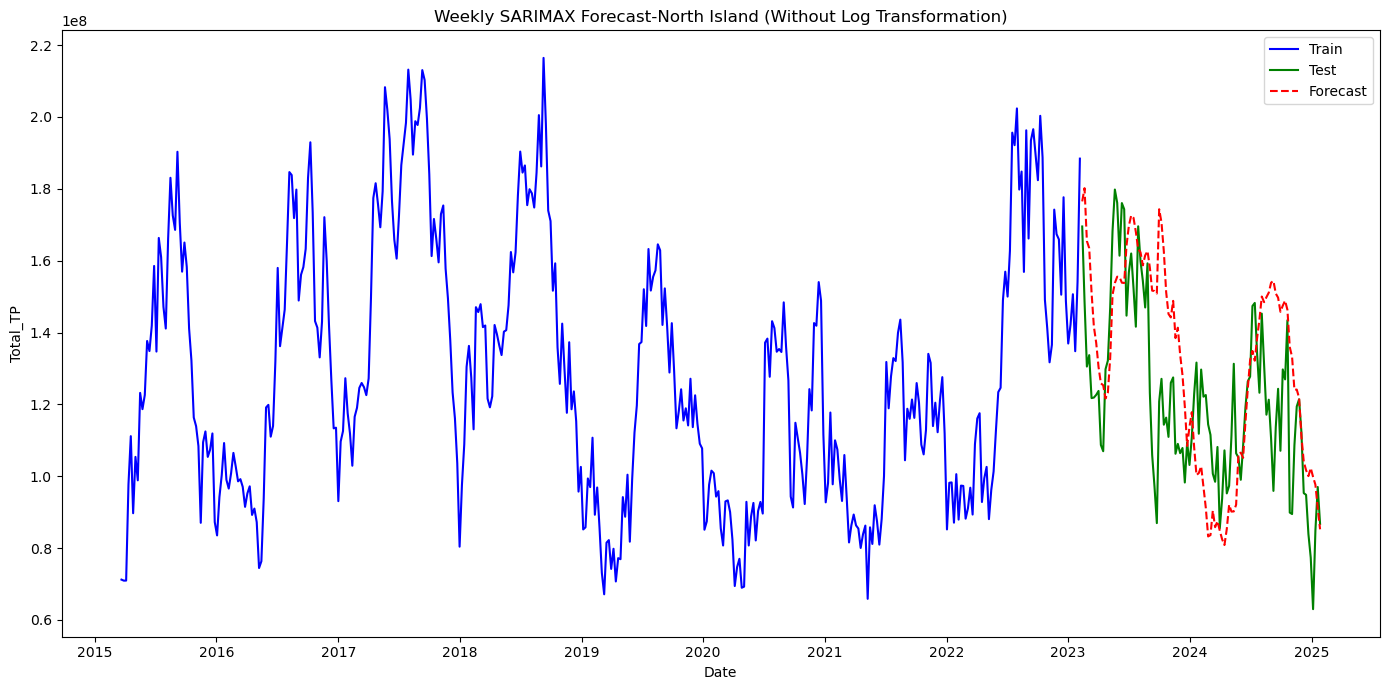

In [617]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_weekly.index, target_train, label='Train', color='blue')
plt.plot(test_weekly.index, target_test, label='Test', color='green')
plt.plot(test_weekly.index, forecast, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Weekly SARIMAX Forecast-North Island (Without Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

In [619]:
# # Create a log-transformed target. Adding 1 to avoid log(0) if needed.
df_north_island_weekly_tmp['Total_TP_log'] = np.log(df_north_island_weekly_tmp['Total_TP'] + 1)

In [621]:
# Split the weekly data into 80% training and 20% testing sets
# n = len(df_island_north_weekly)
# train_size = int(n * 0.8)
# train_weekly = df_island_north.iloc[:train_size]
# test_weekly = df_island_north.iloc[train_size:]

# Split the weekly data into 80% training and 20% testing sets
n = len(df_north_island_weekly_tmp)
train_size = int(n * 0.8)
train_weekly = df_north_island_weekly_tmp.iloc[:train_size]
test_weekly = df_north_island_weekly_tmp.iloc[train_size:]

In [623]:
print("Weekly Train set:", train_weekly.index.min(), "to", train_weekly.index.max() , " Records count : ",len(train_weekly) )
print("Weekly Test set:", test_weekly.index.min(), "to", test_weekly.index.max(), " Records count : ",len(test_weekly) )

Weekly Train set: 2015-03-22 00:00:00 to 2023-02-05 00:00:00  Records count :  412
Weekly Test set: 2023-02-12 00:00:00 to 2025-01-26 00:00:00  Records count :  103


In [625]:
# Define the target variable (original Total_TP) and exogenous variables
target_train_log = train_weekly['Total_TP_log']
target_test_log = test_weekly['Total_TP_log']

# target_train = train_weekly['Total_TP']
# target_test = test_weekly['Total_TP']


In [ ]:

# exog_cols = ['WS50M','PS']
#exog_cols = ['WS50M']


In [627]:
exog_train = train_weekly[exog_cols_wk]
exog_test = test_weekly[exog_cols_wk]

In [629]:
# Fit SARIMAX on the original (log) target data
model_log = SARIMAX(target_train_log,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results_log = model_log.fit(disp=False)
print(results_log.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Total_TP_log   No. Observations:                  412
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 384.675
Date:                Fri, 18 Apr 2025   AIC                           -753.350
Time:                        09:39:27   BIC                           -721.240
Sample:                    03-22-2015   HQIC                          -740.645
                         - 02-05-2023                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
RH2M            -0.0044      0.001     -3.057      0.002      -0.007      -0.002
GWETPROF         1.8272      0.196      9.331      0.000       1.443       2.211
PRECIP_lag1w -1.382e-05   1.42e-05     -0.97

In [631]:
# Forecast on the test set
n_steps_log = len(test_weekly)
forecast_log = results_log.get_forecast(steps=n_steps_log, exog=exog_test).predicted_mean

In [633]:
# Compute performance metrics
rmse = np.sqrt(mean_squared_error(target_test_log, forecast_log))
mae = mean_absolute_error(target_test_log, forecast_log)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test_log - forecast_log) / (target_test_log + epsilon))) * 100

print("\nForecast Performance Metrics (With Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (With Log Transformation):
RMSE: 0.26
MAE: 0.21
Adjusted MAPE: 1.11%


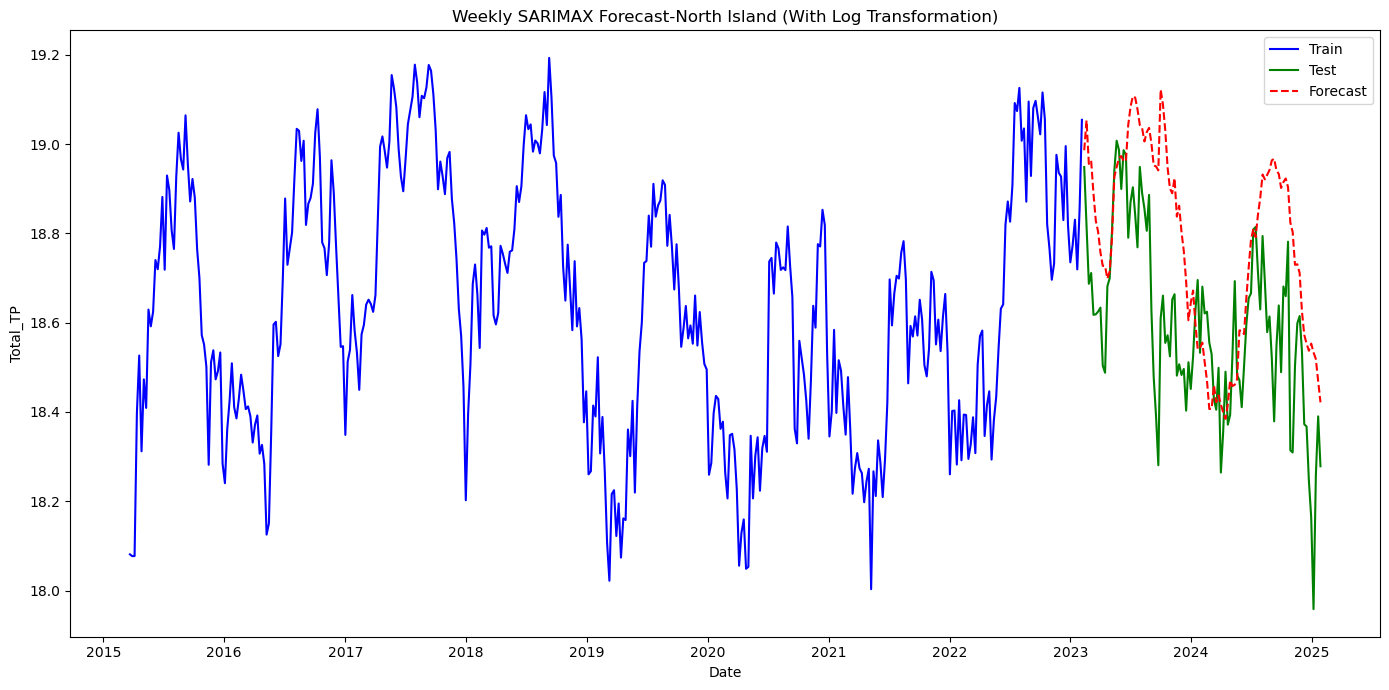

In [635]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_weekly.index, target_train_log, label='Train', color='blue')
plt.plot(test_weekly.index, target_test_log, label='Test', color='green')
plt.plot(test_weekly.index, forecast_log, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Weekly SARIMAX Forecast-North Island (With Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

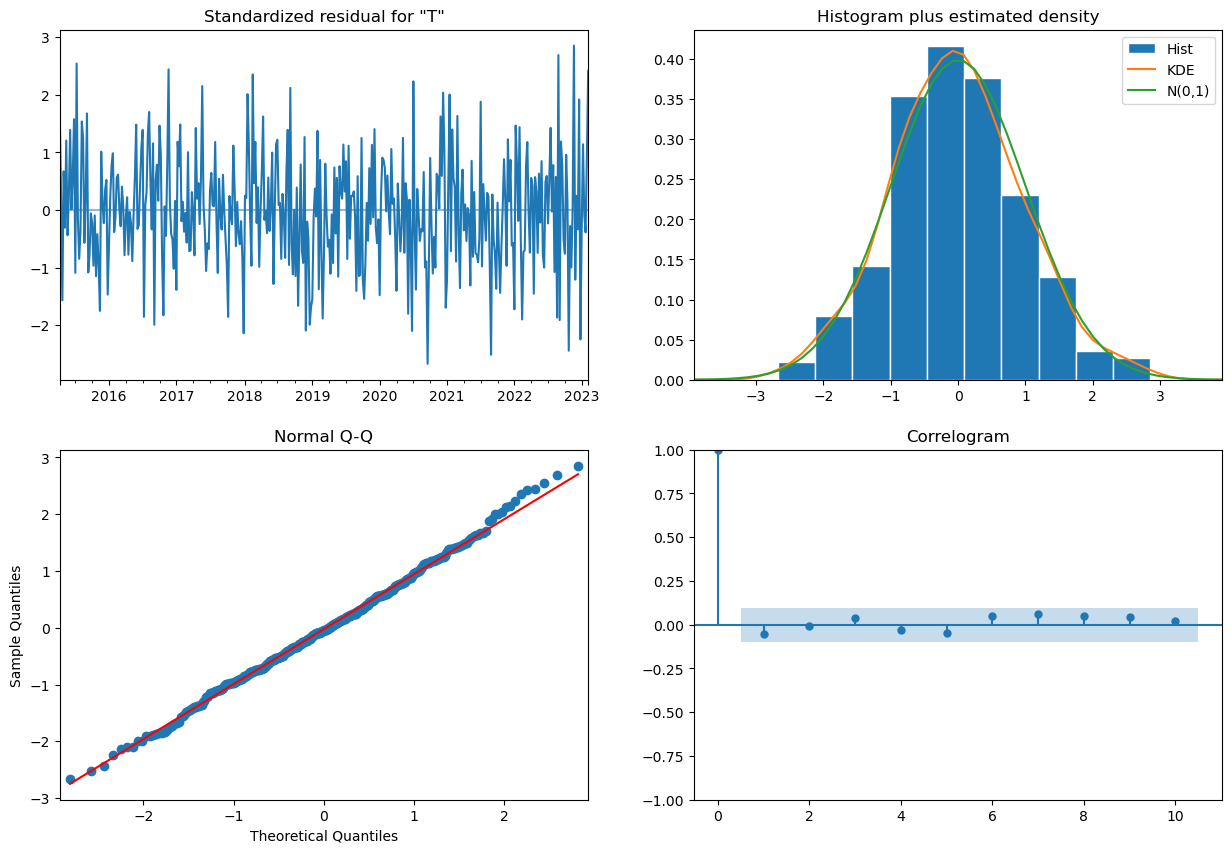

In [637]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

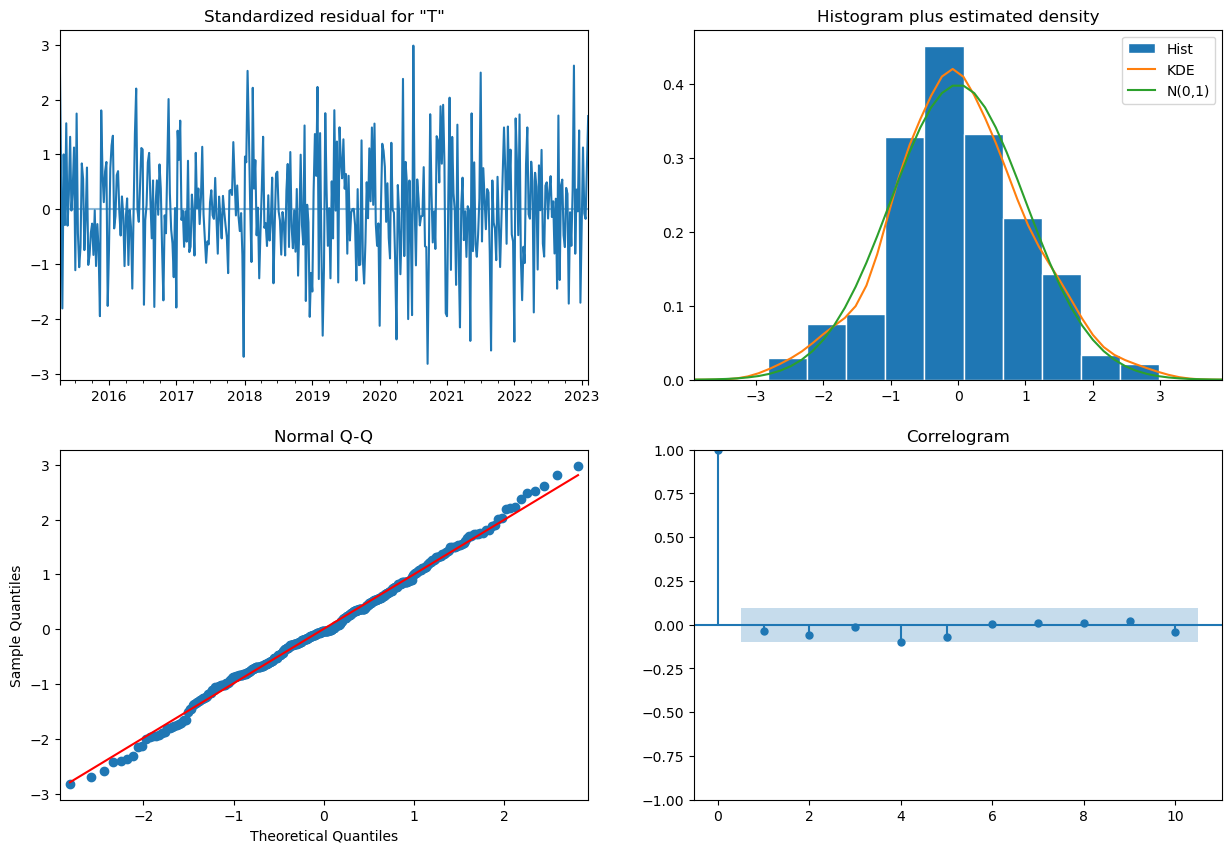

In [639]:
results_log.plot_diagnostics(figsize=(15, 10))
plt.show()

## End North Island

## Start South Island 

In [648]:
df_south_daily_tmp.head()

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M  \
DATE                                                                            
2015-03-08  4.021101e+07        10.86   38.82  77.198889  0.487778  11.177778   
2015-03-09  4.765196e+07         5.90   37.61  73.290556  0.485000  12.833889   
2015-03-10  4.827393e+07        31.42   33.75  76.682778  0.480556  13.700556   
2015-03-11  4.796238e+07        10.14   30.15  82.308889  0.481667  12.421111   
2015-03-12  4.968572e+07        19.01   31.70  78.986111  0.479444  13.715556   

            PRECIP_7d  PRECIP_14d  PRECIP_lag1  PRECIP_lag7  
DATE                                                         
2015-03-08     767.35      819.88       209.98        52.53  
2015-03-09     600.41      825.78        10.86       172.84  
2015-03-10     581.44      857.20         5.90        50.39  
2015-03-11     576.43      867.34        31.42        15.15  
2015-03-12     582.76      886.35        10.14        12.68

In [646]:
# df_hydro_daily_tmp
# df_south_daily_tmp
# df_north_daily_tmp --- done

In [650]:
# Find rows with zero Total_TP in South Island
zero_tp_south = df_south_daily_tmp[df_south_daily_tmp['Total_TP'] == 0]

# Get the unique dates
zero_dates = zero_tp_south.index.unique()

# Display the result
print("Dates with Total_TP = 0 in South Island:")
for date in zero_dates:
    print(date.strftime('%Y-%m-%d'))

Dates with Total_TP = 0 in South Island:


If a zero actually means no generation (e.g., turbine was off), you might not want to interpolate—but if it’s a data artifact or gap, this is valid.

In [652]:
# Split the weekly data into 80% training and 20% testing sets
n = len(df_south_daily_tmp)
train_size = int(n * 0.8)
train_daily = df_south_daily_tmp.iloc[:train_size]
test_daily = df_south_daily_tmp.iloc[train_size:]

In [654]:
# print("Daily Train set:", train_weekly.index.min(), "to", train_weekly.index.max())
# print("Weekly Test set:", test_weekly.index.min(), "to", test_weekly.index.max())

print("Daily Train set:", train_daily.index.min(), "to", train_daily.index.max() , " Records count : ",len(train_daily) )
print("Daily Test set:", test_daily.index.min(), "to", test_daily.index.max(), " Records count : ",len(test_daily) )

Daily Train set: 2015-03-08 00:00:00 to 2023-02-07 00:00:00  Records count :  2894
Daily Test set: 2023-02-08 00:00:00 to 2025-01-31 00:00:00  Records count :  724


In [656]:
# Define the target variable (original Total_TP) and exogenous variables
# target_train_log = train_weekly['Total_TP_log']
# target_test_log = test_weekly['Total_TP_log']

target_train = train_daily['Total_TP']
target_test = test_daily['Total_TP']



In [ ]:
exog_cols = ['RH2M','GWETPROF','PRECTOTCORR_lag1']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M','PRECTOTCORR_lag1']
#exog_cols = ['T2M','PRECTOTCORR_lag7','GWETPROF']
#exog_cols = ['EVLAND','T2M']
#exog_cols = ['GWETPROF','EVLAND','T2M']
#exog_cols = ['PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['RH2M','PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['WS50M']
#exog_cols = ['WS50M','PS']
#exog_cols = ['WS50M']


In [658]:
exog_train = train_daily[exog_cols]
exog_test = test_daily[exog_cols]

In [660]:
# Fit SARIMAX on the original (non-log) target data
model = SARIMAX(target_train,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)
print(results.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Total_TP   No. Observations:                 2894
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -47663.522
Date:                Fri, 18 Apr 2025   AIC                          95339.043
Time:                        09:50:17   BIC                          95374.859
Sample:                    03-08-2015   HQIC                         95351.951
                         - 02-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RH2M       -1.117e+04   1.69e+04     -0.661      0.509   -4.43e+04     2.2e+04
GWETPROF    1.773e+07      3.858    4.6e+06      0.000    1.77e+07    1.77e+07
PRECIP_14d -2113.7371    511.281     -4.134      0.0

In [662]:
# Forecast on the test set - non log
n_steps = len(test_daily)
forecast = results.get_forecast(steps=n_steps, exog=exog_test).predicted_mean

In [664]:
# Compute performance metrics - non log
rmse = np.sqrt(mean_squared_error(target_test, forecast))
mae = mean_absolute_error(target_test, forecast)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test - forecast) / (target_test + epsilon))) * 100

print("\nForecast Performance Metrics (Without Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (Without Log Transformation):
RMSE: 7337810.55
MAE: 5918806.18
Adjusted MAPE: 12.33%


In [666]:
print("Minimum of actual values in test set:", target_test.min())
print("Number of zeros in actual test set:", np.sum(target_test == 0))

Minimum of actual values in test set: 24448887.0
Number of zeros in actual test set: 0


In [ ]:
#
# exog_cols = ['WS50M']
# Forecast Performance Metrics (Without Log Transformation):
# RMSE: 273334.64
# MAE: 213157.34
# Adjusted MAPE: 33.02%
##########################################
# exog_cols = ['WS50M','PS']
# Forecast Performance Metrics (Without Log Transformation):
# RMSE: 277535.29
# MAE: 217705.17
# Adjusted MAPE: 33.91%

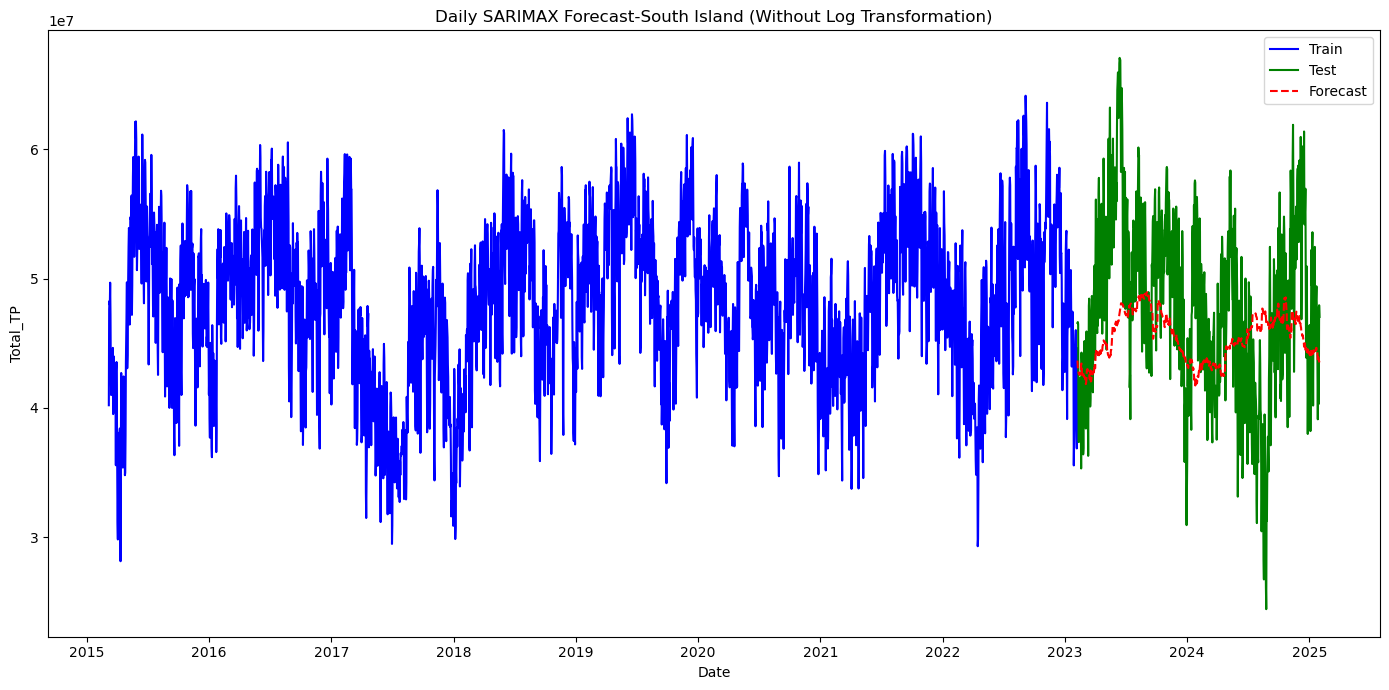

In [668]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_daily.index, target_train, label='Train', color='blue')
plt.plot(test_daily.index, target_test, label='Test', color='green')
plt.plot(test_daily.index, forecast, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Daily SARIMAX Forecast-South Island (Without Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

In [672]:
# # Create a log-transformed target. Adding 1 to avoid log(0) if needed.
df_south_daily_tmp['Total_TP_log'] = np.log(df_south_daily_tmp['Total_TP'] + 1)

In [674]:
# Split the weekly data into 80% training and 20% testing sets
n = len(df_south_daily_tmp)
train_size = int(n * 0.8)
train_daily = df_south_daily_tmp.iloc[:train_size]
test_daily = df_south_daily_tmp.iloc[train_size:]

In [676]:
# Define the target variable (original Total_TP) and exogenous variables
target_train_log = train_daily['Total_TP_log']
target_test_log = test_daily['Total_TP_log']

# target_train = train_weekly['Total_TP']
# target_test = test_weekly['Total_TP']

In [ ]:
exog_cols = ['RH2M','GWETPROF','PRECTOTCORR_lag1']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M','PRECTOTCORR_lag1']
#exog_cols = ['T2M','PRECTOTCORR_lag7','GWETPROF']
#exog_cols = ['EVLAND','T2M']
#exog_cols = ['GWETPROF','EVLAND','T2M']
#exog_cols = ['PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['RH2M','PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['WS50M']
#exog_cols = ['WS50M','PS']
#exog_cols = ['WS50M']


In [678]:
exog_train = train_daily[exog_cols]
exog_test = test_daily[exog_cols]

In [680]:
# Fit SARIMAX on the original (log) target data
model_log = SARIMAX(target_train_log,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results_log = model_log.fit(disp=False)
print(results_log.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Total_TP_log   No. Observations:                 2894
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3202.576
Date:                Fri, 18 Apr 2025   AIC                          -6393.152
Time:                        10:12:08   BIC                          -6357.335
Sample:                    03-08-2015   HQIC                         -6380.244
                         - 02-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RH2M          -0.0001      0.000     -0.419      0.675      -0.001       0.000
GWETPROF       0.3944      0.308      1.280      0.201      -0.210       0.998
PRECIP_14d -4.854e-05   1.57e-05     -3.091      0.0

In [682]:
# Forecast on the test set
n_steps_log = len(test_daily)
forecast_log = results_log.get_forecast(steps=n_steps_log, exog=exog_test).predicted_mean

In [684]:
# Compute performance metrics
rmse = np.sqrt(mean_squared_error(target_test_log, forecast_log))
mae = mean_absolute_error(target_test_log, forecast_log)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test_log - forecast_log) / (target_test_log + epsilon))) * 100

print("\nForecast Performance Metrics (With Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (With Log Transformation):
RMSE: 0.15
MAE: 0.12
Adjusted MAPE: 0.66%


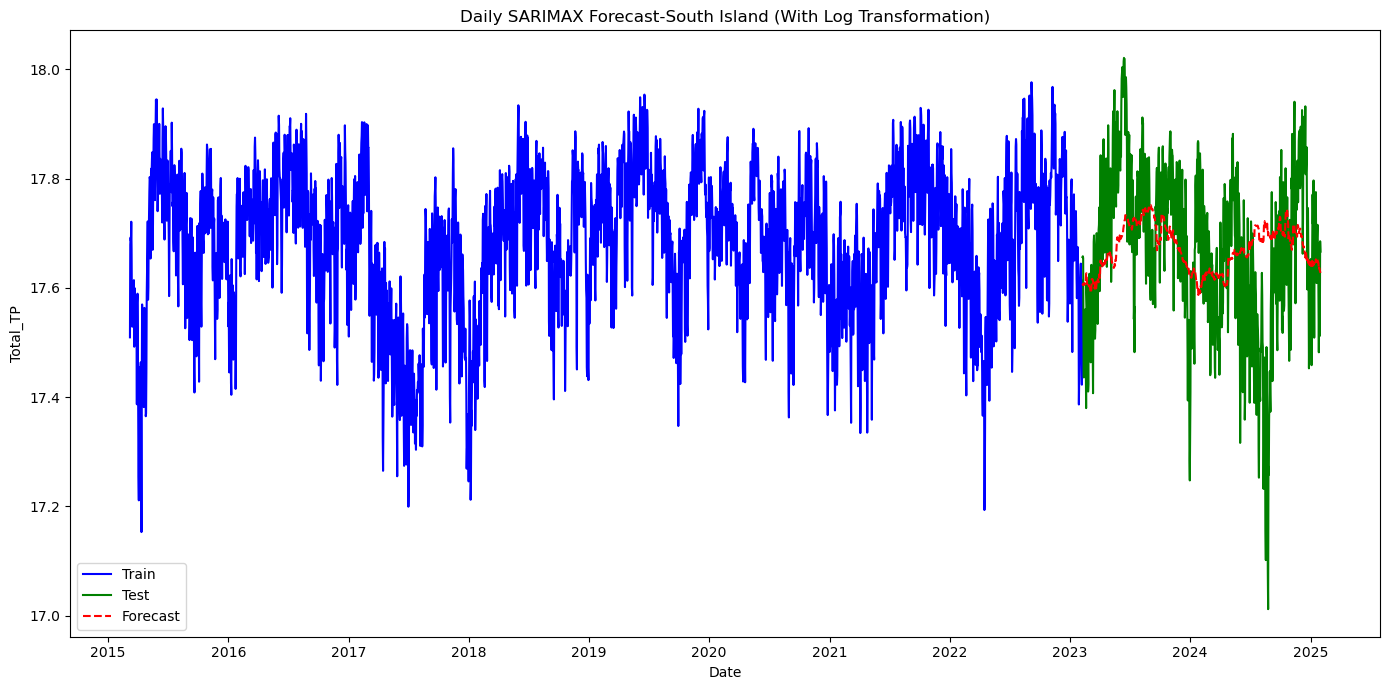

In [686]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_daily.index, target_train_log, label='Train', color='blue')
plt.plot(test_daily.index, target_test_log, label='Test', color='green')
plt.plot(test_daily.index, forecast_log, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Daily SARIMAX Forecast-South Island (With Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

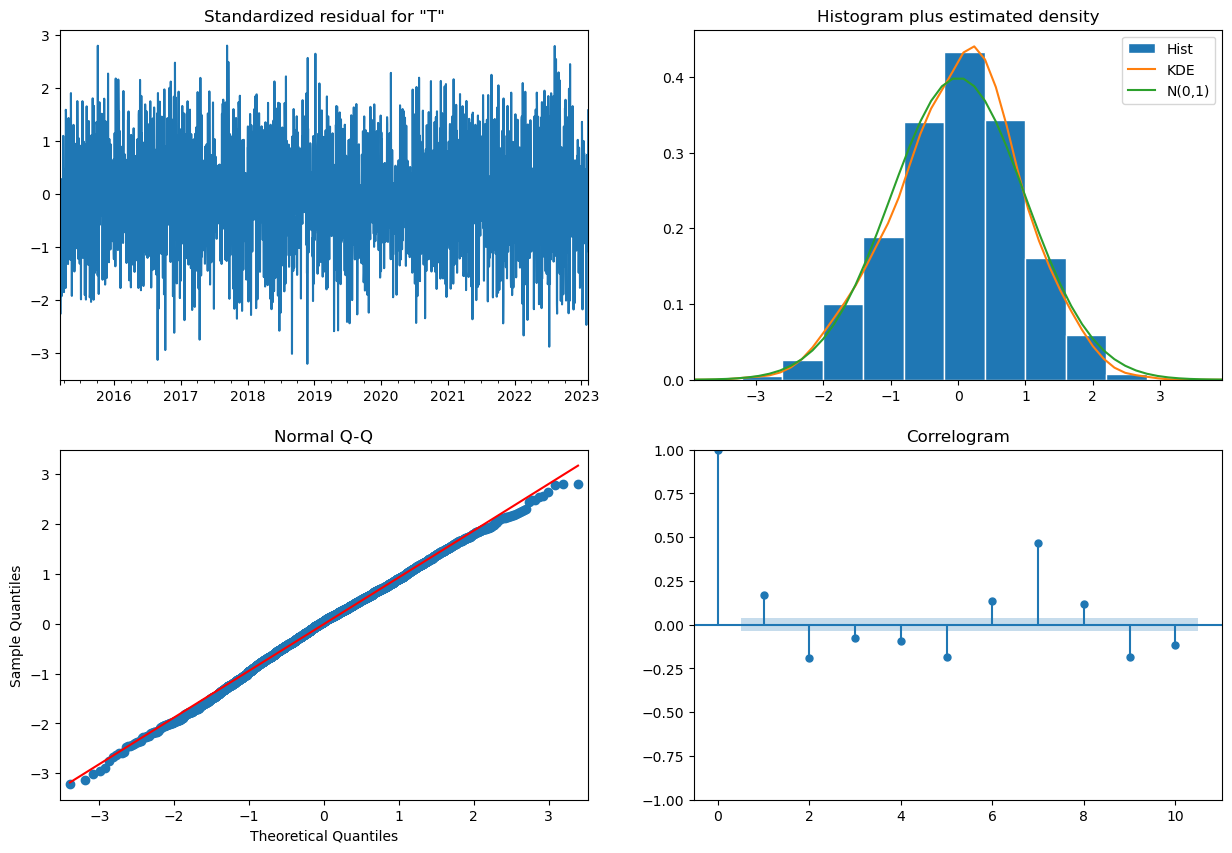

In [696]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

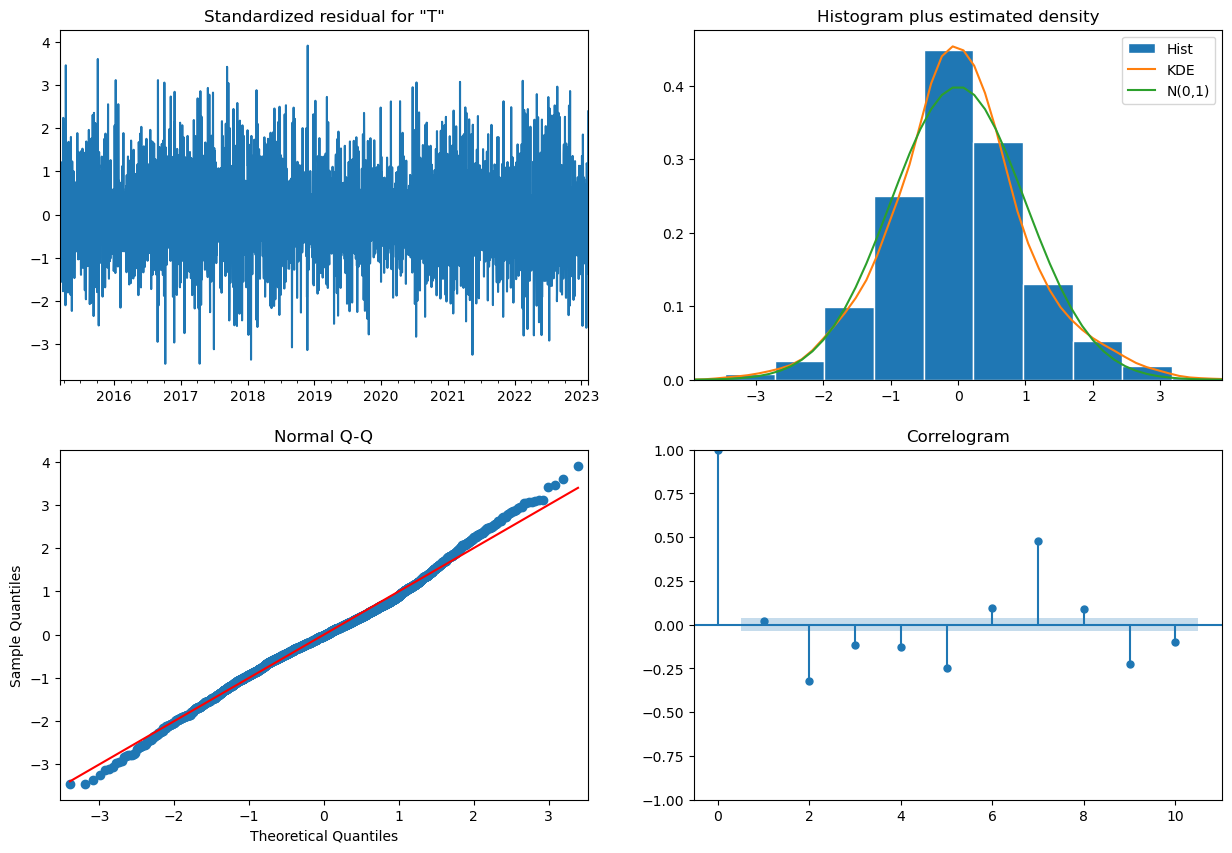

In [698]:
results_log.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
#######################

### Weekly - South Island

In [701]:
# df_hydro_weekly_tmp
# df_south_island_weekly_tmp
# df_north_island_weekly_tmp -- done

In [705]:
# Find rows with zero Total_TP in South Island
zero_tp_south = df_south_island_weekly_tmp[df_south_island_weekly_tmp['Total_TP'] == 0]

# Get the unique dates
zero_dates = zero_tp_south.index.unique()

# Display the result
print("Dates with Total_TP = 0 in South Island:")
for date in zero_dates:
    print(date.strftime('%Y-%m-%d'))

Dates with Total_TP = 0 in South Island:


In [707]:
df_south_island_weekly_tmp.head(5)

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M  \
DATE                                                                            
2015-03-22  2.950068e+08       264.80  165.01  80.292381  0.474921   8.037778   
2015-03-29  2.870318e+08       367.40  154.86  83.572698  0.482063  11.639524   
2015-04-05  2.590456e+08       189.24  177.98  79.877222  0.490952  11.092937   
2015-04-12  2.441813e+08       470.76  166.54  83.569683  0.502540   9.989206   
2015-04-19  2.735290e+08       333.51  129.33  85.104524  0.521032   4.725635   

            PRECIP_lag1w  PRECIP_lag2w  API_weekly  
DATE                                                
2015-03-22        156.42        767.35  488.289700  
2015-03-29        264.80        156.42  452.022790  
2015-04-05        367.40        264.80  373.187953  
2015-04-12        189.24        367.40  402.459567  
2015-04-19        470.76        189.24  381.774697

In [709]:
# Split the weekly data into 80% training and 20% testing sets
n = len(df_south_island_weekly_tmp)
train_size = int(n * 0.8)
train_weekly = df_south_island_weekly_tmp.iloc[:train_size]
test_weekly = df_south_island_weekly_tmp.iloc[train_size:]

In [711]:
print("Weekly Train set:", train_weekly.index.min(), "to", train_weekly.index.max() , " Records count : ",len(train_weekly) )
print("Weekly Test set:", test_weekly.index.min(), "to", test_weekly.index.max(), " Records count : ",len(test_weekly) )

Weekly Train set: 2015-03-22 00:00:00 to 2023-02-05 00:00:00  Records count :  412
Weekly Test set: 2023-02-12 00:00:00 to 2025-01-26 00:00:00  Records count :  103


In [713]:
# Define the target variable (original Total_TP) and exogenous variables
# target_train_log = train_weekly['Total_TP_log']
# target_test_log = test_weekly['Total_TP_log']

target_train = train_weekly['Total_TP']
target_test = test_weekly['Total_TP']


In [715]:
#['Total_TP', 'PRECTOTCORR', 'EVLAND', 'RH2M', 'GWETPROF', 'T2M', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']
exog_cols_wk = ['RH2M', 'GWETPROF', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']
#exog_cols = ['WS50M']

In [717]:
exog_train = train_weekly[exog_cols_wk]
exog_test = test_weekly[exog_cols_wk]

In [719]:
# Fit SARIMAX on the original (non-log) target data
model = SARIMAX(target_train,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               Total_TP   No. Observations:                  412
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7444.733
Date:                Fri, 18 Apr 2025   AIC                          14905.465
Time:                        10:24:29   BIC                          14937.575
Sample:                    03-22-2015   HQIC                         14918.170
                         - 02-05-2023                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
RH2M          6.199e+05   3.13e+05      1.978      0.048    5611.052    1.23e+06
GWETPROF      9.043e+07    888.260   1.02e+05      0.000    9.04e+07    9.04e+07
PRECIP_lag1w  1.417e+04   3684.342      3.84

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [721]:
# Forecast on the test set - non log
n_steps = len(test_weekly)
forecast = results.get_forecast(steps=n_steps, exog=exog_test).predicted_mean

In [723]:
# Compute performance metrics - non log
rmse = np.sqrt(mean_squared_error(target_test, forecast))
mae = mean_absolute_error(target_test, forecast)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test - forecast) / (target_test + epsilon))) * 100

print("\nForecast Performance Metrics (Without Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (Without Log Transformation):
RMSE: 41522307.07
MAE: 33634842.31
Adjusted MAPE: 10.25%


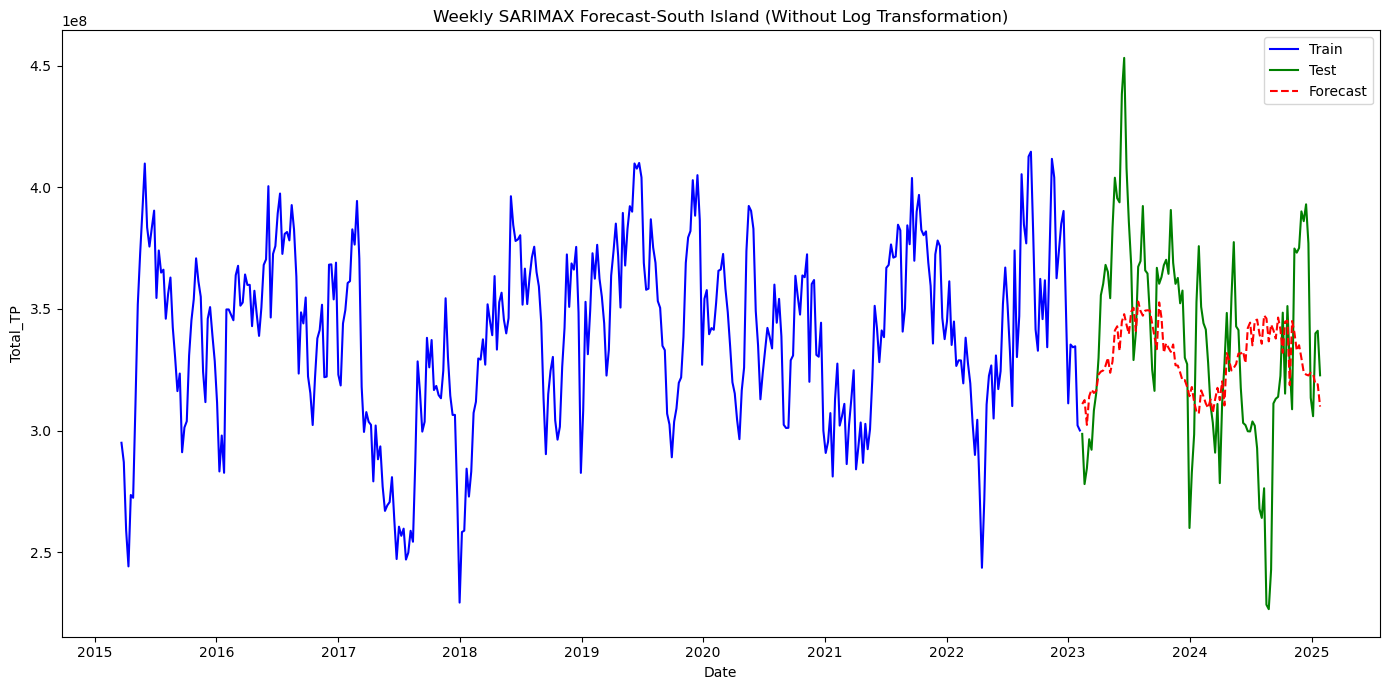

In [725]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_weekly.index, target_train, label='Train', color='blue')
plt.plot(test_weekly.index, target_test, label='Test', color='green')
plt.plot(test_weekly.index, forecast, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Weekly SARIMAX Forecast-South Island (Without Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

In [727]:
# # Create a log-transformed target. Adding 1 to avoid log(0) if needed.
df_south_island_weekly_tmp['Total_TP_log'] = np.log(df_south_island_weekly_tmp['Total_TP'] + 1)

In [729]:
# Split the weekly data into 80% training and 20% testing sets
# n = len(df_island_north_weekly)
# train_size = int(n * 0.8)
# train_weekly = df_island_north.iloc[:train_size]
# test_weekly = df_island_north.iloc[train_size:]

# Split the weekly data into 80% training and 20% testing sets
n = len(df_south_island_weekly_tmp)
train_size = int(n * 0.8)
train_weekly = df_south_island_weekly_tmp.iloc[:train_size]
test_weekly = df_south_island_weekly_tmp.iloc[train_size:]

In [731]:
print("Weekly Train set:", train_weekly.index.min(), "to", train_weekly.index.max() , " Records count : ",len(train_weekly) )
print("Weekly Test set:", test_weekly.index.min(), "to", test_weekly.index.max(), " Records count : ",len(test_weekly) )

Weekly Train set: 2015-03-22 00:00:00 to 2023-02-05 00:00:00  Records count :  412
Weekly Test set: 2023-02-12 00:00:00 to 2025-01-26 00:00:00  Records count :  103


In [733]:
# Define the target variable (original Total_TP) and exogenous variables
target_train_log = train_weekly['Total_TP_log']
target_test_log = test_weekly['Total_TP_log']

# target_train = train_weekly['Total_TP']
# target_test = test_weekly['Total_TP']


In [ ]:

# exog_cols = ['WS50M','PS']
#exog_cols = ['WS50M']


In [735]:
exog_train = train_weekly[exog_cols_wk]
exog_test = test_weekly[exog_cols_wk]

In [737]:
# Fit SARIMAX on the original (log) target data
model_log = SARIMAX(target_train_log,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results_log = model_log.fit(disp=False)
print(results_log.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Total_TP_log   No. Observations:                  412
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 584.340
Date:                Fri, 18 Apr 2025   AIC                          -1152.679
Time:                        10:25:45   BIC                          -1120.569
Sample:                    03-22-2015   HQIC                         -1139.975
                         - 02-05-2023                                         
Covariance Type:                  opg                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
RH2M             0.0018      0.001      1.780      0.075      -0.000       0.004
GWETPROF         0.2834      0.150      1.885      0.059      -0.011       0.578
PRECIP_lag1w  4.152e-05   1.24e-05      3.35

In [739]:
# Forecast on the test set
n_steps_log = len(test_weekly)
forecast_log = results_log.get_forecast(steps=n_steps_log, exog=exog_test).predicted_mean

In [741]:
# Compute performance metrics
rmse = np.sqrt(mean_squared_error(target_test_log, forecast_log))
mae = mean_absolute_error(target_test_log, forecast_log)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test_log - forecast_log) / (target_test_log + epsilon))) * 100

print("\nForecast Performance Metrics (With Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (With Log Transformation):
RMSE: 0.13
MAE: 0.10
Adjusted MAPE: 0.49%


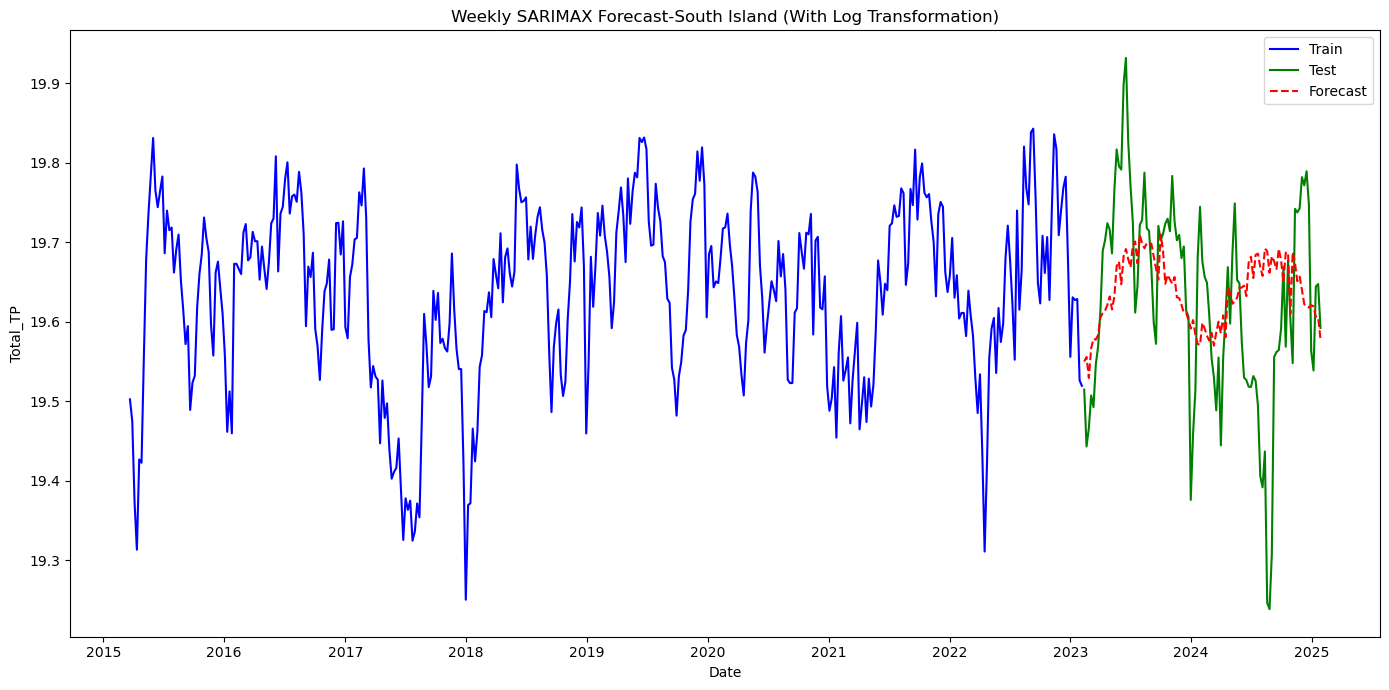

In [744]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_weekly.index, target_train_log, label='Train', color='blue')
plt.plot(test_weekly.index, target_test_log, label='Test', color='green')
plt.plot(test_weekly.index, forecast_log, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Weekly SARIMAX Forecast-South Island (With Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

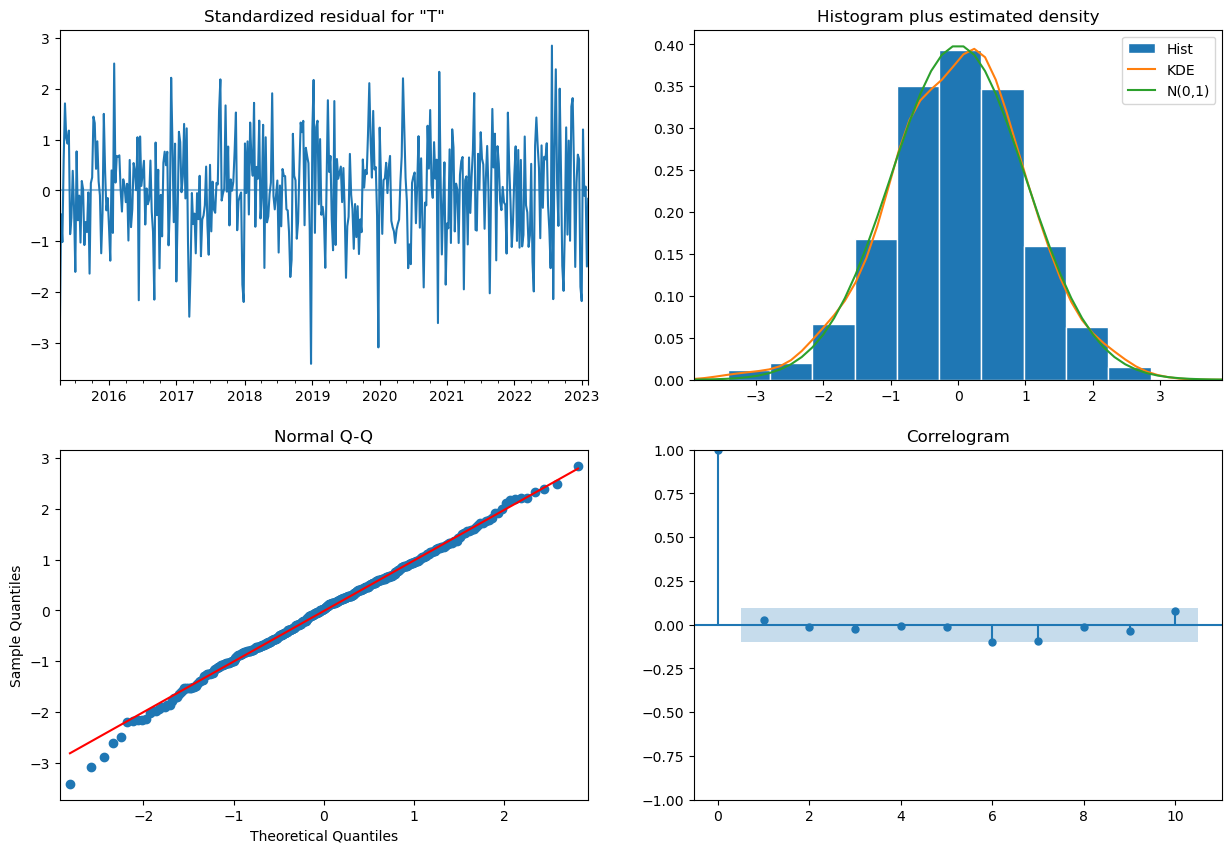

In [746]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

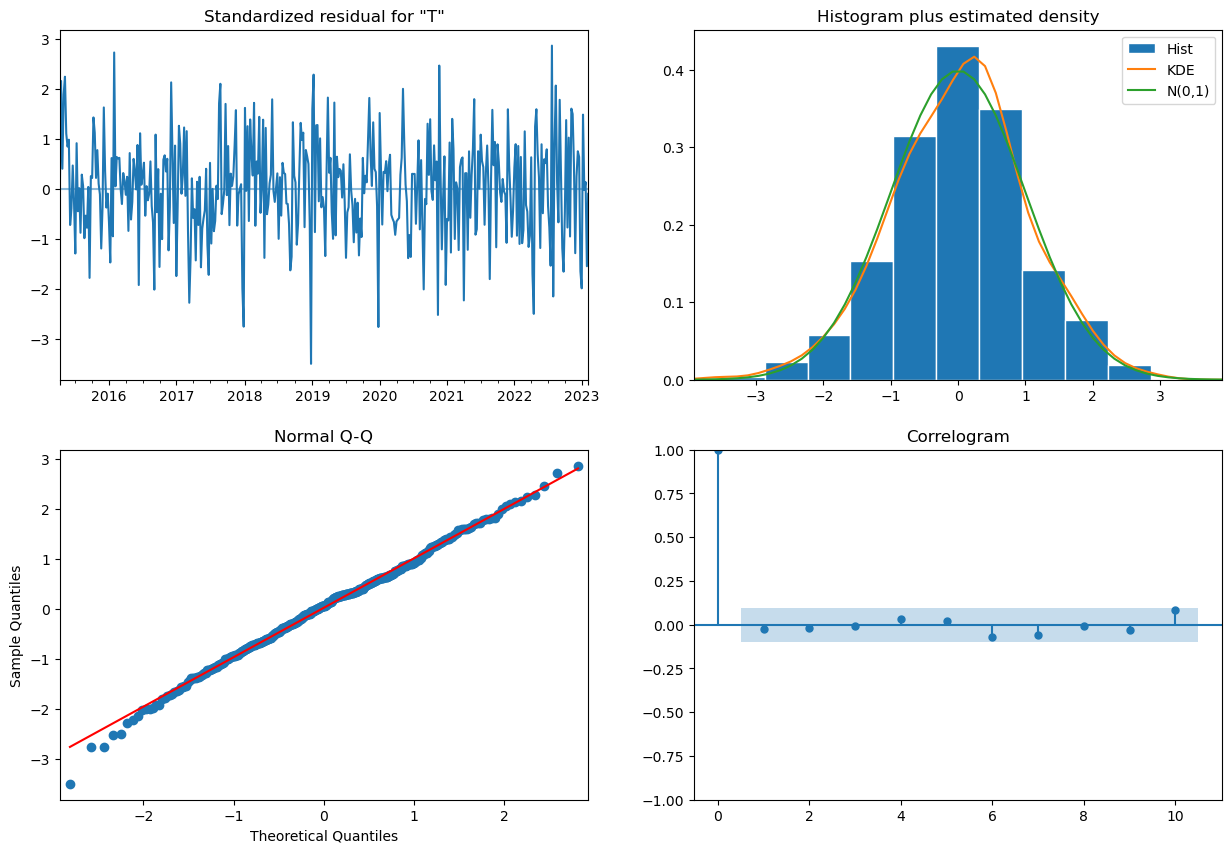

In [748]:
results_log.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
#################################################################

## Total - New Zealand 

### Daily analysis

In [752]:
# # # ---------Weekly------------------ 
# df_hydro_weekly_tmp
# df_south_island_weekly_tmp
# df_north_island_weekly_tmp

# # ---------Daily-------------------

# df_hydro_daily_tmp
# df_south_daily_tmp
# df_north_daily_tmp

In [754]:
print(df_hydro_daily_tmp.head())

                Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M  \
DATE                                                                            
2015-03-08  4.983312e+07        29.84   75.87  74.559150  0.410654  13.733595   
2015-03-09  5.917801e+07         6.86   55.59  73.314984  0.408971  14.516062   
2015-03-10  5.951784e+07        31.58   57.04  71.949330  0.406748  15.891160   
2015-03-11  5.934205e+07        63.90   52.15  79.830033  0.406127  15.019967   
2015-03-12  6.098345e+07       196.91   72.07  83.761585  0.409134  15.030425   

            PRECIP_7d  PRECIP_14d  PRECIP_lag1  PRECIP_lag7  
DATE                                                         
2015-03-08     971.38     1024.12       309.16        52.74  
2015-03-09     805.22     1030.98        29.84       173.02  
2015-03-10     783.87     1062.56         6.86        52.93  
2015-03-11     813.84     1126.46        31.58        33.93  
2015-03-12     996.71     1323.37        63.90        14.04 

In [756]:
# Find rows with zero Total_TP in South Island
zero_df_wind_nz = df_hydro_daily_tmp[df_hydro_daily_tmp['Total_TP'] == 0]

# Get the unique dates
zero_dates = zero_df_wind_nz.index.unique()

# Display the result
print("Dates with Total_TP = 0 in New Zealand:")
for date in zero_dates:
    print(date.strftime('%Y-%m-%d'))

Dates with Total_TP = 0 in New Zealand:


In [ ]:
# # Check for missing values before handling
# nan_count = df_WWD1102_weekly['Total_TP'].isna().sum()
# print("Number of NaN values before cleaning:", nan_count)

# # Apply time-based interpolation
# df_WWD1102_weekly['Total_TP'] = df_WWD1102_weekly['Total_TP'].interpolate(method='time')

# # Verify that there are no more missing values
# nan_count_after = df_WWD1102_weekly['Total_TP'].isna().sum()
# print("Number of NaN values after interpolation:", nan_count_after)

# # Optionally, inspect the imputed records
# imputed_records = df_WWD1102_weekly[df_WWD1102_weekly['Total_TP'].isna()]
# print("Imputed Records (should be empty):")
# print(imputed_records)


In [ ]:
# # Apply time interpolation to the target variable and exogenous variables
# cols_to_interpolate = ['PS','T2M','WD50M','WD50M_rad','u','v','WS50M']
# df_WWD1102_weekly[cols_to_interpolate] = df_WWD1102_weekly[cols_to_interpolate].interpolate(method='time')

# # Verify that missing values have been filled
# print("Missing values after time interpolation:")
# print(df_WWD1102_weekly[cols_to_interpolate].isna().sum())

In [ ]:
# # stationery check for weekly data
# from statsmodels.tsa.stattools import adfuller

# # Assume df_model_for_forecasting has a datetime index and a 'Total_TP' column.
# result = adfuller(df_WWD1102_weekly['Total_TP'])
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))

In [758]:
# Split the daily data into 80% training and 20% testing sets
n = len(df_hydro_daily_tmp)
train_size = int(n * 0.8)
train_daily = df_hydro_daily_tmp.iloc[:train_size]
test_daily = df_hydro_daily_tmp.iloc[train_size:]

In [760]:
print("Daily Train set:", train_daily.index.min(), "to", train_daily.index.max() , "Records Count : " , len(train_daily))
print("Daily Test set:", test_daily.index.min(), "to", test_daily.index.max(), "Records Count : " , len(test_daily))

Daily Train set: 2015-03-08 00:00:00 to 2023-02-07 00:00:00 Records Count :  2894
Daily Test set: 2023-02-08 00:00:00 to 2025-01-31 00:00:00 Records Count :  724


In [762]:
# Define the target variable (original Total_TP) and exogenous variables
# target_train_log = train_weekly['Total_TP_log']
# target_test_log = test_weekly['Total_TP_log']

target_train = train_daily['Total_TP']
target_test = test_daily['Total_TP']



In [796]:
exog_cols = ['RH2M', 'GWETPROF', 'PRECIP_14d' ]

In [798]:
exog_train = train_daily[exog_cols]
exog_test = test_daily[exog_cols]

In [800]:
# Fit SARIMAX on the original (non-log) target data
model = SARIMAX(target_train,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)
print(results.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Total_TP   No. Observations:                 2894
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -48678.292
Date:                Fri, 18 Apr 2025   AIC                          97368.585
Time:                        10:49:38   BIC                          97404.401
Sample:                    03-08-2015   HQIC                         97381.492
                         - 02-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RH2M       -8.976e+04   2.81e+04     -3.194      0.001   -1.45e+05   -3.47e+04
GWETPROF    3.211e+07      5.445    5.9e+06      0.000    3.21e+07    3.21e+07
PRECIP_14d  -338.2110    389.210     -0.869      0.3

In [801]:
# Forecast on the test set - non log
n_steps = len(test_daily)
forecast_daily = results.get_forecast(steps=n_steps, exog=exog_test).predicted_mean

In [804]:
# Compute performance metrics - non log
rmse = np.sqrt(mean_squared_error(target_test, forecast_daily))
mae = mean_absolute_error(target_test, forecast_daily)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test - forecast) / (target_test + epsilon))) * 100

print("\nForecast Performance Metrics (Without Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (Without Log Transformation):
RMSE: 9887841.70
MAE: 7789566.31
Adjusted MAPE: 469.98%


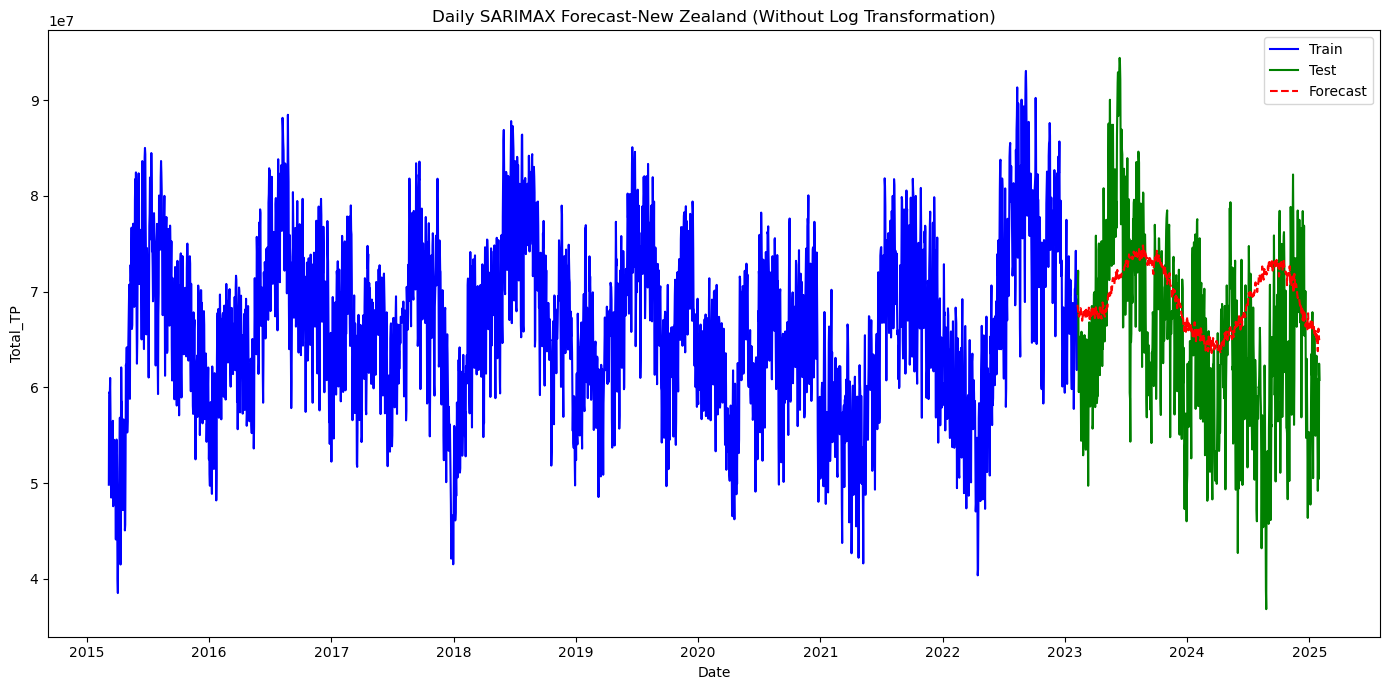

In [806]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_daily.index, target_train, label='Train', color='blue')
plt.plot(test_daily.index, target_test, label='Test', color='green')
plt.plot(test_daily.index, forecast_daily, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Daily SARIMAX Forecast-New Zealand (Without Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

In [810]:
# # Create a log-transformed target. Adding 1 to avoid log(0) if needed.
df_hydro_daily_tmp['Total_TP_log'] = np.log(df_hydro_daily_tmp['Total_TP'] + 1)

In [812]:
# Split the weekly data into 80% training and 20% testing sets
n = len(df_hydro_daily_tmp)
train_size = int(n * 0.8)
train_daily = df_hydro_daily_tmp.iloc[:train_size]
test_daily = df_hydro_daily_tmp.iloc[train_size:]

In [814]:
print("Daily Train set:", train_daily.index.min(), "to", train_daily.index.max())
print("Daily Test set:", test_daily.index.min(), "to", test_daily.index.max())

Daily Train set: 2015-03-08 00:00:00 to 2023-02-07 00:00:00
Daily Test set: 2023-02-08 00:00:00 to 2025-01-31 00:00:00


In [816]:
# Define the target variable (original Total_TP) and exogenous variables
target_train_log = train_daily['Total_TP_log']
target_test_log = test_daily['Total_TP_log']

# target_train = train_weekly['Total_TP']
# target_test = test_weekly['Total_TP']

#exog_cols = ['WS50M','PS']
#exog_cols = ['WS50M']
exog_train = train_daily[exog_cols]
exog_test = test_daily[exog_cols]

In [818]:
# Fit SARIMAX on the original (log) target data
model_log = SARIMAX(target_train_log,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results_log = model_log.fit(disp=False)
print(results_log.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Total_TP_log   No. Observations:                 2894
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3088.625
Date:                Fri, 18 Apr 2025   AIC                          -6165.249
Time:                        10:50:43   BIC                          -6129.433
Sample:                    03-08-2015   HQIC                         -6152.342
                         - 02-07-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RH2M          -0.0013      0.000     -3.469      0.001      -0.002      -0.001
GWETPROF       0.5389      0.376      1.433      0.152      -0.198       1.276
PRECIP_14d -5.913e-06   9.85e-06     -0.600      0.5

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [820]:
# Forecast on the test set
n_steps_log = len(test_daily)
forecast_log = results_log.get_forecast(steps=n_steps_log, exog=exog_test).predicted_mean

In [822]:
# Compute performance metrics
rmse = np.sqrt(mean_squared_error(target_test_log, forecast_log))
mae = mean_absolute_error(target_test_log, forecast_log)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test_log - forecast_log) / (target_test_log + epsilon))) * 100

print("\nForecast Performance Metrics (With Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (With Log Transformation):
RMSE: 0.17
MAE: 0.13
Adjusted MAPE: 0.73%


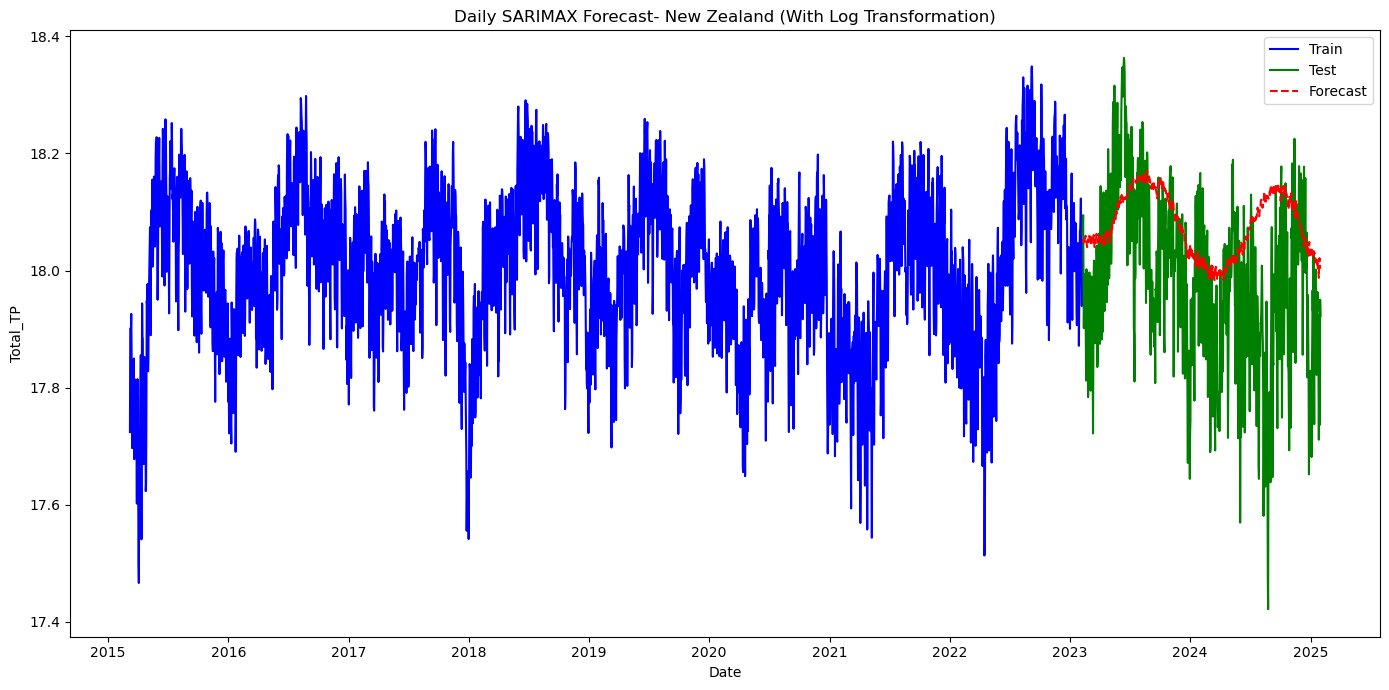

In [824]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_daily.index, target_train_log, label='Train', color='blue')
plt.plot(test_daily.index, target_test_log, label='Test', color='green')
plt.plot(test_daily.index, forecast_log, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Daily SARIMAX Forecast- New Zealand (With Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

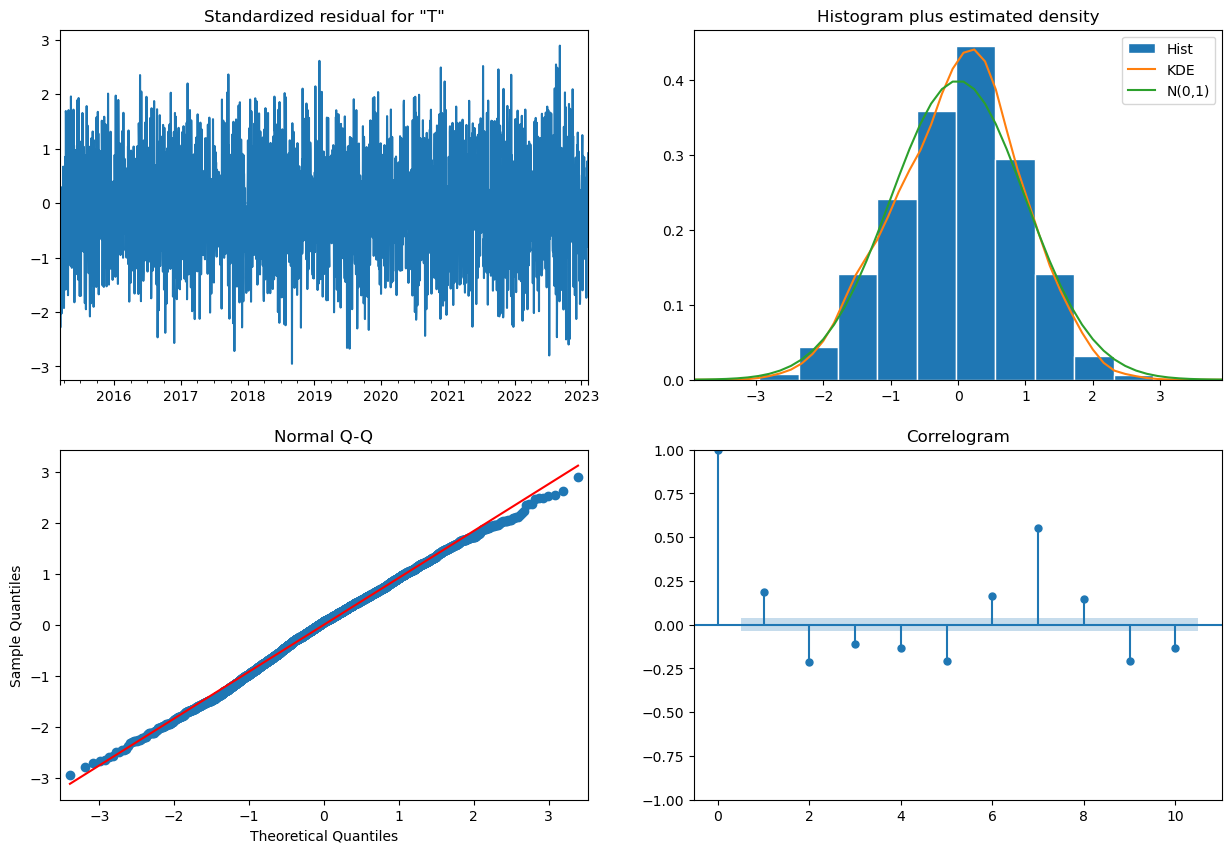

In [826]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

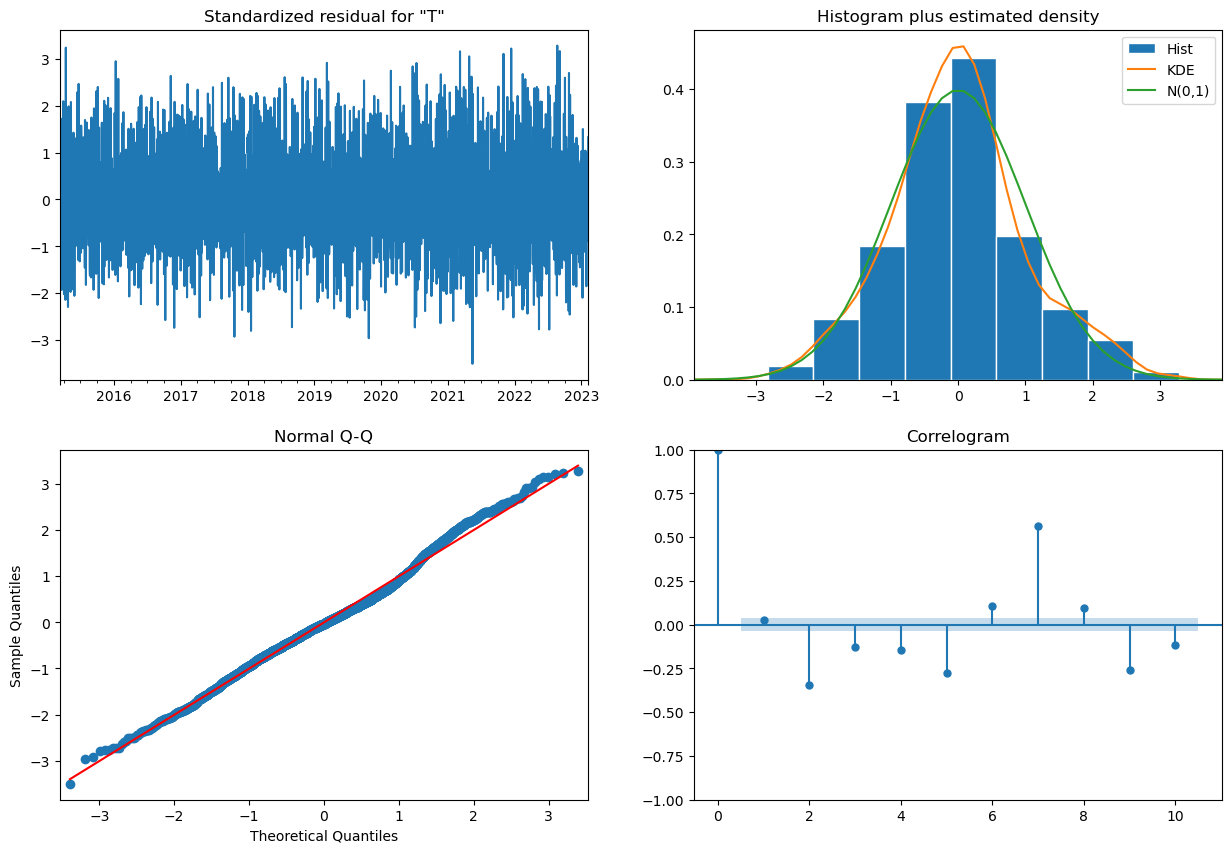

In [828]:
results_log.plot_diagnostics(figsize=(15, 10))
plt.show()

### Weekly analysis for New Zealand

In [832]:
df_hydro_weekly_tmp.head(5)

Total_TP  PRECTOTCORR  EVLAND       RH2M  GWETPROF        T2M  \
DATE                                                                            
2015-03-22  3.662094e+08       663.87  403.97  75.378081  0.421662  10.907292   
2015-03-29  3.579528e+08       693.64  370.90  82.111349  0.421032  13.933543   
2015-04-05  3.299789e+08       233.77  352.36  78.754241  0.426779  13.300586   
2015-04-12  3.418926e+08      1188.17  352.14  84.487572  0.438959  13.012923   
2015-04-19  3.846722e+08       980.16  313.50  82.797304  0.467070   7.460507   

            PRECIP_lag1w  PRECIP_lag2w  API_weekly  
DATE                                                
2015-03-22        529.00        971.38  786.227200  
2015-03-29        663.87        529.00  758.451040  
2015-04-05        693.64        663.87  601.046728  
2015-04-12        233.77        693.64  777.183710  
2015-04-19       1188.17        233.77  838.076597

In [ ]:
# df_island_daily_upd_new_v1['PRECTOTCORR_lag1'] = df_island_daily_upd_new_v1['PRECTOTCORR'].shift(1)  # 1-week lag

In [ ]:
# df_island_daily_cln = df_island_daily_upd_new_v1.dropna()

In [834]:
# Find rows with zero Total_TP in New Zealand
zero_tp_nz = df_hydro_weekly_tmp[df_hydro_weekly_tmp['Total_TP'] == 0]

# Get the unique dates
zero_dates = zero_tp_nz.index.unique()

# Display the result
print("Dates with Total_TP = 0 in New Zealand :")
for date in zero_dates:
    print(date.strftime('%Y-%m-%d'))

Dates with Total_TP = 0 in New Zealand :


In [960]:
# Split the weekly data into 80% training and 20% testing sets
n = len(df_hydro_weekly_tmp)
train_size = int(n * 0.8)
train_weekly = df_hydro_weekly_tmp.iloc[:train_size]
test_weekly = df_hydro_weekly_tmp.iloc[train_size:]

In [962]:
print("Weekly Train set:", train_weekly.index.min(), "to", train_weekly.index.max())
print("Weekly Test set:", test_weekly.index.min(), "to", test_weekly.index.max())

Weekly Train set: 2015-03-22 00:00:00 to 2023-02-05 00:00:00
Weekly Test set: 2023-02-12 00:00:00 to 2025-01-26 00:00:00


In [964]:
# Define the target variable (original Total_TP) and exogenous variables
# target_train_log = train_weekly['Total_TP_log']
# target_test_log = test_weekly['Total_TP_log']

target_train = train_weekly['Total_TP']
target_test = test_weekly['Total_TP']



In [1025]:
#['Total_TP', 'PRECTOTCORR', 'EVLAND', 'RH2M', 'GWETPROF', 'T2M', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']
# exog_cols_wk = ['RH2M', 'GWETPROF', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']
exog_cols_wk = ['GWETPROF', 'API_weekly']

In [1027]:
#exog_cols = ['RH2M','GWETPROF','PRECTOTCORR_lag1']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M','PRECTOTCORR_lag1']
#exog_cols = ['T2M','PRECTOTCORR_lag7','GWETPROF']
#exog_cols = ['EVLAND','T2M']
#exog_cols = ['GWETPROF','EVLAND','T2M']
#exog_cols = ['PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['RH2M','PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['WS50M']
#exog_cols = ['WS50M','PS']
#exog_cols = ['WS50M']
# exog_train = train_weekly[exog_cols]
# exog_test = test_weekly[exog_cols]

# exog_cols = ['WS50M','PS']
#exog_cols = ['WS50M']
exog_train = train_weekly[exog_cols_wk]
exog_test = test_weekly[exog_cols_wk]

In [1029]:
# Fit SARIMAX on the original (non-log) target data
model = SARIMAX(target_train,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)
print(results.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Total_TP   No. Observations:                  412
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7528.204
Date:                Fri, 18 Apr 2025   AIC                          15066.407
Time:                        12:09:38   BIC                          15086.476
Sample:                    03-22-2015   HQIC                         15074.348
                         - 02-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GWETPROF    3.367e+08      0.287   1.17e+09      0.000    3.37e+08    3.37e+08
API_weekly -2.788e+04   9164.009     -3.042      0.002   -4.58e+04   -9917.378
ar.L1          0.6230      0.041     15.198      0.0

In [1031]:
# Forecast on the test set - non log
n_steps = len(test_weekly)
forecast = results.get_forecast(steps=n_steps, exog=exog_test).predicted_mean

In [1033]:
# Compute performance metrics - non log
rmse = np.sqrt(mean_squared_error(target_test, forecast))
mae = mean_absolute_error(target_test, forecast)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test - forecast) / (target_test + epsilon))) * 100

print("\nForecast Performance Metrics (Without Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (Without Log Transformation):
RMSE: 70838432.15
MAE: 57260251.89
Adjusted MAPE: 13.34%


In [1035]:
print("Minimum of actual values in test set:", target_test.min())
print("Number of zeros in actual test set:", np.sum(target_test == 0))

Minimum of actual values in test set: 345563712.0
Number of zeros in actual test set: 0


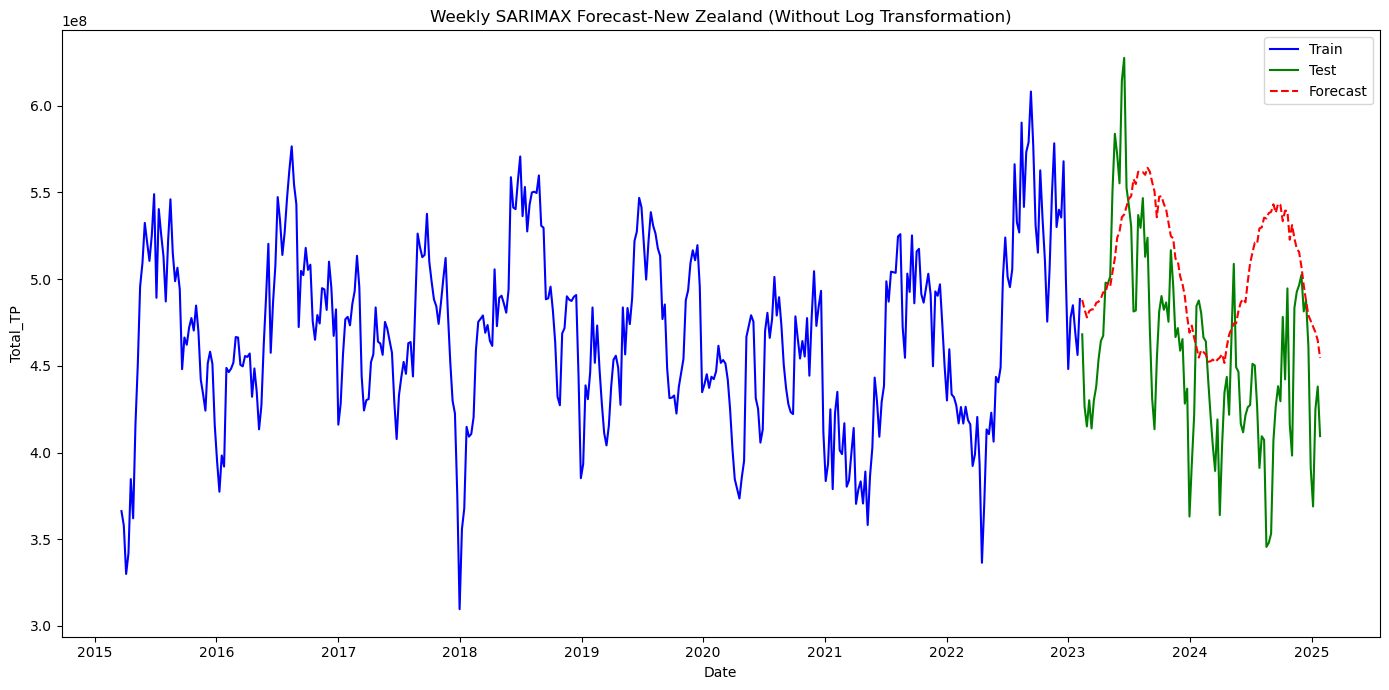

In [1037]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_weekly.index, target_train, label='Train', color='blue')
plt.plot(test_weekly.index, target_test, label='Test', color='green')
plt.plot(test_weekly.index, forecast, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Weekly SARIMAX Forecast-New Zealand (Without Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

In [908]:
# # Create a log-transformed target. Adding 1 to avoid log(0) if needed.
df_hydro_weekly_tmp['Total_TP_log'] = np.log(df_hydro_weekly_tmp['Total_TP'] + 1)

In [910]:
# Split the weekly data into 80% training and 20% testing sets
n = len(df_hydro_weekly_tmp)
train_size = int(n * 0.8)
train_weekly_log = df_hydro_weekly_tmp.iloc[:train_size]
test_weekly_log = df_hydro_weekly_tmp.iloc[train_size:]

In [912]:
print("Weekly Train set:", train_weekly_log.index.min(), "to", train_weekly_log.index.max())
print("Weekly Test set:", test_weekly_log.index.min(), "to", test_weekly_log.index.max())

Weekly Train set: 2015-03-22 00:00:00 to 2023-02-05 00:00:00
Weekly Test set: 2023-02-12 00:00:00 to 2025-01-26 00:00:00


In [914]:
# Define the target variable (original Total_TP) and exogenous variables
target_train_log = train_weekly_log['Total_TP_log']
target_test_log = test_weekly_log['Total_TP_log']

# target_train = train_weekly['Total_TP']
# target_test = test_weekly['Total_TP']



In [1039]:
#['Total_TP', 'PRECTOTCORR', 'EVLAND', 'RH2M', 'GWETPROF', 'T2M', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']
# exog_cols_wk = ['RH2M', 'GWETPROF', 'PRECIP_lag1w', 'PRECIP_lag2w', 'API_weekly']
exog_cols_wk = ['GWETPROF', 'API_weekly']

In [1041]:
# exog_cols = ['RH2M','GWETPROF','PRECTOTCORR_lag1']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M']
#exog_cols = ['RH2M', 'GWETPROF', 'EVLAND', 'T2M','PRECTOTCORR_lag1']
#exog_cols = ['T2M','PRECTOTCORR_lag7','GWETPROF']
#exog_cols = ['EVLAND','T2M']
#exog_cols = ['GWETPROF','EVLAND','T2M']
#exog_cols = ['PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['RH2M','PRECTOTCORR','GWETPROF','EVLAND','T2M']
#exog_cols = ['WS50M']
#exog_cols = ['WS50M','PS']
#exog_cols = ['WS50M']
# exog_train = train_weekly[exog_cols]
# exog_test = test_weekly[exog_cols]

# exog_cols = ['WS50M','PS']
#exog_cols = ['WS50M']
exog_train = train_weekly[exog_cols_wk]
exog_test = test_weekly[exog_cols_wk]

In [1043]:
# Fit SARIMAX on the original (log) target data
model_log = SARIMAX(target_train_log,
                exog=exog_train,
                order=(1, 1, 1),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results_log = model_log.fit(disp=False)
print(results_log.summary())

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Total_TP_log   No. Observations:                  412
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 627.134
Date:                Fri, 18 Apr 2025   AIC                          -1244.267
Time:                        12:10:11   BIC                          -1224.199
Sample:                    03-22-2015   HQIC                         -1236.327
                         - 02-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GWETPROF       0.7288      0.126      5.768      0.000       0.481       0.976
API_weekly  -5.75e-05   2.03e-05     -2.832      0.005   -9.73e-05   -1.77e-05
ar.L1          0.8457      0.076     11.090      0.0

C:\Users\nwn86\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1045]:
# Forecast on the test set
n_steps_log = len(test_weekly_log)
forecast_log = results_log.get_forecast(steps=n_steps_log, exog=exog_test).predicted_mean

In [1047]:
# Compute performance metrics
rmse = np.sqrt(mean_squared_error(target_test_log, forecast_log))
mae = mean_absolute_error(target_test_log, forecast_log)
epsilon = 1e-10  # small constant to avoid division by zero in MAPE
mape = np.mean(np.abs((target_test_log - forecast_log) / (target_test_log + epsilon))) * 100

print("\nForecast Performance Metrics (With Log Transformation):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted MAPE: {mape:.2f}%")


Forecast Performance Metrics (With Log Transformation):
RMSE: 0.15
MAE: 0.12
Adjusted MAPE: 0.58%


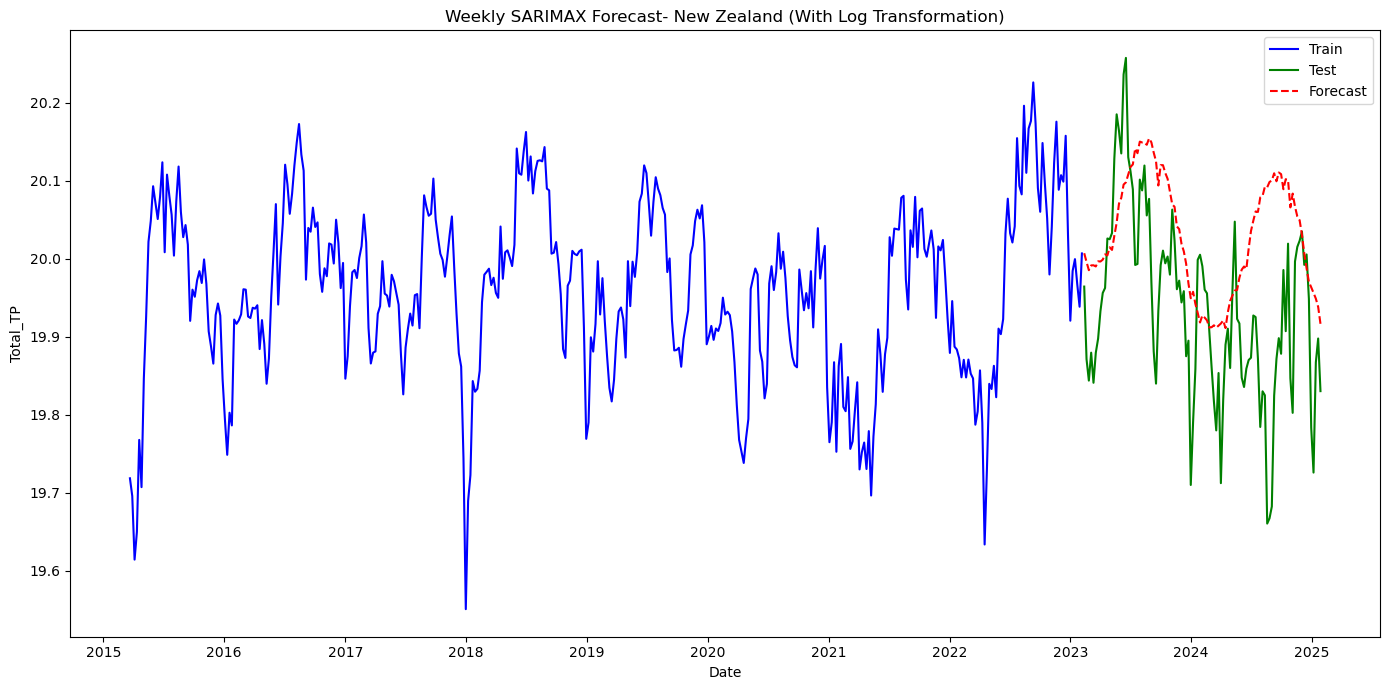

In [1050]:
# Plot Actual vs. Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_weekly.index, target_train_log, label='Train', color='blue')
plt.plot(test_weekly.index, target_test_log, label='Test', color='green')
plt.plot(test_weekly.index, forecast_log, label='Forecast', color='red', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Total_TP")
plt.title("Weekly SARIMAX Forecast- New Zealand (With Log Transformation)")
plt.legend()
plt.tight_layout()
plt.show()

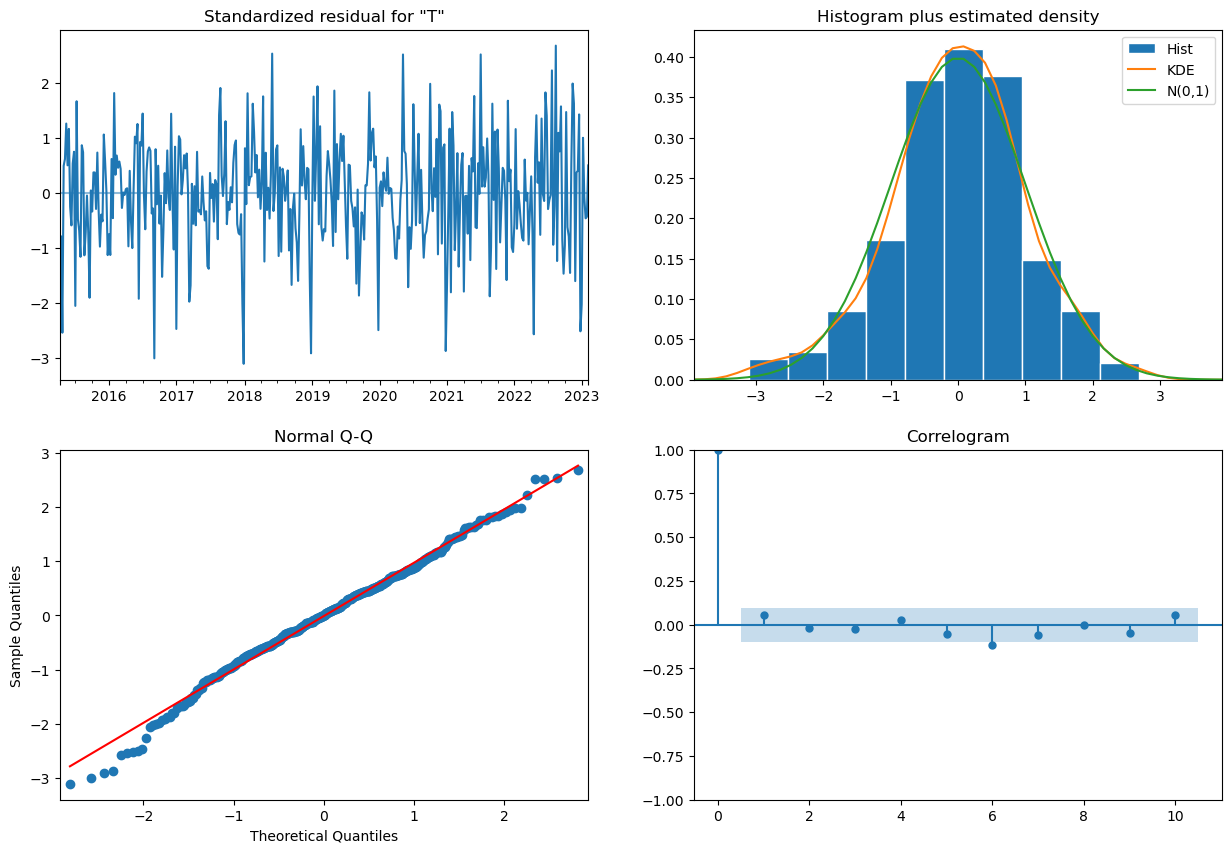

In [928]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

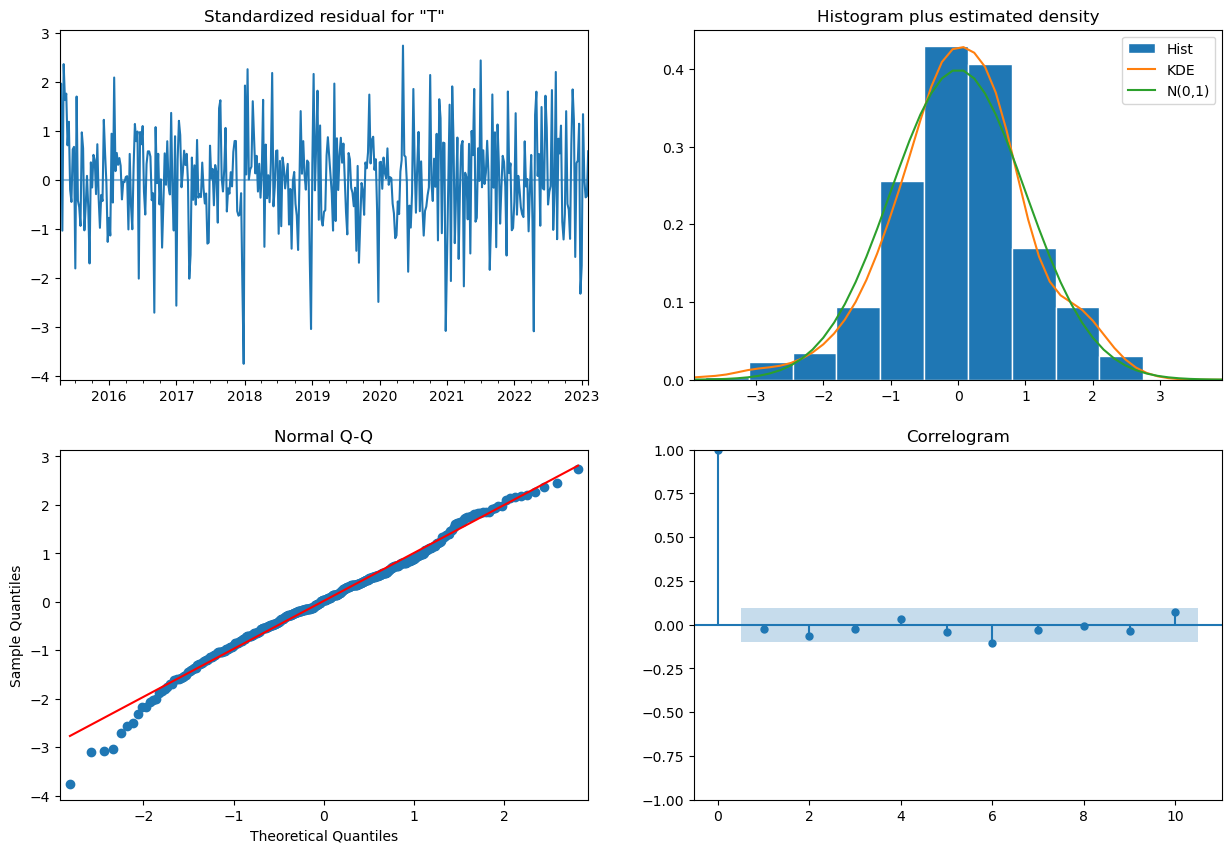

In [930]:
results_log.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
results.plot_diagnostics(figsize=(15, 10))
plt.show()

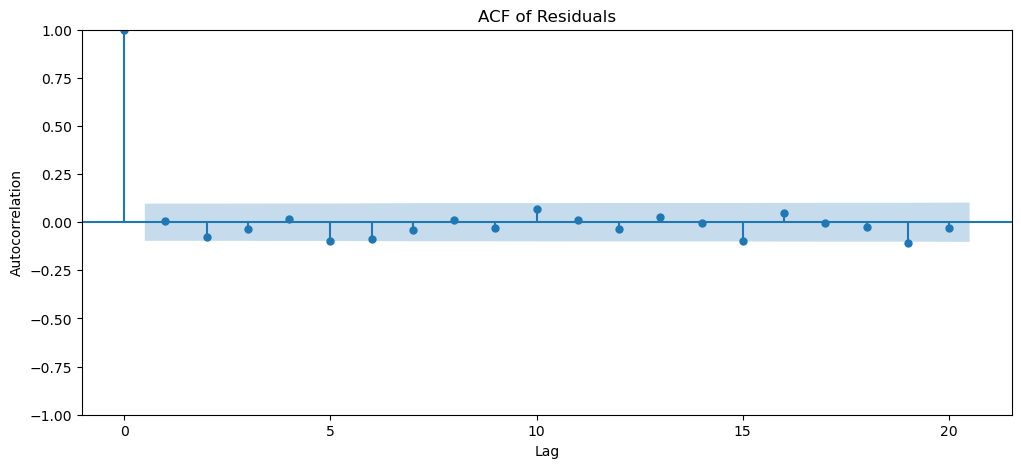

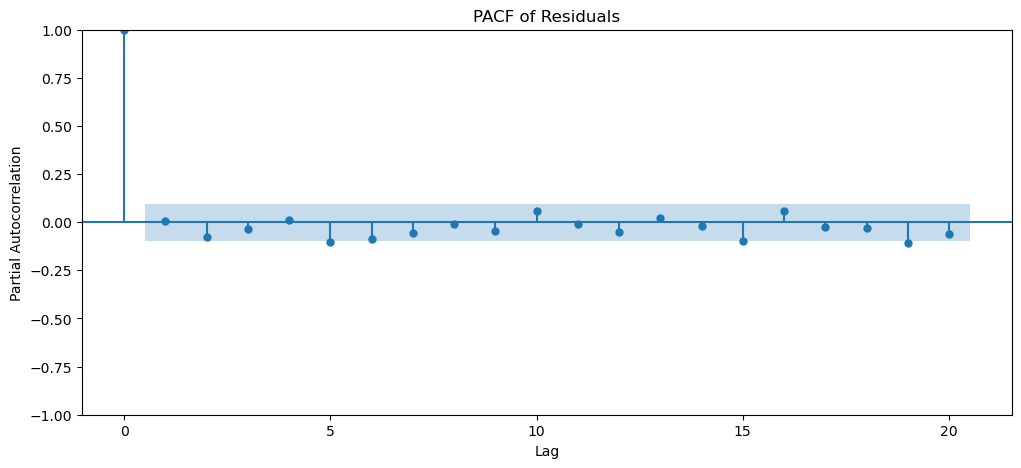

In [932]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'results' is your fitted SARIMAX model and results.resid contains the residuals.
residuals = results.resid

# Plot ACF for residuals
plt.figure(figsize=(12, 5))
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('ACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF for residuals
plt.figure(figsize=(12, 5))
plot_pacf(residuals, lags=20, ax=plt.gca(), method='ywm')
plt.title('PACF of Residuals')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [1056]:
# df_hydro_weekly.head()

In [ ]:
# # All Island Weekly
# # df_hydro_weekly['PRECIP_7d'] = df_hydro_weekly['PRECTOTCORR'].rolling(7, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
# # df_hydro_weekly['PRECIP_14d'] = df_hydro_weekly['PRECTOTCORR'].rolling(14, min_periods=1).sum() #Rolling sums - total rain over the last 7 days
# # df_hydro_weekly['PRECIP_lag1'] = df_hydro_weekly['PRECTOTCORR'].shift(1) # Lagged values yesterday’s rain
# # df_hydro_weekly['PRECIP_lag7'] = df_hydro_weekly['PRECTOTCORR'].shift(7) # Lagged values last week’s rain
# df_hydro_weekly['PRECIP_lag1w'] = df_hydro_weekly['PRECTOTCORR'].shift(1)
# df_hydro_weekly['PRECIP_lag2w'] = df_hydro_weekly['PRECTOTCORR'].shift(2)
# df_hydro_weekly['API_weekly'] = df_hydro_weekly['PRECTOTCORR'].ewm(alpha=0.3, adjust=False).mean()